In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import vtk 
from vtk.util import numpy_support as VN
import matplotlib.tri as tri

2023-10-15 12:33:44.188829: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-15 12:33:45.246520: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [1]:
path = ["CNN Data/M2/150_GUp_Z_0.031250", 
       "CNN Data/M2/151_GUp_Z_0.031250",
       "CNN Data/M2/152_GUp_Z_0.031250",
       "CNN Data/M2/153_GUp_Z_0.031250",
       "CNN Data/M2/154_GUp_Z_0.031250",
       "CNN Data/M2/155_GUp_Z_0.031250",
       "CNN Data/M2/156_GUp_Z_0.031250",
       "CNN Data/M2/157_GUp_Z_0.031250",
       "CNN Data/M2/158_GUp_Z_0.031250",
       "CNN Data/M2/159_GUp_Z_0.031250",
       "CNN Data/M2/160_GUp_Z_0.031250",
       "CNN Data/M2/150_GUp_Z_N-0.031250",
       "CNN Data/M2/151_GUp_Z_N-0.031250",
       "CNN Data/M2/152_GUp_Z_N-0.031250",
       "CNN Data/M2/153_GUp_Z_N-0.031250",
       "CNN Data/M2/154_GUp_Z_N-0.031250",
       "CNN Data/M2/155_GUp_Z_N-0.031250",
       "CNN Data/M2/156_GUp_Z_N-0.031250",
       "CNN Data/M2/157_GUp_Z_N-0.031250",
       "CNN Data/M2/158_GUp_Z_N-0.031250",
       "CNN Data/M2/159_GUp_Z_N-0.031250",
       "CNN Data/M2/160_GUp_Z_N-0.031250",
       "CNN Data/M2/161_GUp_Z_N-0.031250",
       "CNN Data/M2/162_GUp_Z_N-0.031250",
       "CNN Data/M2/163_GUp_Z_N-0.031250",
       "CNN Data/M2/164_GUp_Z_N-0.031250",
       "CNN Data/M2/165_GUp_Z_N-0.031250",
       "CNN Data/M2/166_GUp_Z_N-0.031250",
       "CNN Data/M2/167_GUp_Z_N-0.031250",
       "CNN Data/M2/168_GUp_Z_N-0.031250",
       "CNN Data/M2/169_GUp_Z_N-0.031250",
       "CNN Data/M2/170_GUp_Z_N-0.031250",
       "CNN Data/M2/150_GUp_Z_0.093750",
       "CNN Data/M2/151_GUp_Z_0.093750",
       "CNN Data/M2/152_GUp_Z_0.093750",
       "CNN Data/M2/153_GUp_Z_0.093750",
       "CNN Data/M2/154_GUp_Z_0.093750",
       "CNN Data/M2/155_GUp_Z_0.093750",
       "CNN Data/M2/156_GUp_Z_0.093750",
       "CNN Data/M2/157_GUp_Z_0.093750",
       "CNN Data/M2/158_GUp_Z_0.093750",
       "CNN Data/M2/159_GUp_Z_0.093750",
       "CNN Data/M2/160_GUp_Z_0.093750",
       "CNN Data/M2/161_GUp_Z_0.093750",
       "CNN Data/M2/162_GUp_Z_0.093750",
       "CNN Data/M2/163_GUp_Z_0.093750",
       "CNN Data/M2/164_GUp_Z_0.093750",
       "CNN Data/M2/165_GUp_Z_0.093750",
       "CNN Data/M2/166_GUp_Z_0.093750",
       "CNN Data/M2/167_GUp_Z_0.093750",
       "CNN Data/M2/168_GUp_Z_0.093750",
       "CNN Data/M2/169_GUp_Z_0.093750",
       "CNN Data/M2/170_GUp_Z_0.093750",
       "CNN Data/M2/150_GUp_Z_N-0.093750",
       "CNN Data/M2/151_GUp_Z_N-0.093750",
       "CNN Data/M2/152_GUp_Z_N-0.093750",
       "CNN Data/M2/153_GUp_Z_N-0.093750",
       "CNN Data/M2/154_GUp_Z_N-0.093750",
       "CNN Data/M2/155_GUp_Z_N-0.093750",
       "CNN Data/M2/156_GUp_Z_N-0.093750",
       "CNN Data/M2/157_GUp_Z_N-0.093750",
       "CNN Data/M2/158_GUp_Z_N-0.093750",
       "CNN Data/M2/159_GUp_Z_N-0.093750",
       "CNN Data/M2/160_GUp_Z_N-0.093750",
       "CNN Data/M2/161_GUp_Z_N-0.093750",
       "CNN Data/M2/162_GUp_Z_N-0.093750",
       "CNN Data/M2/163_GUp_Z_N-0.093750",
       "CNN Data/M2/164_GUp_Z_N-0.093750",
       "CNN Data/M2/165_GUp_Z_N-0.093750",
       "CNN Data/M2/166_GUp_Z_N-0.093750",
       "CNN Data/M2/167_GUp_Z_N-0.093750",
       "CNN Data/M2/168_GUp_Z_N-0.093750",
       "CNN Data/M2/169_GUp_Z_N-0.093750",
       "CNN Data/M2/170_GUp_Z_N-0.093750",
       "CNN Data/M2/150_GUp_Z_0.156250",
       "CNN Data/M2/151_GUp_Z_0.156250",
       "CNN Data/M2/152_GUp_Z_0.156250",
       "CNN Data/M2/153_GUp_Z_0.156250",
       "CNN Data/M2/154_GUp_Z_0.156250",
       "CNN Data/M2/155_GUp_Z_0.156250",
       "CNN Data/M2/156_GUp_Z_0.156250",
       "CNN Data/M2/157_GUp_Z_0.156250",
       "CNN Data/M2/158_GUp_Z_0.156250",
       "CNN Data/M2/159_GUp_Z_0.156250",
       "CNN Data/M2/160_GUp_Z_0.156250",
       "CNN Data/M2/161_GUp_Z_0.156250",
       "CNN Data/M2/162_GUp_Z_0.156250",
       "CNN Data/M2/163_GUp_Z_0.156250",
       "CNN Data/M2/164_GUp_Z_0.156250",
       "CNN Data/M2/165_GUp_Z_0.156250",
       "CNN Data/M2/166_GUp_Z_0.156250",
       "CNN Data/M2/167_GUp_Z_0.156250",
       "CNN Data/M2/168_GUp_Z_0.156250",
       "CNN Data/M2/169_GUp_Z_0.156250",
       "CNN Data/M2/170_GUp_Z_0.156250",
       "CNN Data/M2/150_GUp_Z_N-0.156250",
       "CNN Data/M2/151_GUp_Z_N-0.156250",
       "CNN Data/M2/152_GUp_Z_N-0.156250",
       "CNN Data/M2/153_GUp_Z_N-0.156250",
       "CNN Data/M2/154_GUp_Z_N-0.156250",
       "CNN Data/M2/155_GUp_Z_N-0.156250",
       "CNN Data/M2/156_GUp_Z_N-0.156250",
       "CNN Data/M2/157_GUp_Z_N-0.156250",
       "CNN Data/M2/158_GUp_Z_N-0.156250",
       "CNN Data/M2/159_GUp_Z_N-0.156250",
       "CNN Data/M2/160_GUp_Z_N-0.156250",
       "CNN Data/M2/161_GUp_Z_N-0.156250",
       "CNN Data/M2/162_GUp_Z_N-0.156250",
       "CNN Data/M2/163_GUp_Z_N-0.156250",
       "CNN Data/M2/164_GUp_Z_N-0.156250",
       "CNN Data/M2/165_GUp_Z_N-0.156250",
       "CNN Data/M2/166_GUp_Z_N-0.156250",
       "CNN Data/M2/167_GUp_Z_N-0.156250",
       "CNN Data/M2/168_GUp_Z_N-0.156250",
       "CNN Data/M2/169_GUp_Z_N-0.156250",
       "CNN Data/M2/170_GUp_Z_N-0.156250"]

nt = len(path)
nx = 256
ny = 128
nc = 13
nf = 12
nl = 1

In [4]:
nt

116

In [5]:
testPath = ['/home/hmarefat/scratch/torchFOAMCNN/Case_dS_HR_BBPF/postProcessing/GUp/150_GUp_Z_0.218750',
           '/home/hmarefat/scratch/torchFOAMCNN/Case_dS_HR_BBPF/postProcessing/GUp/151_GUp_Z_0.218750',
           '/home/hmarefat/scratch/torchFOAMCNN/Case_dS_HR_BBPF/postProcessing/GUp/152_GUp_Z_0.218750',
           '/home/hmarefat/scratch/torchFOAMCNN/Case_dS_HR_BBPF/postProcessing/GUp/153_GUp_Z_0.218750',
           '/home/hmarefat/scratch/torchFOAMCNN/Case_dS_HR_BBPF/postProcessing/GUp/154_GUp_Z_0.218750',
           '/home/hmarefat/scratch/torchFOAMCNN/Case_dS_HR_BBPF/postProcessing/GUp/155_GUp_Z_0.218750',
           '/home/hmarefat/scratch/torchFOAMCNN/Case_dS_HR_BBPF/postProcessing/GUp/156_GUp_Z_0.218750',
           '/home/hmarefat/scratch/torchFOAMCNN/Case_dS_HR_BBPF/postProcessing/GUp/157_GUp_Z_0.218750',
           '/home/hmarefat/scratch/torchFOAMCNN/Case_dS_HR_BBPF/postProcessing/GUp/158_GUp_Z_0.218750',
           '/home/hmarefat/scratch/torchFOAMCNN/Case_dS_HR_BBPF/postProcessing/GUp/159_GUp_Z_0.218750',
           '/home/hmarefat/scratch/torchFOAMCNN/Case_dS_HR_BBPF/postProcessing/GUp/160_GUp_Z_0.218750',
           '/home/hmarefat/scratch/torchFOAMCNN/Case_dS_HR_BBPF/postProcessing/GUp/161_GUp_Z_0.218750',
           '/home/hmarefat/scratch/torchFOAMCNN/Case_dS_HR_BBPF/postProcessing/GUp/162_GUp_Z_0.218750',
           '/home/hmarefat/scratch/torchFOAMCNN/Case_dS_HR_BBPF/postProcessing/GUp/163_GUp_Z_0.218750',
           '/home/hmarefat/scratch/torchFOAMCNN/Case_dS_HR_BBPF/postProcessing/GUp/164_GUp_Z_0.218750',
           '/home/hmarefat/scratch/torchFOAMCNN/Case_dS_HR_BBPF/postProcessing/GUp/165_GUp_Z_0.218750',
           '/home/hmarefat/scratch/torchFOAMCNN/Case_dS_HR_BBPF/postProcessing/GUp/166_GUp_Z_0.218750',
           '/home/hmarefat/scratch/torchFOAMCNN/Case_dS_HR_BBPF/postProcessing/GUp/167_GUp_Z_0.218750',
           '/home/hmarefat/scratch/torchFOAMCNN/Case_dS_HR_BBPF/postProcessing/GUp/168_GUp_Z_0.218750',
           '/home/hmarefat/scratch/torchFOAMCNN/Case_dS_HR_BBPF/postProcessing/GUp/169_GUp_Z_0.218750',
           '/home/hmarefat/scratch/torchFOAMCNN/Case_dS_HR_BBPF/postProcessing/GUp/170_GUp_Z_0.218750']
nt_test = len(testPath)

In [6]:
data = np.zeros([nt, nx, ny, nc])

for t in range(nt):
    with open(path[t], "r") as f:
        f.readline()
        for j in range(ny):
            l = f.readline().split('\t')
            for i in range(nx):
                for c in range(nc):
                    data[t, i, j, c] = l[i*nc+c]

In [7]:
data_test = np.zeros([nt_test, nx, ny, nc])

for t in range(nt_test):
    with open(testPath[t], "r") as f:
        f.readline()
        for j in range(ny):
            l = f.readline().split('\t')
            for i in range(nx):
                for c in range(nc):
                    data_test[t, i, j, c] = l[i*nc+c]

In [8]:
np.random.shuffle(data)

In [9]:
feats = np.zeros([nt, nx, ny, nf])
label = np.zeros([nt, nx, ny, nl])

for t in range(nt):
    for j in range(ny):
        for i in range(nx):
            for c in range(nc):
                if c<(nc-1):
                    feats[t, i, j, c] = data[t, i, j, c]
                else:
                    label[t, i, j, 0] = data[t, i, j,-1]   

In [10]:
feats_test = np.zeros([nt_test, nx, ny, nf])
label_test = np.zeros([nt_test, nx, ny, nl])

for t in range(nt_test):
    for j in range(ny):
        for i in range(nx):
            for c in range(nc):
                if c<(nc-1):
                    feats_test[t, i, j, c] = data_test[t, i, j, c]
                else:
                    label_test[t, i, j, 0] = data_test[t, i, j,-1]   

In [11]:
split = int(0.8 * nt)
x_train = feats[0:split,:,:,:]
y_train = label[0:split,:,:,:]

x_val = feats[split+1:,:,:,:]
y_val = label[split+1:,:,:,:]

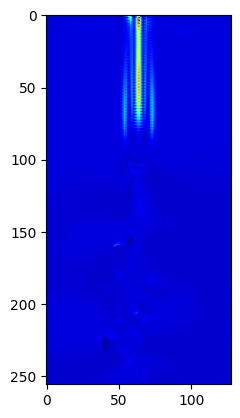

In [12]:
plt.imshow(label[1,:,:,0], cmap='jet')

In [13]:
print("Reading data:")
for i in range(nc):
    print(data[0, -1,-1,i])   
         
print("\nReading feats and label:")
for i in range(nc-1):
    print(feats[0, -1,-1,i])    
print(label[0, -1,-1,0])

Reading data:
0.00016
2.3753e-05
-8.4424e-05
8e-05
-0.000144296
-4.552e-06
8.78722e-06
9.74232e-09
-4.28215e-06
7.03134e-09
-1.02499e-07
6.80514e-06
-0.016063

Reading feats and label:
0.00016
2.3753e-05
-8.4424e-05
8e-05
-0.000144296
-4.552e-06
8.78722e-06
9.74232e-09
-4.28215e-06
7.03134e-09
-1.02499e-07
6.80514e-06
-0.016063


In [14]:
def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [15]:
def Model(Nn, Nx, Ny, Nf, Nl, Nly):
    de = [1, 2, 4, 8, 16]
    model = tf.keras.models.Sequential()
    input_layer = tf.keras.layers.Input(shape=(nx, ny, nf))
    x = tf.keras.layers.Conv2D(int(Nn/de[0]), (3,3), activation='relu', padding='same')(input_layer)
    x = tf.keras.layers.MaxPooling2D((2,2), padding='same')(x)
    for i in range(1, Nly):
        x = tf.keras.layers.Conv2D(int(Nn/de[i]), (3,3), activation='relu', padding='same')(x)
        x = tf.keras.layers.MaxPooling2D((2,2), padding='same')(x)
    for i in range(1, Nly+1):
        x = tf.keras.layers.Conv2D(int(Nn/de[Nly-i]), (3,3), activation='relu', padding='same')(x)
        x = tf.keras.layers.UpSampling2D((2,2))(x)
    output_layer = tf.keras.layers.Conv2D(nl, (3,3), activation='linear', padding='same')(x)
    
    model = tf.keras.models.Model(input_layer, output_layer)
    adam = tf.keras.optimizers.legacy.Adam(learning_rate=0.001, beta_1=0.9, 
                                           beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=[coeff_determination])
    model._name = f'model_n_{Nn}_lay_{Nly}'
    
    return model

In [16]:
neurons = [32, 64, 128, 256]
layers = [2, 3, 4, 5]
checkpoints = tf.keras.callbacks.ModelCheckpoint(filepath='CNN_checkpoints/test_M2_weight-{epoch:02d}.h5', 
                                                  monitor='val_loss', 
                                                  verbose=1, 
                                                  save_best_only=True, 
                                                  mode='min')
repof = './CNN_M2_repo.txt'
with open(repof, 'w') as f:
    f.write('layer\t neuron\t train_cod\t val_cod\n')
    for layer in layers:
        for neuron in neurons:
            model = Model(neuron, nx, ny, nf, nl, layer)
            history_callback = model.fit(x_train, y_train, epochs=500, batch_size=16, 
                                         validation_data=[x_val, y_val], validation_batch_size=4, 
                                         callbacks=[checkpoints])
            indx = np.argmin(history_callback.history['val_loss'])
            info = [history_callback.history['coeff_determination'][indx], 
                    history_callback.history['val_coeff_determination'][indx]]
            f.write(f'{layer}\t{neuron}\t{info[0]}\t{info[1]}\n')
    f.close()

2023-10-15 12:34:30.803255: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 38374 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0


Epoch 1/500


2023-10-15 12:34:32.052728: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2023-10-15 12:34:32.112599: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-10-15 12:34:32.113252: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-10-15 12:34:32.113273: W tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:109] Couldn't get ptxas version : FAILED_PRECONDITION: Couldn't get ptxas/nvlink version string: INTERNAL: Couldn't invoke ptxas --version
2023-10-15 12:34:32.113536: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-10-15 12:34:32.113571: W tensorflow/compiler/xla/stream_executor/gpu/redzone_allocator.cc:317] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This mes

6/6 [==============================] - ETA: 0s - loss: 0.0139 - coeff_determination: -0.1823 
Epoch 1: val_loss improved from inf to 0.01226, saving model to CNN_checkpoints/test_M2_weight-01.h5
6/6 [==============================] - 3s 152ms/step - loss: 0.0139 - coeff_determination: -0.1823 - val_loss: 0.0123 - val_coeff_determination: -0.0647
Epoch 2/500
6/6 [==============================] - ETA: 0s - loss: 0.0121 - coeff_determination: -0.0246
Epoch 2: val_loss improved from 0.01226 to 0.01183, saving model to CNN_checkpoints/test_M2_weight-02.h5
6/6 [==============================] - 0s 23ms/step - loss: 0.0121 - coeff_determination: -0.0246 - val_loss: 0.0118 - val_coeff_determination: -0.0202
Epoch 3/500
6/6 [==============================] - ETA: 0s - loss: 0.0119 - coeff_determination: -0.0083
Epoch 3: val_loss improved from 0.01183 to 0.01173, saving model to CNN_checkpoints/test_M2_weight-03.h5
6/6 [==============================] - 0s 27ms/step - loss: 0.0119 - coeff_deter

Epoch 24/500
6/6 [==============================] - ETA: 0s - loss: 0.0101 - coeff_determination: 0.1442
Epoch 24: val_loss improved from 0.01014 to 0.00993, saving model to CNN_checkpoints/test_M2_weight-24.h5
6/6 [==============================] - 0s 28ms/step - loss: 0.0101 - coeff_determination: 0.1442 - val_loss: 0.0099 - val_coeff_determination: 0.1760
Epoch 25/500
6/6 [==============================] - ETA: 0s - loss: 0.0100 - coeff_determination: 0.1567
Epoch 25: val_loss improved from 0.00993 to 0.00975, saving model to CNN_checkpoints/test_M2_weight-25.h5
6/6 [==============================] - 0s 29ms/step - loss: 0.0100 - coeff_determination: 0.1567 - val_loss: 0.0098 - val_coeff_determination: 0.1893
Epoch 26/500
6/6 [==============================] - ETA: 0s - loss: 0.0099 - coeff_determination: 0.1617
Epoch 26: val_loss did not improve from 0.00975
6/6 [==============================] - 0s 19ms/step - loss: 0.0099 - coeff_determination: 0.1617 - val_loss: 0.0102 - val_coe

Epoch 48/500
6/6 [==============================] - ETA: 0s - loss: 0.0068 - coeff_determination: 0.4319
Epoch 48: val_loss improved from 0.00670 to 0.00657, saving model to CNN_checkpoints/test_M2_weight-48.h5
6/6 [==============================] - 0s 24ms/step - loss: 0.0068 - coeff_determination: 0.4319 - val_loss: 0.0066 - val_coeff_determination: 0.4475
Epoch 49/500
6/6 [==============================] - ETA: 0s - loss: 0.0068 - coeff_determination: 0.4319
Epoch 49: val_loss improved from 0.00657 to 0.00632, saving model to CNN_checkpoints/test_M2_weight-49.h5
6/6 [==============================] - 0s 25ms/step - loss: 0.0068 - coeff_determination: 0.4319 - val_loss: 0.0063 - val_coeff_determination: 0.4906
Epoch 50/500
6/6 [==============================] - ETA: 0s - loss: 0.0066 - coeff_determination: 0.4476
Epoch 50: val_loss improved from 0.00632 to 0.00608, saving model to CNN_checkpoints/test_M2_weight-50.h5
6/6 [==============================] - 0s 28ms/step - loss: 0.0066 

Epoch 72/500
6/6 [==============================] - ETA: 0s - loss: 0.0040 - coeff_determination: 0.6584
Epoch 72: val_loss improved from 0.00385 to 0.00376, saving model to CNN_checkpoints/test_M2_weight-72.h5
6/6 [==============================] - 0s 26ms/step - loss: 0.0040 - coeff_determination: 0.6584 - val_loss: 0.0038 - val_coeff_determination: 0.6957
Epoch 73/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0040 - coeff_determination: 0.6661
Epoch 73: val_loss improved from 0.00376 to 0.00368, saving model to CNN_checkpoints/test_M2_weight-73.h5
6/6 [==============================] - 0s 26ms/step - loss: 0.0040 - coeff_determination: 0.6675 - val_loss: 0.0037 - val_coeff_determination: 0.7021
Epoch 74/500
6/6 [==============================] - ETA: 0s - loss: 0.0039 - coeff_determination: 0.6695
Epoch 74: val_loss improved from 0.00368 to 0.00366, saving model to CNN_checkpoints/test_M2_weight-74.h5
6/6 [==============================] - 0s 27ms/step - loss: 0.0039 

6/6 [==============================] - 0s 24ms/step - loss: 0.0026 - coeff_determination: 0.7843 - val_loss: 0.0023 - val_coeff_determination: 0.8069
Epoch 97/500
6/6 [==============================] - ETA: 0s - loss: 0.0025 - coeff_determination: 0.7923
Epoch 97: val_loss improved from 0.00232 to 0.00225, saving model to CNN_checkpoints/test_M2_weight-97.h5
6/6 [==============================] - 0s 28ms/step - loss: 0.0025 - coeff_determination: 0.7923 - val_loss: 0.0023 - val_coeff_determination: 0.8066
Epoch 98/500
6/6 [==============================] - ETA: 0s - loss: 0.0025 - coeff_determination: 0.7929
Epoch 98: val_loss did not improve from 0.00225
6/6 [==============================] - 0s 20ms/step - loss: 0.0025 - coeff_determination: 0.7929 - val_loss: 0.0023 - val_coeff_determination: 0.8135
Epoch 99/500
6/6 [==============================] - ETA: 0s - loss: 0.0024 - coeff_determination: 0.7969
Epoch 99: val_loss did not improve from 0.00225
6/6 [============================

Epoch 121/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0016 - coeff_determination: 0.8578
Epoch 121: val_loss improved from 0.00156 to 0.00151, saving model to CNN_checkpoints/test_M2_weight-121.h5
6/6 [==============================] - 0s 26ms/step - loss: 0.0017 - coeff_determination: 0.8594 - val_loss: 0.0015 - val_coeff_determination: 0.8689
Epoch 122/500
6/6 [==============================] - ETA: 0s - loss: 0.0016 - coeff_determination: 0.8657
Epoch 122: val_loss did not improve from 0.00151
6/6 [==============================] - 0s 20ms/step - loss: 0.0016 - coeff_determination: 0.8657 - val_loss: 0.0016 - val_coeff_determination: 0.8522
Epoch 123/500
6/6 [==============================] - ETA: 0s - loss: 0.0016 - coeff_determination: 0.8642
Epoch 123: val_loss improved from 0.00151 to 0.00147, saving model to CNN_checkpoints/test_M2_weight-123.h5
6/6 [==============================] - 0s 26ms/step - loss: 0.0016 - coeff_determination: 0.8642 - val_loss: 0.0015 -

Epoch 145/500
6/6 [==============================] - ETA: 0s - loss: 0.0012 - coeff_determination: 0.9002
Epoch 145: val_loss did not improve from 0.00108
6/6 [==============================] - 0s 20ms/step - loss: 0.0012 - coeff_determination: 0.9002 - val_loss: 0.0011 - val_coeff_determination: 0.9013
Epoch 146/500
6/6 [==============================] - ETA: 0s - loss: 0.0011 - coeff_determination: 0.9043
Epoch 146: val_loss improved from 0.00108 to 0.00106, saving model to CNN_checkpoints/test_M2_weight-146.h5
6/6 [==============================] - 0s 28ms/step - loss: 0.0011 - coeff_determination: 0.9043 - val_loss: 0.0011 - val_coeff_determination: 0.9040
Epoch 147/500
6/6 [==============================] - ETA: 0s - loss: 0.0011 - coeff_determination: 0.9054    
Epoch 147: val_loss improved from 0.00106 to 0.00106, saving model to CNN_checkpoints/test_M2_weight-147.h5
6/6 [==============================] - 0s 28ms/step - loss: 0.0011 - coeff_determination: 0.9054 - val_loss: 0.00

6/6 [==============================] - 0s 20ms/step - loss: 9.3034e-04 - coeff_determination: 0.9215 - val_loss: 9.0714e-04 - val_coeff_determination: 0.9163
Epoch 170/500
6/6 [==============================] - ETA: 0s - loss: 9.0963e-04 - coeff_determination: 0.9226
Epoch 170: val_loss improved from 0.00090 to 0.00087, saving model to CNN_checkpoints/test_M2_weight-170.h5
6/6 [==============================] - 0s 33ms/step - loss: 9.0963e-04 - coeff_determination: 0.9226 - val_loss: 8.7469e-04 - val_coeff_determination: 0.9196
Epoch 171/500
6/6 [==============================] - ETA: 0s - loss: 8.9676e-04 - coeff_determination: 0.9237
Epoch 171: val_loss improved from 0.00087 to 0.00087, saving model to CNN_checkpoints/test_M2_weight-171.h5
6/6 [==============================] - 0s 26ms/step - loss: 8.9676e-04 - coeff_determination: 0.9237 - val_loss: 8.6546e-04 - val_coeff_determination: 0.9205
Epoch 172/500
6/6 [==============================] - ETA: 0s - loss: 8.8669e-04 - coeff_de

6/6 [==============================] - 0s 20ms/step - loss: 8.1001e-04 - coeff_determination: 0.9316 - val_loss: 8.0364e-04 - val_coeff_determination: 0.9258
Epoch 194/500
6/6 [==============================] - ETA: 0s - loss: 8.1003e-04 - coeff_determination: 0.9321
Epoch 194: val_loss improved from 0.00080 to 0.00080, saving model to CNN_checkpoints/test_M2_weight-194.h5
6/6 [==============================] - 0s 26ms/step - loss: 8.1003e-04 - coeff_determination: 0.9321 - val_loss: 8.0212e-04 - val_coeff_determination: 0.9259
Epoch 195/500
6/6 [==============================] - ETA: 0s - loss: 8.2284e-04 - coeff_determination: 0.9302
Epoch 195: val_loss improved from 0.00080 to 0.00079, saving model to CNN_checkpoints/test_M2_weight-195.h5
6/6 [==============================] - 0s 26ms/step - loss: 8.2284e-04 - coeff_determination: 0.9302 - val_loss: 7.9257e-04 - val_coeff_determination: 0.9266
Epoch 196/500
6/6 [==============================] - ETA: 0s - loss: 8.1923e-04 - coeff_de

6/6 [==============================] - 0s 28ms/step - loss: 7.7096e-04 - coeff_determination: 0.9350 - val_loss: 7.4801e-04 - val_coeff_determination: 0.9307
Epoch 218/500
6/6 [==============================] - ETA: 0s - loss: 7.5109e-04 - coeff_determination: 0.9364
Epoch 218: val_loss did not improve from 0.00075
6/6 [==============================] - 0s 19ms/step - loss: 7.5109e-04 - coeff_determination: 0.9364 - val_loss: 7.7402e-04 - val_coeff_determination: 0.9284
Epoch 219/500
6/6 [==============================] - ETA: 0s - loss: 7.4601e-04 - coeff_determination: 0.9366
Epoch 219: val_loss improved from 0.00075 to 0.00073, saving model to CNN_checkpoints/test_M2_weight-219.h5
6/6 [==============================] - 0s 40ms/step - loss: 7.4601e-04 - coeff_determination: 0.9366 - val_loss: 7.3460e-04 - val_coeff_determination: 0.9320
Epoch 220/500
6/6 [==============================] - ETA: 0s - loss: 7.6036e-04 - coeff_determination: 0.9356
Epoch 220: val_loss did not improve fro

6/6 [==============================] - 0s 26ms/step - loss: 6.5717e-04 - coeff_determination: 0.9442 - val_loss: 6.5512e-04 - val_coeff_determination: 0.9392
Epoch 266/500
6/6 [==============================] - ETA: 0s - loss: 6.4323e-04 - coeff_determination: 0.9454
Epoch 266: val_loss did not improve from 0.00066
6/6 [==============================] - 0s 20ms/step - loss: 6.4323e-04 - coeff_determination: 0.9454 - val_loss: 6.9253e-04 - val_coeff_determination: 0.9357
Epoch 267/500
6/6 [==============================] - ETA: 0s - loss: 6.7364e-04 - coeff_determination: 0.9430
Epoch 267: val_loss did not improve from 0.00066
6/6 [==============================] - 0s 19ms/step - loss: 6.7364e-04 - coeff_determination: 0.9430 - val_loss: 6.9383e-04 - val_coeff_determination: 0.9354
Epoch 268/500
6/6 [==============================] - ETA: 0s - loss: 6.7460e-04 - coeff_determination: 0.9430
Epoch 268: val_loss did not improve from 0.00066
6/6 [==============================] - 0s 20ms/st

6/6 [==============================] - ETA: 0s - loss: 5.9830e-04 - coeff_determination: 0.9493
Epoch 290: val_loss did not improve from 0.00061
6/6 [==============================] - 0s 20ms/step - loss: 5.9830e-04 - coeff_determination: 0.9493 - val_loss: 6.6322e-04 - val_coeff_determination: 0.9378
Epoch 291/500
6/6 [==============================] - ETA: 0s - loss: 6.1200e-04 - coeff_determination: 0.9488
Epoch 291: val_loss did not improve from 0.00061
6/6 [==============================] - 0s 19ms/step - loss: 6.1200e-04 - coeff_determination: 0.9488 - val_loss: 6.1604e-04 - val_coeff_determination: 0.9427
Epoch 292/500
6/6 [==============================] - ETA: 0s - loss: 6.0313e-04 - coeff_determination: 0.9487
Epoch 292: val_loss did not improve from 0.00061
6/6 [==============================] - 0s 19ms/step - loss: 6.0313e-04 - coeff_determination: 0.9487 - val_loss: 6.2400e-04 - val_coeff_determination: 0.9415
Epoch 293/500
6/6 [==============================] - ETA: 0s - 

6/6 [==============================] - 0s 19ms/step - loss: 5.6033e-04 - coeff_determination: 0.9518 - val_loss: 5.7889e-04 - val_coeff_determination: 0.9457
Epoch 315/500
6/6 [==============================] - ETA: 0s - loss: 5.6170e-04 - coeff_determination: 0.9524
Epoch 315: val_loss improved from 0.00057 to 0.00057, saving model to CNN_checkpoints/test_M2_weight-315.h5
6/6 [==============================] - 0s 31ms/step - loss: 5.6170e-04 - coeff_determination: 0.9524 - val_loss: 5.6954e-04 - val_coeff_determination: 0.9465
Epoch 316/500
6/6 [==============================] - ETA: 0s - loss: 5.5960e-04 - coeff_determination: 0.9525
Epoch 316: val_loss improved from 0.00057 to 0.00057, saving model to CNN_checkpoints/test_M2_weight-316.h5
6/6 [==============================] - 0s 33ms/step - loss: 5.5960e-04 - coeff_determination: 0.9525 - val_loss: 5.6574e-04 - val_coeff_determination: 0.9469
Epoch 317/500
6/6 [==============================] - ETA: 0s - loss: 5.5057e-04 - coeff_de

Epoch 364/500
6/6 [==============================] - ETA: 0s - loss: 4.9647e-04 - coeff_determination: 0.9577
Epoch 364: val_loss did not improve from 0.00052
6/6 [==============================] - 0s 20ms/step - loss: 4.9647e-04 - coeff_determination: 0.9577 - val_loss: 5.2386e-04 - val_coeff_determination: 0.9504
Epoch 365/500
6/6 [==============================] - ETA: 0s - loss: 5.0435e-04 - coeff_determination: 0.9568
Epoch 365: val_loss did not improve from 0.00052
6/6 [==============================] - 0s 20ms/step - loss: 5.0435e-04 - coeff_determination: 0.9568 - val_loss: 5.1898e-04 - val_coeff_determination: 0.9508
Epoch 366/500
6/6 [==============================] - ETA: 0s - loss: 4.9811e-04 - coeff_determination: 0.9578
Epoch 366: val_loss improved from 0.00052 to 0.00051, saving model to CNN_checkpoints/test_M2_weight-366.h5
6/6 [==============================] - 0s 31ms/step - loss: 4.9811e-04 - coeff_determination: 0.9578 - val_loss: 5.1426e-04 - val_coeff_determinatio

Epoch 389/500
6/6 [==============================] - ETA: 0s - loss: 4.7791e-04 - coeff_determination: 0.9595
Epoch 389: val_loss did not improve from 0.00049
6/6 [==============================] - 0s 19ms/step - loss: 4.7791e-04 - coeff_determination: 0.9595 - val_loss: 4.9502e-04 - val_coeff_determination: 0.9527
Epoch 390/500
6/6 [==============================] - ETA: 0s - loss: 4.7002e-04 - coeff_determination: 0.9603
Epoch 390: val_loss improved from 0.00049 to 0.00049, saving model to CNN_checkpoints/test_M2_weight-390.h5
6/6 [==============================] - 0s 25ms/step - loss: 4.7002e-04 - coeff_determination: 0.9603 - val_loss: 4.8604e-04 - val_coeff_determination: 0.9535
Epoch 391/500
5/6 [========================>.....] - ETA: 0s - loss: 4.5290e-04 - coeff_determination: 0.9609
Epoch 391: val_loss improved from 0.00049 to 0.00048, saving model to CNN_checkpoints/test_M2_weight-391.h5
6/6 [==============================] - 0s 27ms/step - loss: 4.6276e-04 - coeff_determinat

Epoch 414/500
6/6 [==============================] - ETA: 0s - loss: 4.4909e-04 - coeff_determination: 0.9619
Epoch 414: val_loss did not improve from 0.00046
6/6 [==============================] - 0s 19ms/step - loss: 4.4909e-04 - coeff_determination: 0.9619 - val_loss: 4.9071e-04 - val_coeff_determination: 0.9528
Epoch 415/500
6/6 [==============================] - ETA: 0s - loss: 4.6422e-04 - coeff_determination: 0.9606
Epoch 415: val_loss did not improve from 0.00046
6/6 [==============================] - 0s 19ms/step - loss: 4.6422e-04 - coeff_determination: 0.9606 - val_loss: 4.8539e-04 - val_coeff_determination: 0.9526
Epoch 416/500
6/6 [==============================] - ETA: 0s - loss: 4.5108e-04 - coeff_determination: 0.9622
Epoch 416: val_loss improved from 0.00046 to 0.00046, saving model to CNN_checkpoints/test_M2_weight-416.h5
6/6 [==============================] - 0s 29ms/step - loss: 4.5108e-04 - coeff_determination: 0.9622 - val_loss: 4.5518e-04 - val_coeff_determinatio

Epoch 439/500
6/6 [==============================] - ETA: 0s - loss: 4.2821e-04 - coeff_determination: 0.9637
Epoch 439: val_loss did not improve from 0.00044
6/6 [==============================] - 0s 19ms/step - loss: 4.2821e-04 - coeff_determination: 0.9637 - val_loss: 4.6543e-04 - val_coeff_determination: 0.9546
Epoch 440/500
6/6 [==============================] - ETA: 0s - loss: 4.2723e-04 - coeff_determination: 0.9636
Epoch 440: val_loss did not improve from 0.00044
6/6 [==============================] - 0s 19ms/step - loss: 4.2723e-04 - coeff_determination: 0.9636 - val_loss: 4.4964e-04 - val_coeff_determination: 0.9568
Epoch 441/500
6/6 [==============================] - ETA: 0s - loss: 4.2925e-04 - coeff_determination: 0.9636
Epoch 441: val_loss did not improve from 0.00044
6/6 [==============================] - 0s 20ms/step - loss: 4.2925e-04 - coeff_determination: 0.9636 - val_loss: 4.5611e-04 - val_coeff_determination: 0.9561
Epoch 442/500
6/6 [==============================

Epoch 464/500
6/6 [==============================] - ETA: 0s - loss: 4.1677e-04 - coeff_determination: 0.9644
Epoch 464: val_loss did not improve from 0.00042
6/6 [==============================] - 0s 19ms/step - loss: 4.1677e-04 - coeff_determination: 0.9644 - val_loss: 4.3527e-04 - val_coeff_determination: 0.9577
Epoch 465/500
6/6 [==============================] - ETA: 0s - loss: 4.0705e-04 - coeff_determination: 0.9653
Epoch 465: val_loss did not improve from 0.00042
6/6 [==============================] - 0s 20ms/step - loss: 4.0705e-04 - coeff_determination: 0.9653 - val_loss: 4.2349e-04 - val_coeff_determination: 0.9588
Epoch 466/500
5/6 [========================>.....] - ETA: 0s - loss: 4.3379e-04 - coeff_determination: 0.9646
Epoch 466: val_loss did not improve from 0.00042
6/6 [==============================] - 0s 20ms/step - loss: 4.1631e-04 - coeff_determination: 0.9652 - val_loss: 4.8671e-04 - val_coeff_determination: 0.9533
Epoch 467/500
6/6 [==============================

Epoch 15/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0102 - coeff_determination: 0.1563
Epoch 15: val_loss did not improve from 0.00039
6/6 [==============================] - 0s 20ms/step - loss: 0.0100 - coeff_determination: 0.1605 - val_loss: 0.0096 - val_coeff_determination: 0.2061
Epoch 16/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0094 - coeff_determination: 0.1870
Epoch 16: val_loss did not improve from 0.00039
6/6 [==============================] - 0s 21ms/step - loss: 0.0096 - coeff_determination: 0.1873 - val_loss: 0.0093 - val_coeff_determination: 0.2311
Epoch 17/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0092 - coeff_determination: 0.2160
Epoch 17: val_loss did not improve from 0.00039
6/6 [==============================] - 0s 21ms/step - loss: 0.0093 - coeff_determination: 0.2163 - val_loss: 0.0090 - val_coeff_determination: 0.2578
Epoch 18/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0087 - coeff_determin

5/6 [========================>.....] - ETA: 0s - loss: 0.0043 - coeff_determination: 0.6434
Epoch 42: val_loss did not improve from 0.00039
6/6 [==============================] - 0s 21ms/step - loss: 0.0042 - coeff_determination: 0.6458 - val_loss: 0.0037 - val_coeff_determination: 0.6943
Epoch 43/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0039 - coeff_determination: 0.6793
Epoch 43: val_loss did not improve from 0.00039
6/6 [==============================] - 0s 21ms/step - loss: 0.0039 - coeff_determination: 0.6731 - val_loss: 0.0037 - val_coeff_determination: 0.7035
Epoch 44/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0037 - coeff_determination: 0.6841
Epoch 44: val_loss did not improve from 0.00039
6/6 [==============================] - 0s 22ms/step - loss: 0.0038 - coeff_determination: 0.6844 - val_loss: 0.0035 - val_coeff_determination: 0.7204
Epoch 45/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0038 - coeff_determination: 0.6906

Epoch 96/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0010 - coeff_determination: 0.9183    
Epoch 96: val_loss did not improve from 0.00039
6/6 [==============================] - 0s 21ms/step - loss: 9.5582e-04 - coeff_determination: 0.9205 - val_loss: 9.5771e-04 - val_coeff_determination: 0.9115
Epoch 97/500
5/6 [========================>.....] - ETA: 0s - loss: 9.8195e-04 - coeff_determination: 0.9158
Epoch 97: val_loss did not improve from 0.00039
6/6 [==============================] - 0s 21ms/step - loss: 9.6330e-04 - coeff_determination: 0.9190 - val_loss: 8.7042e-04 - val_coeff_determination: 0.9217
Epoch 98/500
5/6 [========================>.....] - ETA: 0s - loss: 8.1130e-04 - coeff_determination: 0.9280
Epoch 98: val_loss did not improve from 0.00039
6/6 [==============================] - 0s 21ms/step - loss: 8.8561e-04 - coeff_determination: 0.9250 - val_loss: 8.8454e-04 - val_coeff_determination: 0.9190
Epoch 99/500
5/6 [========================>.....] - ETA

Epoch 122/500
5/6 [========================>.....] - ETA: 0s - loss: 7.0536e-04 - coeff_determination: 0.9405
Epoch 122: val_loss did not improve from 0.00039
6/6 [==============================] - 0s 22ms/step - loss: 7.0225e-04 - coeff_determination: 0.9406 - val_loss: 6.7575e-04 - val_coeff_determination: 0.9382
Epoch 123/500
5/6 [========================>.....] - ETA: 0s - loss: 6.9948e-04 - coeff_determination: 0.9415
Epoch 123: val_loss did not improve from 0.00039
6/6 [==============================] - 0s 20ms/step - loss: 6.8987e-04 - coeff_determination: 0.9421 - val_loss: 6.7665e-04 - val_coeff_determination: 0.9378
Epoch 124/500
5/6 [========================>.....] - ETA: 0s - loss: 6.4166e-04 - coeff_determination: 0.9420
Epoch 124: val_loss did not improve from 0.00039
6/6 [==============================] - 0s 21ms/step - loss: 6.9302e-04 - coeff_determination: 0.9415 - val_loss: 6.6685e-04 - val_coeff_determination: 0.9392
Epoch 125/500
5/6 [========================>.....

Epoch 148/500
5/6 [========================>.....] - ETA: 0s - loss: 6.5898e-04 - coeff_determination: 0.9470
Epoch 148: val_loss did not improve from 0.00039
6/6 [==============================] - 0s 21ms/step - loss: 6.3026e-04 - coeff_determination: 0.9477 - val_loss: 6.0778e-04 - val_coeff_determination: 0.9435
Epoch 149/500
5/6 [========================>.....] - ETA: 0s - loss: 6.4236e-04 - coeff_determination: 0.9470
Epoch 149: val_loss did not improve from 0.00039
6/6 [==============================] - 0s 21ms/step - loss: 6.1020e-04 - coeff_determination: 0.9495 - val_loss: 5.9453e-04 - val_coeff_determination: 0.9451
Epoch 150/500
5/6 [========================>.....] - ETA: 0s - loss: 6.1323e-04 - coeff_determination: 0.9496
Epoch 150: val_loss did not improve from 0.00039
6/6 [==============================] - 0s 21ms/step - loss: 6.0733e-04 - coeff_determination: 0.9480 - val_loss: 5.8018e-04 - val_coeff_determination: 0.9464
Epoch 151/500
5/6 [========================>.....

Epoch 174/500
5/6 [========================>.....] - ETA: 0s - loss: 5.4147e-04 - coeff_determination: 0.9551
Epoch 174: val_loss did not improve from 0.00039
6/6 [==============================] - 0s 21ms/step - loss: 5.3289e-04 - coeff_determination: 0.9551 - val_loss: 6.5419e-04 - val_coeff_determination: 0.9380
Epoch 175/500
5/6 [========================>.....] - ETA: 0s - loss: 5.7408e-04 - coeff_determination: 0.9506
Epoch 175: val_loss did not improve from 0.00039
6/6 [==============================] - 0s 21ms/step - loss: 5.9367e-04 - coeff_determination: 0.9496 - val_loss: 6.0103e-04 - val_coeff_determination: 0.9426
Epoch 176/500
5/6 [========================>.....] - ETA: 0s - loss: 5.8429e-04 - coeff_determination: 0.9532
Epoch 176: val_loss did not improve from 0.00039
6/6 [==============================] - 0s 21ms/step - loss: 5.4978e-04 - coeff_determination: 0.9543 - val_loss: 5.2899e-04 - val_coeff_determination: 0.9504
Epoch 177/500
5/6 [========================>.....

Epoch 200/500
5/6 [========================>.....] - ETA: 0s - loss: 4.9368e-04 - coeff_determination: 0.9565
Epoch 200: val_loss did not improve from 0.00039
6/6 [==============================] - 0s 21ms/step - loss: 5.0693e-04 - coeff_determination: 0.9569 - val_loss: 4.8588e-04 - val_coeff_determination: 0.9535
Epoch 201/500
5/6 [========================>.....] - ETA: 0s - loss: 4.9233e-04 - coeff_determination: 0.9605
Epoch 201: val_loss did not improve from 0.00039
6/6 [==============================] - 0s 21ms/step - loss: 4.8575e-04 - coeff_determination: 0.9571 - val_loss: 4.7315e-04 - val_coeff_determination: 0.9551
Epoch 202/500
5/6 [========================>.....] - ETA: 0s - loss: 4.8114e-04 - coeff_determination: 0.9612
Epoch 202: val_loss did not improve from 0.00039
6/6 [==============================] - 0s 21ms/step - loss: 4.6782e-04 - coeff_determination: 0.9596 - val_loss: 4.8209e-04 - val_coeff_determination: 0.9540
Epoch 203/500
5/6 [========================>.....

Epoch 226/500
5/6 [========================>.....] - ETA: 0s - loss: 4.0636e-04 - coeff_determination: 0.9657
Epoch 226: val_loss did not improve from 0.00039
6/6 [==============================] - 0s 21ms/step - loss: 4.1033e-04 - coeff_determination: 0.9647 - val_loss: 4.2169e-04 - val_coeff_determination: 0.9596
Epoch 227/500
5/6 [========================>.....] - ETA: 0s - loss: 3.9718e-04 - coeff_determination: 0.9649
Epoch 227: val_loss did not improve from 0.00039
6/6 [==============================] - 0s 21ms/step - loss: 4.0643e-04 - coeff_determination: 0.9654 - val_loss: 4.4030e-04 - val_coeff_determination: 0.9579
Epoch 228/500
5/6 [========================>.....] - ETA: 0s - loss: 4.1977e-04 - coeff_determination: 0.9647
Epoch 228: val_loss did not improve from 0.00039
6/6 [==============================] - 0s 21ms/step - loss: 4.1169e-04 - coeff_determination: 0.9654 - val_loss: 4.2505e-04 - val_coeff_determination: 0.9590
Epoch 229/500
5/6 [========================>.....

Epoch 252/500
5/6 [========================>.....] - ETA: 0s - loss: 4.2715e-04 - coeff_determination: 0.9636
Epoch 252: val_loss did not improve from 0.00039
6/6 [==============================] - 0s 21ms/step - loss: 4.3170e-04 - coeff_determination: 0.9637 - val_loss: 4.2566e-04 - val_coeff_determination: 0.9580
Epoch 253/500
5/6 [========================>.....] - ETA: 0s - loss: 3.8697e-04 - coeff_determination: 0.9656
Epoch 253: val_loss did not improve from 0.00039
6/6 [==============================] - 0s 22ms/step - loss: 3.9909e-04 - coeff_determination: 0.9661 - val_loss: 4.0726e-04 - val_coeff_determination: 0.9603
Epoch 254/500
5/6 [========================>.....] - ETA: 0s - loss: 3.7185e-04 - coeff_determination: 0.9689
Epoch 254: val_loss improved from 0.00039 to 0.00039, saving model to CNN_checkpoints/test_M2_weight-254.h5
6/6 [==============================] - 0s 29ms/step - loss: 3.7509e-04 - coeff_determination: 0.9679 - val_loss: 3.9222e-04 - val_coeff_determinatio

6/6 [==============================] - 0s 25ms/step - loss: 3.4039e-04 - coeff_determination: 0.9712 - val_loss: 3.5810e-04 - val_coeff_determination: 0.9648
Epoch 277/500
5/6 [========================>.....] - ETA: 0s - loss: 3.4100e-04 - coeff_determination: 0.9713
Epoch 277: val_loss improved from 0.00036 to 0.00036, saving model to CNN_checkpoints/test_M2_weight-277.h5
6/6 [==============================] - 0s 26ms/step - loss: 3.3192e-04 - coeff_determination: 0.9719 - val_loss: 3.5560e-04 - val_coeff_determination: 0.9651
Epoch 278/500
5/6 [========================>.....] - ETA: 0s - loss: 3.4353e-04 - coeff_determination: 0.9688
Epoch 278: val_loss did not improve from 0.00036
6/6 [==============================] - 0s 21ms/step - loss: 3.5023e-04 - coeff_determination: 0.9701 - val_loss: 3.8016e-04 - val_coeff_determination: 0.9625
Epoch 279/500
5/6 [========================>.....] - ETA: 0s - loss: 3.4021e-04 - coeff_determination: 0.9716
Epoch 279: val_loss did not improve fro

5/6 [========================>.....] - ETA: 0s - loss: 3.2377e-04 - coeff_determination: 0.9717
Epoch 301: val_loss did not improve from 0.00034
6/6 [==============================] - 0s 22ms/step - loss: 3.3455e-04 - coeff_determination: 0.9715 - val_loss: 3.8850e-04 - val_coeff_determination: 0.9616
Epoch 302/500
5/6 [========================>.....] - ETA: 0s - loss: 3.3511e-04 - coeff_determination: 0.9714
Epoch 302: val_loss did not improve from 0.00034
6/6 [==============================] - 0s 22ms/step - loss: 3.3373e-04 - coeff_determination: 0.9720 - val_loss: 3.6858e-04 - val_coeff_determination: 0.9636
Epoch 303/500
5/6 [========================>.....] - ETA: 0s - loss: 3.5956e-04 - coeff_determination: 0.9702
Epoch 303: val_loss did not improve from 0.00034
6/6 [==============================] - 0s 21ms/step - loss: 3.5014e-04 - coeff_determination: 0.9704 - val_loss: 3.8576e-04 - val_coeff_determination: 0.9620
Epoch 304/500
5/6 [========================>.....] - ETA: 0s - 

Epoch 326/500
5/6 [========================>.....] - ETA: 0s - loss: 2.7564e-04 - coeff_determination: 0.9759
Epoch 326: val_loss did not improve from 0.00032
6/6 [==============================] - 0s 21ms/step - loss: 2.8856e-04 - coeff_determination: 0.9753 - val_loss: 3.3232e-04 - val_coeff_determination: 0.9670
Epoch 327/500
5/6 [========================>.....] - ETA: 0s - loss: 2.9540e-04 - coeff_determination: 0.9746
Epoch 327: val_loss did not improve from 0.00032
6/6 [==============================] - 0s 22ms/step - loss: 2.9237e-04 - coeff_determination: 0.9751 - val_loss: 3.2419e-04 - val_coeff_determination: 0.9674
Epoch 328/500
5/6 [========================>.....] - ETA: 0s - loss: 2.9167e-04 - coeff_determination: 0.9753
Epoch 328: val_loss improved from 0.00032 to 0.00032, saving model to CNN_checkpoints/test_M2_weight-328.h5
6/6 [==============================] - 0s 32ms/step - loss: 2.8601e-04 - coeff_determination: 0.9759 - val_loss: 3.1658e-04 - val_coeff_determinatio

Epoch 351/500
5/6 [========================>.....] - ETA: 0s - loss: 2.7426e-04 - coeff_determination: 0.9753
Epoch 351: val_loss did not improve from 0.00031
6/6 [==============================] - 0s 21ms/step - loss: 2.8210e-04 - coeff_determination: 0.9761 - val_loss: 3.0656e-04 - val_coeff_determination: 0.9691
Epoch 352/500
5/6 [========================>.....] - ETA: 0s - loss: 2.6990e-04 - coeff_determination: 0.9768
Epoch 352: val_loss improved from 0.00031 to 0.00030, saving model to CNN_checkpoints/test_M2_weight-352.h5
6/6 [==============================] - 0s 26ms/step - loss: 2.6898e-04 - coeff_determination: 0.9771 - val_loss: 3.0498e-04 - val_coeff_determination: 0.9694
Epoch 353/500
5/6 [========================>.....] - ETA: 0s - loss: 2.5830e-04 - coeff_determination: 0.9777
Epoch 353: val_loss did not improve from 0.00030
6/6 [==============================] - 0s 21ms/step - loss: 2.6918e-04 - coeff_determination: 0.9769 - val_loss: 3.0513e-04 - val_coeff_determinatio

Epoch 376/500
5/6 [========================>.....] - ETA: 0s - loss: 2.7270e-04 - coeff_determination: 0.9762
Epoch 376: val_loss improved from 0.00029 to 0.00029, saving model to CNN_checkpoints/test_M2_weight-376.h5
6/6 [==============================] - 0s 26ms/step - loss: 2.7477e-04 - coeff_determination: 0.9764 - val_loss: 2.8670e-04 - val_coeff_determination: 0.9709
Epoch 377/500
5/6 [========================>.....] - ETA: 0s - loss: 2.5756e-04 - coeff_determination: 0.9778
Epoch 377: val_loss did not improve from 0.00029
6/6 [==============================] - 0s 21ms/step - loss: 2.5572e-04 - coeff_determination: 0.9783 - val_loss: 3.0882e-04 - val_coeff_determination: 0.9690
Epoch 378/500
5/6 [========================>.....] - ETA: 0s - loss: 2.6197e-04 - coeff_determination: 0.9768
Epoch 378: val_loss did not improve from 0.00029
6/6 [==============================] - 0s 22ms/step - loss: 2.6130e-04 - coeff_determination: 0.9777 - val_loss: 3.6291e-04 - val_coeff_determinatio

Epoch 426/500
5/6 [========================>.....] - ETA: 0s - loss: 2.4687e-04 - coeff_determination: 0.9792
Epoch 426: val_loss did not improve from 0.00027
6/6 [==============================] - 0s 21ms/step - loss: 2.4091e-04 - coeff_determination: 0.9795 - val_loss: 2.7156e-04 - val_coeff_determination: 0.9724
Epoch 427/500
5/6 [========================>.....] - ETA: 0s - loss: 2.4229e-04 - coeff_determination: 0.9789
Epoch 427: val_loss did not improve from 0.00027
6/6 [==============================] - 0s 20ms/step - loss: 2.4360e-04 - coeff_determination: 0.9793 - val_loss: 2.7115e-04 - val_coeff_determination: 0.9723
Epoch 428/500
5/6 [========================>.....] - ETA: 0s - loss: 2.3542e-04 - coeff_determination: 0.9791
Epoch 428: val_loss did not improve from 0.00027
6/6 [==============================] - 0s 21ms/step - loss: 2.3708e-04 - coeff_determination: 0.9795 - val_loss: 3.0079e-04 - val_coeff_determination: 0.9698
Epoch 429/500
5/6 [========================>.....

Epoch 477/500
5/6 [========================>.....] - ETA: 0s - loss: 2.2439e-04 - coeff_determination: 0.9814
Epoch 477: val_loss improved from 0.00025 to 0.00025, saving model to CNN_checkpoints/test_M2_weight-477.h5
6/6 [==============================] - 0s 25ms/step - loss: 2.1748e-04 - coeff_determination: 0.9815 - val_loss: 2.5210e-04 - val_coeff_determination: 0.9740
Epoch 478/500
5/6 [========================>.....] - ETA: 0s - loss: 2.1419e-04 - coeff_determination: 0.9822
Epoch 478: val_loss improved from 0.00025 to 0.00025, saving model to CNN_checkpoints/test_M2_weight-478.h5
6/6 [==============================] - 0s 28ms/step - loss: 2.1154e-04 - coeff_determination: 0.9822 - val_loss: 2.4908e-04 - val_coeff_determination: 0.9743
Epoch 479/500
5/6 [========================>.....] - ETA: 0s - loss: 2.0623e-04 - coeff_determination: 0.9826
Epoch 479: val_loss did not improve from 0.00025
6/6 [==============================] - 0s 22ms/step - loss: 2.0916e-04 - coeff_determinat

4/6 [===================>..........] - ETA: 0s - loss: 0.0100 - coeff_determination: 0.1710
Epoch 29: val_loss did not improve from 0.00025
6/6 [==============================] - 0s 26ms/step - loss: 0.0097 - coeff_determination: 0.1828 - val_loss: 0.0091 - val_coeff_determination: 0.2429
Epoch 30/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0087 - coeff_determination: 0.2316
Epoch 30: val_loss did not improve from 0.00025
6/6 [==============================] - 0s 26ms/step - loss: 0.0091 - coeff_determination: 0.2351 - val_loss: 0.0087 - val_coeff_determination: 0.2826
Epoch 31/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0093 - coeff_determination: 0.2605
Epoch 31: val_loss did not improve from 0.00025
6/6 [==============================] - 0s 27ms/step - loss: 0.0087 - coeff_determination: 0.2725 - val_loss: 0.0084 - val_coeff_determination: 0.3143
Epoch 32/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0080 - coeff_determination: 0.2946

4/6 [===================>..........] - ETA: 0s - loss: 0.0020 - coeff_determination: 0.8212
Epoch 83: val_loss did not improve from 0.00025
6/6 [==============================] - 0s 26ms/step - loss: 0.0021 - coeff_determination: 0.8275 - val_loss: 0.0018 - val_coeff_determination: 0.8446
Epoch 84/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0021 - coeff_determination: 0.8309
Epoch 84: val_loss did not improve from 0.00025
6/6 [==============================] - 0s 26ms/step - loss: 0.0020 - coeff_determination: 0.8335 - val_loss: 0.0018 - val_coeff_determination: 0.8469
Epoch 85/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0019 - coeff_determination: 0.8371
Epoch 85: val_loss did not improve from 0.00025
6/6 [==============================] - 0s 27ms/step - loss: 0.0019 - coeff_determination: 0.8362 - val_loss: 0.0017 - val_coeff_determination: 0.8545
Epoch 86/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0019 - coeff_determination: 0.8373

Epoch 110/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0011 - coeff_determination: 0.9112    
Epoch 110: val_loss did not improve from 0.00025
6/6 [==============================] - 0s 28ms/step - loss: 0.0011 - coeff_determination: 0.9080 - val_loss: 0.0010 - val_coeff_determination: 0.9080
Epoch 111/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0012 - coeff_determination: 0.9024
Epoch 111: val_loss did not improve from 0.00025
6/6 [==============================] - 0s 27ms/step - loss: 0.0011 - coeff_determination: 0.9070 - val_loss: 0.0010 - val_coeff_determination: 0.9017
Epoch 112/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0010 - coeff_determination: 0.9114
Epoch 112: val_loss did not improve from 0.00025
6/6 [==============================] - 0s 26ms/step - loss: 0.0011 - coeff_determination: 0.9096 - val_loss: 9.9435e-04 - val_coeff_determination: 0.9071
Epoch 113/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0011 -

Epoch 162/500
4/6 [===================>..........] - ETA: 0s - loss: 7.5371e-04 - coeff_determination: 0.9380
Epoch 162: val_loss did not improve from 0.00025
6/6 [==============================] - 0s 26ms/step - loss: 7.4927e-04 - coeff_determination: 0.9363 - val_loss: 7.2290e-04 - val_coeff_determination: 0.9331
Epoch 163/500
4/6 [===================>..........] - ETA: 0s - loss: 7.6038e-04 - coeff_determination: 0.9378
Epoch 163: val_loss did not improve from 0.00025
6/6 [==============================] - 0s 26ms/step - loss: 7.2500e-04 - coeff_determination: 0.9389 - val_loss: 6.9367e-04 - val_coeff_determination: 0.9368
Epoch 164/500
4/6 [===================>..........] - ETA: 0s - loss: 6.3461e-04 - coeff_determination: 0.9434
Epoch 164: val_loss did not improve from 0.00025
6/6 [==============================] - 0s 27ms/step - loss: 7.1716e-04 - coeff_determination: 0.9396 - val_loss: 6.9213e-04 - val_coeff_determination: 0.9370
Epoch 165/500
4/6 [===================>..........

Epoch 188/500
4/6 [===================>..........] - ETA: 0s - loss: 6.4632e-04 - coeff_determination: 0.9451
Epoch 188: val_loss did not improve from 0.00025
6/6 [==============================] - 0s 26ms/step - loss: 6.2369e-04 - coeff_determination: 0.9473 - val_loss: 6.1645e-04 - val_coeff_determination: 0.9425
Epoch 189/500
4/6 [===================>..........] - ETA: 0s - loss: 5.6056e-04 - coeff_determination: 0.9496
Epoch 189: val_loss did not improve from 0.00025
6/6 [==============================] - 0s 26ms/step - loss: 6.1482e-04 - coeff_determination: 0.9483 - val_loss: 6.8136e-04 - val_coeff_determination: 0.9364
Epoch 190/500
4/6 [===================>..........] - ETA: 0s - loss: 7.1271e-04 - coeff_determination: 0.9435
Epoch 190: val_loss did not improve from 0.00025
6/6 [==============================] - 0s 26ms/step - loss: 6.5579e-04 - coeff_determination: 0.9454 - val_loss: 6.1830e-04 - val_coeff_determination: 0.9428
Epoch 191/500
4/6 [===================>..........

Epoch 214/500
4/6 [===================>..........] - ETA: 0s - loss: 5.4756e-04 - coeff_determination: 0.9523
Epoch 214: val_loss did not improve from 0.00025
6/6 [==============================] - 0s 26ms/step - loss: 5.5809e-04 - coeff_determination: 0.9529 - val_loss: 5.4453e-04 - val_coeff_determination: 0.9490
Epoch 215/500
4/6 [===================>..........] - ETA: 0s - loss: 5.5485e-04 - coeff_determination: 0.9541
Epoch 215: val_loss did not improve from 0.00025
6/6 [==============================] - 0s 26ms/step - loss: 5.5182e-04 - coeff_determination: 0.9534 - val_loss: 5.8700e-04 - val_coeff_determination: 0.9444
Epoch 216/500
4/6 [===================>..........] - ETA: 0s - loss: 5.7843e-04 - coeff_determination: 0.9510
Epoch 216: val_loss did not improve from 0.00025
6/6 [==============================] - 0s 26ms/step - loss: 5.6409e-04 - coeff_determination: 0.9516 - val_loss: 5.4235e-04 - val_coeff_determination: 0.9491
Epoch 217/500
4/6 [===================>..........

Epoch 240/500
4/6 [===================>..........] - ETA: 0s - loss: 5.3564e-04 - coeff_determination: 0.9575
Epoch 240: val_loss did not improve from 0.00025
6/6 [==============================] - 0s 26ms/step - loss: 5.0796e-04 - coeff_determination: 0.9570 - val_loss: 5.2584e-04 - val_coeff_determination: 0.9498
Epoch 241/500
4/6 [===================>..........] - ETA: 0s - loss: 4.9108e-04 - coeff_determination: 0.9567
Epoch 241: val_loss did not improve from 0.00025
6/6 [==============================] - 0s 26ms/step - loss: 4.9369e-04 - coeff_determination: 0.9581 - val_loss: 4.9860e-04 - val_coeff_determination: 0.9529
Epoch 242/500
4/6 [===================>..........] - ETA: 0s - loss: 5.0918e-04 - coeff_determination: 0.9589
Epoch 242: val_loss did not improve from 0.00025
6/6 [==============================] - 0s 27ms/step - loss: 4.9443e-04 - coeff_determination: 0.9578 - val_loss: 5.1029e-04 - val_coeff_determination: 0.9520
Epoch 243/500
4/6 [===================>..........

Epoch 266/500
4/6 [===================>..........] - ETA: 0s - loss: 4.3447e-04 - coeff_determination: 0.9605
Epoch 266: val_loss did not improve from 0.00025
6/6 [==============================] - 0s 26ms/step - loss: 4.5452e-04 - coeff_determination: 0.9616 - val_loss: 4.5888e-04 - val_coeff_determination: 0.9562
Epoch 267/500
4/6 [===================>..........] - ETA: 0s - loss: 4.6090e-04 - coeff_determination: 0.9632
Epoch 267: val_loss did not improve from 0.00025
6/6 [==============================] - 0s 26ms/step - loss: 4.4089e-04 - coeff_determination: 0.9624 - val_loss: 4.5647e-04 - val_coeff_determination: 0.9563
Epoch 268/500
4/6 [===================>..........] - ETA: 0s - loss: 4.3632e-04 - coeff_determination: 0.9607
Epoch 268: val_loss did not improve from 0.00025
6/6 [==============================] - 0s 27ms/step - loss: 4.4784e-04 - coeff_determination: 0.9615 - val_loss: 5.2152e-04 - val_coeff_determination: 0.9507
Epoch 269/500
4/6 [===================>..........

Epoch 292/500
4/6 [===================>..........] - ETA: 0s - loss: 4.2750e-04 - coeff_determination: 0.9638
Epoch 292: val_loss did not improve from 0.00025
6/6 [==============================] - 0s 27ms/step - loss: 4.2486e-04 - coeff_determination: 0.9636 - val_loss: 4.5010e-04 - val_coeff_determination: 0.9561
Epoch 293/500
4/6 [===================>..........] - ETA: 0s - loss: 4.2558e-04 - coeff_determination: 0.9643
Epoch 293: val_loss did not improve from 0.00025
6/6 [==============================] - 0s 27ms/step - loss: 4.1334e-04 - coeff_determination: 0.9653 - val_loss: 4.3853e-04 - val_coeff_determination: 0.9580
Epoch 294/500
4/6 [===================>..........] - ETA: 0s - loss: 4.3519e-04 - coeff_determination: 0.9648
Epoch 294: val_loss did not improve from 0.00025
6/6 [==============================] - 0s 28ms/step - loss: 4.2027e-04 - coeff_determination: 0.9646 - val_loss: 4.9078e-04 - val_coeff_determination: 0.9523
Epoch 295/500
4/6 [===================>..........

Epoch 318/500
4/6 [===================>..........] - ETA: 0s - loss: 3.9735e-04 - coeff_determination: 0.9667
Epoch 318: val_loss did not improve from 0.00025
6/6 [==============================] - 0s 27ms/step - loss: 3.8225e-04 - coeff_determination: 0.9679 - val_loss: 4.8677e-04 - val_coeff_determination: 0.9528
Epoch 319/500
4/6 [===================>..........] - ETA: 0s - loss: 3.9241e-04 - coeff_determination: 0.9657
Epoch 319: val_loss did not improve from 0.00025
6/6 [==============================] - 0s 26ms/step - loss: 4.1052e-04 - coeff_determination: 0.9647 - val_loss: 3.9965e-04 - val_coeff_determination: 0.9610
Epoch 320/500
4/6 [===================>..........] - ETA: 0s - loss: 4.0905e-04 - coeff_determination: 0.9674
Epoch 320: val_loss did not improve from 0.00025
6/6 [==============================] - 0s 26ms/step - loss: 3.8207e-04 - coeff_determination: 0.9678 - val_loss: 4.0216e-04 - val_coeff_determination: 0.9610
Epoch 321/500
4/6 [===================>..........

Epoch 344/500
4/6 [===================>..........] - ETA: 0s - loss: 4.0444e-04 - coeff_determination: 0.9675
Epoch 344: val_loss did not improve from 0.00025
6/6 [==============================] - 0s 27ms/step - loss: 3.6860e-04 - coeff_determination: 0.9690 - val_loss: 3.8558e-04 - val_coeff_determination: 0.9621
Epoch 345/500
4/6 [===================>..........] - ETA: 0s - loss: 3.7713e-04 - coeff_determination: 0.9680
Epoch 345: val_loss did not improve from 0.00025
6/6 [==============================] - 0s 26ms/step - loss: 3.7017e-04 - coeff_determination: 0.9685 - val_loss: 3.6901e-04 - val_coeff_determination: 0.9636
Epoch 346/500
4/6 [===================>..........] - ETA: 0s - loss: 3.1712e-04 - coeff_determination: 0.9684
Epoch 346: val_loss did not improve from 0.00025
6/6 [==============================] - 0s 26ms/step - loss: 3.5832e-04 - coeff_determination: 0.9689 - val_loss: 3.7913e-04 - val_coeff_determination: 0.9628
Epoch 347/500
4/6 [===================>..........

Epoch 370/500
4/6 [===================>..........] - ETA: 0s - loss: 3.6515e-04 - coeff_determination: 0.9705
Epoch 370: val_loss did not improve from 0.00025
6/6 [==============================] - 0s 26ms/step - loss: 3.5346e-04 - coeff_determination: 0.9698 - val_loss: 3.6791e-04 - val_coeff_determination: 0.9630
Epoch 371/500
4/6 [===================>..........] - ETA: 0s - loss: 3.6038e-04 - coeff_determination: 0.9711
Epoch 371: val_loss did not improve from 0.00025
6/6 [==============================] - 0s 27ms/step - loss: 3.4322e-04 - coeff_determination: 0.9709 - val_loss: 3.5976e-04 - val_coeff_determination: 0.9643
Epoch 372/500
4/6 [===================>..........] - ETA: 0s - loss: 2.9420e-04 - coeff_determination: 0.9732
Epoch 372: val_loss did not improve from 0.00025
6/6 [==============================] - 0s 27ms/step - loss: 3.2508e-04 - coeff_determination: 0.9727 - val_loss: 3.5429e-04 - val_coeff_determination: 0.9649
Epoch 373/500
4/6 [===================>..........

Epoch 396/500
4/6 [===================>..........] - ETA: 0s - loss: 3.1016e-04 - coeff_determination: 0.9740
Epoch 396: val_loss did not improve from 0.00025
6/6 [==============================] - 0s 27ms/step - loss: 3.0914e-04 - coeff_determination: 0.9736 - val_loss: 3.3365e-04 - val_coeff_determination: 0.9665
Epoch 397/500
4/6 [===================>..........] - ETA: 0s - loss: 2.9964e-04 - coeff_determination: 0.9720
Epoch 397: val_loss did not improve from 0.00025
6/6 [==============================] - 0s 26ms/step - loss: 3.0841e-04 - coeff_determination: 0.9737 - val_loss: 3.4495e-04 - val_coeff_determination: 0.9656
Epoch 398/500
4/6 [===================>..........] - ETA: 0s - loss: 3.3815e-04 - coeff_determination: 0.9724
Epoch 398: val_loss did not improve from 0.00025
6/6 [==============================] - 0s 26ms/step - loss: 3.2649e-04 - coeff_determination: 0.9723 - val_loss: 3.7730e-04 - val_coeff_determination: 0.9626
Epoch 399/500
4/6 [===================>..........

Epoch 422/500
4/6 [===================>..........] - ETA: 0s - loss: 2.7589e-04 - coeff_determination: 0.9761
Epoch 422: val_loss did not improve from 0.00025
6/6 [==============================] - 0s 28ms/step - loss: 2.8450e-04 - coeff_determination: 0.9759 - val_loss: 3.2261e-04 - val_coeff_determination: 0.9675
Epoch 423/500
4/6 [===================>..........] - ETA: 0s - loss: 3.0383e-04 - coeff_determination: 0.9748
Epoch 423: val_loss did not improve from 0.00025
6/6 [==============================] - 0s 28ms/step - loss: 2.9202e-04 - coeff_determination: 0.9756 - val_loss: 3.1832e-04 - val_coeff_determination: 0.9680
Epoch 424/500
4/6 [===================>..........] - ETA: 0s - loss: 2.9908e-04 - coeff_determination: 0.9758
Epoch 424: val_loss did not improve from 0.00025
6/6 [==============================] - 0s 26ms/step - loss: 2.8233e-04 - coeff_determination: 0.9762 - val_loss: 3.1848e-04 - val_coeff_determination: 0.9678
Epoch 425/500
4/6 [===================>..........

Epoch 448/500
4/6 [===================>..........] - ETA: 0s - loss: 2.5865e-04 - coeff_determination: 0.9759
Epoch 448: val_loss did not improve from 0.00025
6/6 [==============================] - 0s 26ms/step - loss: 2.8623e-04 - coeff_determination: 0.9751 - val_loss: 3.3219e-04 - val_coeff_determination: 0.9661
Epoch 449/500
4/6 [===================>..........] - ETA: 0s - loss: 3.1124e-04 - coeff_determination: 0.9744
Epoch 449: val_loss did not improve from 0.00025
6/6 [==============================] - 0s 27ms/step - loss: 2.9165e-04 - coeff_determination: 0.9754 - val_loss: 3.3964e-04 - val_coeff_determination: 0.9659
Epoch 450/500
4/6 [===================>..........] - ETA: 0s - loss: 2.8528e-04 - coeff_determination: 0.9768
Epoch 450: val_loss did not improve from 0.00025
6/6 [==============================] - 0s 27ms/step - loss: 2.8835e-04 - coeff_determination: 0.9753 - val_loss: 3.1853e-04 - val_coeff_determination: 0.9681
Epoch 451/500
4/6 [===================>..........

Epoch 474/500
4/6 [===================>..........] - ETA: 0s - loss: 2.7765e-04 - coeff_determination: 0.9779
Epoch 474: val_loss did not improve from 0.00025
6/6 [==============================] - 0s 26ms/step - loss: 2.5913e-04 - coeff_determination: 0.9775 - val_loss: 2.9463e-04 - val_coeff_determination: 0.9698
Epoch 475/500
4/6 [===================>..........] - ETA: 0s - loss: 2.6967e-04 - coeff_determination: 0.9781
Epoch 475: val_loss did not improve from 0.00025
6/6 [==============================] - 0s 27ms/step - loss: 2.6026e-04 - coeff_determination: 0.9780 - val_loss: 2.9170e-04 - val_coeff_determination: 0.9703
Epoch 476/500
4/6 [===================>..........] - ETA: 0s - loss: 2.4185e-04 - coeff_determination: 0.9786
Epoch 476: val_loss did not improve from 0.00025
6/6 [==============================] - 0s 27ms/step - loss: 2.5362e-04 - coeff_determination: 0.9782 - val_loss: 3.0669e-04 - val_coeff_determination: 0.9689
Epoch 477/500
4/6 [===================>..........

Epoch 500/500
4/6 [===================>..........] - ETA: 0s - loss: 2.4436e-04 - coeff_determination: 0.9782
Epoch 500: val_loss did not improve from 0.00025
6/6 [==============================] - 0s 26ms/step - loss: 2.6204e-04 - coeff_determination: 0.9778 - val_loss: 3.2524e-04 - val_coeff_determination: 0.9669
Epoch 1/500
6/6 [==============================] - ETA: 0s - loss: 0.0565 - coeff_determination: -3.4957
Epoch 1: val_loss did not improve from 0.00025
6/6 [==============================] - 5s 346ms/step - loss: 0.0565 - coeff_determination: -3.4957 - val_loss: 0.0117 - val_coeff_determination: -0.0072
Epoch 2/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0122 - coeff_determination: -0.0130
Epoch 2: val_loss did not improve from 0.00025
6/6 [==============================] - 0s 39ms/step - loss: 0.0120 - coeff_determination: -0.0123 - val_loss: 0.0117 - val_coeff_determination: 6.1151e-04
Epoch 3/500
5/6 [========================>.....] - ETA: 0s - loss: 0.01

5/6 [========================>.....] - ETA: 0s - loss: 0.0109 - coeff_determination: 0.0818
Epoch 27: val_loss did not improve from 0.00025
6/6 [==============================] - 0s 39ms/step - loss: 0.0108 - coeff_determination: 0.0841 - val_loss: 0.0105 - val_coeff_determination: 0.1201
Epoch 28/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0109 - coeff_determination: 0.1133
Epoch 28: val_loss did not improve from 0.00025
6/6 [==============================] - 0s 38ms/step - loss: 0.0104 - coeff_determination: 0.1212 - val_loss: 0.0099 - val_coeff_determination: 0.1718
Epoch 29/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0099 - coeff_determination: 0.1697
Epoch 29: val_loss did not improve from 0.00025
6/6 [==============================] - 0s 39ms/step - loss: 0.0098 - coeff_determination: 0.1763 - val_loss: 0.0097 - val_coeff_determination: 0.1623
Epoch 30/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0101 - coeff_determination: 0.1461

5/6 [========================>.....] - ETA: 0s - loss: 0.0016 - coeff_determination: 0.8610
Epoch 81: val_loss did not improve from 0.00025
6/6 [==============================] - 0s 39ms/step - loss: 0.0016 - coeff_determination: 0.8615 - val_loss: 0.0014 - val_coeff_determination: 0.8732
Epoch 82/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0015 - coeff_determination: 0.8725
Epoch 82: val_loss did not improve from 0.00025
6/6 [==============================] - 0s 39ms/step - loss: 0.0015 - coeff_determination: 0.8711 - val_loss: 0.0014 - val_coeff_determination: 0.8757
Epoch 83/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0016 - coeff_determination: 0.8712
Epoch 83: val_loss did not improve from 0.00025
6/6 [==============================] - 0s 39ms/step - loss: 0.0015 - coeff_determination: 0.8740 - val_loss: 0.0014 - val_coeff_determination: 0.8699
Epoch 84/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0015 - coeff_determination: 0.8769

6/6 [==============================] - 0s 39ms/step - loss: 7.8146e-04 - coeff_determination: 0.9341 - val_loss: 7.3821e-04 - val_coeff_determination: 0.9320
Epoch 108/500
5/6 [========================>.....] - ETA: 0s - loss: 7.7007e-04 - coeff_determination: 0.9352
Epoch 108: val_loss did not improve from 0.00025
6/6 [==============================] - 0s 40ms/step - loss: 7.5988e-04 - coeff_determination: 0.9359 - val_loss: 7.5143e-04 - val_coeff_determination: 0.9306
Epoch 109/500
5/6 [========================>.....] - ETA: 0s - loss: 7.4334e-04 - coeff_determination: 0.9372
Epoch 109: val_loss did not improve from 0.00025
6/6 [==============================] - 0s 40ms/step - loss: 7.5347e-04 - coeff_determination: 0.9368 - val_loss: 7.2853e-04 - val_coeff_determination: 0.9331
Epoch 110/500
5/6 [========================>.....] - ETA: 0s - loss: 7.4090e-04 - coeff_determination: 0.9367
Epoch 110: val_loss did not improve from 0.00025
6/6 [==============================] - 0s 39ms/st

6/6 [==============================] - 0s 39ms/step - loss: 5.8263e-04 - coeff_determination: 0.9507 - val_loss: 5.7434e-04 - val_coeff_determination: 0.9470
Epoch 134/500
5/6 [========================>.....] - ETA: 0s - loss: 5.5655e-04 - coeff_determination: 0.9518
Epoch 134: val_loss did not improve from 0.00025
6/6 [==============================] - 0s 39ms/step - loss: 5.7185e-04 - coeff_determination: 0.9516 - val_loss: 5.8587e-04 - val_coeff_determination: 0.9458
Epoch 135/500
5/6 [========================>.....] - ETA: 0s - loss: 5.6665e-04 - coeff_determination: 0.9522
Epoch 135: val_loss did not improve from 0.00025
6/6 [==============================] - 0s 39ms/step - loss: 5.6805e-04 - coeff_determination: 0.9522 - val_loss: 5.8081e-04 - val_coeff_determination: 0.9465
Epoch 136/500
5/6 [========================>.....] - ETA: 0s - loss: 5.6718e-04 - coeff_determination: 0.9517
Epoch 136: val_loss did not improve from 0.00025
6/6 [==============================] - 0s 40ms/st

6/6 [==============================] - 0s 39ms/step - loss: 5.1098e-04 - coeff_determination: 0.9563 - val_loss: 4.9890e-04 - val_coeff_determination: 0.9535
Epoch 160/500
5/6 [========================>.....] - ETA: 0s - loss: 4.8922e-04 - coeff_determination: 0.9580
Epoch 160: val_loss did not improve from 0.00025
6/6 [==============================] - 0s 40ms/step - loss: 4.9154e-04 - coeff_determination: 0.9588 - val_loss: 5.1794e-04 - val_coeff_determination: 0.9518
Epoch 161/500
5/6 [========================>.....] - ETA: 0s - loss: 5.0445e-04 - coeff_determination: 0.9595
Epoch 161: val_loss did not improve from 0.00025
6/6 [==============================] - 0s 39ms/step - loss: 4.8389e-04 - coeff_determination: 0.9595 - val_loss: 4.9412e-04 - val_coeff_determination: 0.9534
Epoch 162/500
5/6 [========================>.....] - ETA: 0s - loss: 4.5114e-04 - coeff_determination: 0.9610
Epoch 162: val_loss did not improve from 0.00025
6/6 [==============================] - 0s 39ms/st

6/6 [==============================] - 0s 39ms/step - loss: 4.1984e-04 - coeff_determination: 0.9648 - val_loss: 4.4371e-04 - val_coeff_determination: 0.9582
Epoch 186/500
5/6 [========================>.....] - ETA: 0s - loss: 4.2108e-04 - coeff_determination: 0.9630
Epoch 186: val_loss did not improve from 0.00025
6/6 [==============================] - 0s 39ms/step - loss: 4.2244e-04 - coeff_determination: 0.9641 - val_loss: 4.5748e-04 - val_coeff_determination: 0.9565
Epoch 187/500
5/6 [========================>.....] - ETA: 0s - loss: 3.9812e-04 - coeff_determination: 0.9641
Epoch 187: val_loss did not improve from 0.00025
6/6 [==============================] - 0s 39ms/step - loss: 4.2263e-04 - coeff_determination: 0.9639 - val_loss: 4.4835e-04 - val_coeff_determination: 0.9573
Epoch 188/500
5/6 [========================>.....] - ETA: 0s - loss: 4.0678e-04 - coeff_determination: 0.9648
Epoch 188: val_loss did not improve from 0.00025
6/6 [==============================] - 0s 39ms/st

6/6 [==============================] - 0s 39ms/step - loss: 3.7135e-04 - coeff_determination: 0.9684 - val_loss: 4.1171e-04 - val_coeff_determination: 0.9608
Epoch 212/500
5/6 [========================>.....] - ETA: 0s - loss: 3.6178e-04 - coeff_determination: 0.9677
Epoch 212: val_loss did not improve from 0.00025
6/6 [==============================] - 0s 39ms/step - loss: 3.7252e-04 - coeff_determination: 0.9683 - val_loss: 4.0329e-04 - val_coeff_determination: 0.9615
Epoch 213/500
5/6 [========================>.....] - ETA: 0s - loss: 3.8434e-04 - coeff_determination: 0.9694
Epoch 213: val_loss did not improve from 0.00025
6/6 [==============================] - 0s 39ms/step - loss: 3.6709e-04 - coeff_determination: 0.9681 - val_loss: 3.8449e-04 - val_coeff_determination: 0.9631
Epoch 214/500
5/6 [========================>.....] - ETA: 0s - loss: 3.6623e-04 - coeff_determination: 0.9691
Epoch 214: val_loss did not improve from 0.00025
6/6 [==============================] - 0s 39ms/st

6/6 [==============================] - 0s 39ms/step - loss: 3.1128e-04 - coeff_determination: 0.9733 - val_loss: 3.3676e-04 - val_coeff_determination: 0.9670
Epoch 238/500
5/6 [========================>.....] - ETA: 0s - loss: 3.2877e-04 - coeff_determination: 0.9738
Epoch 238: val_loss did not improve from 0.00025
6/6 [==============================] - 0s 39ms/step - loss: 3.1046e-04 - coeff_determination: 0.9739 - val_loss: 3.3505e-04 - val_coeff_determination: 0.9671
Epoch 239/500
5/6 [========================>.....] - ETA: 0s - loss: 3.2693e-04 - coeff_determination: 0.9734
Epoch 239: val_loss did not improve from 0.00025
6/6 [==============================] - 0s 40ms/step - loss: 3.1401e-04 - coeff_determination: 0.9736 - val_loss: 3.6343e-04 - val_coeff_determination: 0.9647
Epoch 240/500
5/6 [========================>.....] - ETA: 0s - loss: 3.1771e-04 - coeff_determination: 0.9725
Epoch 240: val_loss did not improve from 0.00025
6/6 [==============================] - 0s 39ms/st

6/6 [==============================] - 0s 39ms/step - loss: 2.8398e-04 - coeff_determination: 0.9759 - val_loss: 3.1455e-04 - val_coeff_determination: 0.9687
Epoch 264/500
5/6 [========================>.....] - ETA: 0s - loss: 2.7426e-04 - coeff_determination: 0.9771
Epoch 264: val_loss did not improve from 0.00025
6/6 [==============================] - 0s 39ms/step - loss: 2.7776e-04 - coeff_determination: 0.9760 - val_loss: 3.0566e-04 - val_coeff_determination: 0.9697
Epoch 265/500
5/6 [========================>.....] - ETA: 0s - loss: 2.8275e-04 - coeff_determination: 0.9758
Epoch 265: val_loss did not improve from 0.00025
6/6 [==============================] - 0s 39ms/step - loss: 2.8274e-04 - coeff_determination: 0.9757 - val_loss: 3.0765e-04 - val_coeff_determination: 0.9695
Epoch 266/500
5/6 [========================>.....] - ETA: 0s - loss: 2.7652e-04 - coeff_determination: 0.9755
Epoch 266: val_loss did not improve from 0.00025
6/6 [==============================] - 0s 40ms/st

6/6 [==============================] - 0s 39ms/step - loss: 2.7368e-04 - coeff_determination: 0.9768 - val_loss: 3.3106e-04 - val_coeff_determination: 0.9668
Epoch 290/500
5/6 [========================>.....] - ETA: 0s - loss: 2.7406e-04 - coeff_determination: 0.9763
Epoch 290: val_loss did not improve from 0.00025
6/6 [==============================] - 0s 39ms/step - loss: 2.6976e-04 - coeff_determination: 0.9768 - val_loss: 2.9034e-04 - val_coeff_determination: 0.9707
Epoch 291/500
5/6 [========================>.....] - ETA: 0s - loss: 2.3549e-04 - coeff_determination: 0.9789
Epoch 291: val_loss did not improve from 0.00025
6/6 [==============================] - 0s 40ms/step - loss: 2.5130e-04 - coeff_determination: 0.9787 - val_loss: 2.8776e-04 - val_coeff_determination: 0.9710
Epoch 292/500
5/6 [========================>.....] - ETA: 0s - loss: 2.5619e-04 - coeff_determination: 0.9783
Epoch 292: val_loss did not improve from 0.00025
6/6 [==============================] - 0s 39ms/st

6/6 [==============================] - 0s 38ms/step - loss: 2.3155e-04 - coeff_determination: 0.9805 - val_loss: 2.7166e-04 - val_coeff_determination: 0.9725
Epoch 316/500
5/6 [========================>.....] - ETA: 0s - loss: 2.3288e-04 - coeff_determination: 0.9803
Epoch 316: val_loss did not improve from 0.00025
6/6 [==============================] - 0s 40ms/step - loss: 2.3166e-04 - coeff_determination: 0.9805 - val_loss: 2.8030e-04 - val_coeff_determination: 0.9716
Epoch 317/500
5/6 [========================>.....] - ETA: 0s - loss: 2.3984e-04 - coeff_determination: 0.9794
Epoch 317: val_loss did not improve from 0.00025
6/6 [==============================] - 0s 39ms/step - loss: 2.3522e-04 - coeff_determination: 0.9802 - val_loss: 2.8028e-04 - val_coeff_determination: 0.9718
Epoch 318/500
5/6 [========================>.....] - ETA: 0s - loss: 2.3623e-04 - coeff_determination: 0.9792
Epoch 318: val_loss did not improve from 0.00025
6/6 [==============================] - 0s 39ms/st

6/6 [==============================] - 0s 39ms/step - loss: 2.5172e-04 - coeff_determination: 0.9779 - val_loss: 2.8935e-04 - val_coeff_determination: 0.9707
Epoch 342/500
5/6 [========================>.....] - ETA: 0s - loss: 2.4540e-04 - coeff_determination: 0.9791
Epoch 342: val_loss did not improve from 0.00025
6/6 [==============================] - 0s 39ms/step - loss: 2.4000e-04 - coeff_determination: 0.9796 - val_loss: 2.7347e-04 - val_coeff_determination: 0.9720
Epoch 343/500
5/6 [========================>.....] - ETA: 0s - loss: 2.3270e-04 - coeff_determination: 0.9805
Epoch 343: val_loss did not improve from 0.00025
6/6 [==============================] - 0s 39ms/step - loss: 2.2866e-04 - coeff_determination: 0.9805 - val_loss: 2.6749e-04 - val_coeff_determination: 0.9728
Epoch 344/500
6/6 [==============================] - ETA: 0s - loss: 2.2340e-04 - coeff_determination: 0.9810
Epoch 344: val_loss did not improve from 0.00025
6/6 [==============================] - 0s 47ms/st

6/6 [==============================] - 0s 39ms/step - loss: 2.0563e-04 - coeff_determination: 0.9827 - val_loss: 2.4888e-04 - val_coeff_determination: 0.9745
Epoch 368/500
5/6 [========================>.....] - ETA: 0s - loss: 2.0664e-04 - coeff_determination: 0.9821
Epoch 368: val_loss improved from 0.00025 to 0.00025, saving model to CNN_checkpoints/test_M2_weight-368.h5
6/6 [==============================] - 0s 51ms/step - loss: 2.0456e-04 - coeff_determination: 0.9826 - val_loss: 2.4595e-04 - val_coeff_determination: 0.9749
Epoch 369/500
5/6 [========================>.....] - ETA: 0s - loss: 1.9777e-04 - coeff_determination: 0.9823
Epoch 369: val_loss improved from 0.00025 to 0.00025, saving model to CNN_checkpoints/test_M2_weight-369.h5
6/6 [==============================] - 0s 44ms/step - loss: 2.0862e-04 - coeff_determination: 0.9822 - val_loss: 2.4573e-04 - val_coeff_determination: 0.9748
Epoch 370/500
5/6 [========================>.....] - ETA: 0s - loss: 1.9803e-04 - coeff_de

5/6 [========================>.....] - ETA: 0s - loss: 1.9893e-04 - coeff_determination: 0.9837
Epoch 392: val_loss did not improve from 0.00024
6/6 [==============================] - 0s 39ms/step - loss: 1.9263e-04 - coeff_determination: 0.9838 - val_loss: 2.3922e-04 - val_coeff_determination: 0.9755
Epoch 393/500
5/6 [========================>.....] - ETA: 0s - loss: 1.9711e-04 - coeff_determination: 0.9826
Epoch 393: val_loss improved from 0.00024 to 0.00024, saving model to CNN_checkpoints/test_M2_weight-393.h5
6/6 [==============================] - 0s 47ms/step - loss: 1.9782e-04 - coeff_determination: 0.9829 - val_loss: 2.3743e-04 - val_coeff_determination: 0.9757
Epoch 394/500
5/6 [========================>.....] - ETA: 0s - loss: 2.0066e-04 - coeff_determination: 0.9829
Epoch 394: val_loss did not improve from 0.00024
6/6 [==============================] - 0s 42ms/step - loss: 1.9462e-04 - coeff_determination: 0.9830 - val_loss: 2.4427e-04 - val_coeff_determination: 0.9750
Epoc

Epoch 443/500
5/6 [========================>.....] - ETA: 0s - loss: 1.9025e-04 - coeff_determination: 0.9847
Epoch 443: val_loss did not improve from 0.00023
6/6 [==============================] - 0s 39ms/step - loss: 1.8759e-04 - coeff_determination: 0.9835 - val_loss: 2.4761e-04 - val_coeff_determination: 0.9750
Epoch 444/500
5/6 [========================>.....] - ETA: 0s - loss: 1.8613e-04 - coeff_determination: 0.9843
Epoch 444: val_loss did not improve from 0.00023
6/6 [==============================] - 0s 39ms/step - loss: 1.8937e-04 - coeff_determination: 0.9838 - val_loss: 2.3288e-04 - val_coeff_determination: 0.9762
Epoch 445/500
5/6 [========================>.....] - ETA: 0s - loss: 1.7572e-04 - coeff_determination: 0.9851
Epoch 445: val_loss did not improve from 0.00023
6/6 [==============================] - 0s 39ms/step - loss: 1.8599e-04 - coeff_determination: 0.9837 - val_loss: 2.3447e-04 - val_coeff_determination: 0.9760
Epoch 446/500
5/6 [========================>.....

Epoch 494/500
5/6 [========================>.....] - ETA: 0s - loss: 1.7973e-04 - coeff_determination: 0.9839
Epoch 494: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 39ms/step - loss: 1.8527e-04 - coeff_determination: 0.9840 - val_loss: 2.3743e-04 - val_coeff_determination: 0.9753
Epoch 495/500
5/6 [========================>.....] - ETA: 0s - loss: 1.7121e-04 - coeff_determination: 0.9851
Epoch 495: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 39ms/step - loss: 1.8688e-04 - coeff_determination: 0.9840 - val_loss: 2.2576e-04 - val_coeff_determination: 0.9767
Epoch 496/500
5/6 [========================>.....] - ETA: 0s - loss: 1.8512e-04 - coeff_determination: 0.9838
Epoch 496: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 39ms/step - loss: 1.8233e-04 - coeff_determination: 0.9844 - val_loss: 2.4815e-04 - val_coeff_determination: 0.9748
Epoch 497/500
5/6 [========================>.....

Epoch 21/500
6/6 [==============================] - ETA: 0s - loss: 0.0063 - coeff_determination: 0.4752
Epoch 21: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 20ms/step - loss: 0.0063 - coeff_determination: 0.4752 - val_loss: 0.0060 - val_coeff_determination: 0.4864
Epoch 22/500
6/6 [==============================] - ETA: 0s - loss: 0.0059 - coeff_determination: 0.5064
Epoch 22: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 20ms/step - loss: 0.0059 - coeff_determination: 0.5064 - val_loss: 0.0053 - val_coeff_determination: 0.5582
Epoch 23/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0059 - coeff_determination: 0.5287
Epoch 23: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 20ms/step - loss: 0.0056 - coeff_determination: 0.5349 - val_loss: 0.0058 - val_coeff_determination: 0.5347
Epoch 24/500
6/6 [==============================] - ETA: 0s - loss: 0.0055 - coeff_determin

6/6 [==============================] - ETA: 0s - loss: 0.0028 - coeff_determination: 0.7610
Epoch 48: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 20ms/step - loss: 0.0028 - coeff_determination: 0.7610 - val_loss: 0.0024 - val_coeff_determination: 0.7554
Epoch 49/500
6/6 [==============================] - ETA: 0s - loss: 0.0027 - coeff_determination: 0.7715
Epoch 49: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 20ms/step - loss: 0.0027 - coeff_determination: 0.7715 - val_loss: 0.0023 - val_coeff_determination: 0.7697
Epoch 50/500
6/6 [==============================] - ETA: 0s - loss: 0.0025 - coeff_determination: 0.7879
Epoch 50: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 20ms/step - loss: 0.0025 - coeff_determination: 0.7879 - val_loss: 0.0022 - val_coeff_determination: 0.7735
Epoch 51/500
6/6 [==============================] - ETA: 0s - loss: 0.0024 - coeff_determination: 0.7996

5/6 [========================>.....] - ETA: 0s - loss: 8.4469e-04 - coeff_determination: 0.9283
Epoch 101: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 21ms/step - loss: 8.5529e-04 - coeff_determination: 0.9278 - val_loss: 8.0023e-04 - val_coeff_determination: 0.9260
Epoch 102/500
5/6 [========================>.....] - ETA: 0s - loss: 8.6789e-04 - coeff_determination: 0.9262
Epoch 102: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 21ms/step - loss: 8.6933e-04 - coeff_determination: 0.9253 - val_loss: 7.9314e-04 - val_coeff_determination: 0.9220
Epoch 103/500
5/6 [========================>.....] - ETA: 0s - loss: 8.4541e-04 - coeff_determination: 0.9270
Epoch 103: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 21ms/step - loss: 8.6125e-04 - coeff_determination: 0.9271 - val_loss: 7.2821e-04 - val_coeff_determination: 0.9292
Epoch 104/500
6/6 [==============================] - ETA: 0s - 

Epoch 127/500
6/6 [==============================] - ETA: 0s - loss: 7.1120e-04 - coeff_determination: 0.9383
Epoch 127: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 20ms/step - loss: 7.1120e-04 - coeff_determination: 0.9383 - val_loss: 6.3594e-04 - val_coeff_determination: 0.9383
Epoch 128/500
5/6 [========================>.....] - ETA: 0s - loss: 6.2903e-04 - coeff_determination: 0.9475
Epoch 128: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 21ms/step - loss: 6.2226e-04 - coeff_determination: 0.9471 - val_loss: 6.2100e-04 - val_coeff_determination: 0.9390
Epoch 129/500
5/6 [========================>.....] - ETA: 0s - loss: 6.1410e-04 - coeff_determination: 0.9506
Epoch 129: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 21ms/step - loss: 5.8174e-04 - coeff_determination: 0.9511 - val_loss: 5.8032e-04 - val_coeff_determination: 0.9445
Epoch 130/500
5/6 [========================>.....

Epoch 153/500
5/6 [========================>.....] - ETA: 0s - loss: 4.4234e-04 - coeff_determination: 0.9622
Epoch 153: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 20ms/step - loss: 4.4361e-04 - coeff_determination: 0.9625 - val_loss: 4.6685e-04 - val_coeff_determination: 0.9543
Epoch 154/500
6/6 [==============================] - ETA: 0s - loss: 4.4155e-04 - coeff_determination: 0.9627
Epoch 154: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 20ms/step - loss: 4.4155e-04 - coeff_determination: 0.9627 - val_loss: 4.6966e-04 - val_coeff_determination: 0.9544
Epoch 155/500
6/6 [==============================] - ETA: 0s - loss: 4.4457e-04 - coeff_determination: 0.9623
Epoch 155: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 20ms/step - loss: 4.4457e-04 - coeff_determination: 0.9623 - val_loss: 4.6120e-04 - val_coeff_determination: 0.9550
Epoch 156/500
6/6 [==============================

Epoch 179/500
5/6 [========================>.....] - ETA: 0s - loss: 4.0872e-04 - coeff_determination: 0.9662
Epoch 179: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 20ms/step - loss: 4.0799e-04 - coeff_determination: 0.9648 - val_loss: 4.2453e-04 - val_coeff_determination: 0.9582
Epoch 180/500
6/6 [==============================] - ETA: 0s - loss: 4.2147e-04 - coeff_determination: 0.9638
Epoch 180: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 20ms/step - loss: 4.2147e-04 - coeff_determination: 0.9638 - val_loss: 4.0915e-04 - val_coeff_determination: 0.9596
Epoch 181/500
6/6 [==============================] - ETA: 0s - loss: 5.4978e-04 - coeff_determination: 0.9521
Epoch 181: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 20ms/step - loss: 5.4978e-04 - coeff_determination: 0.9521 - val_loss: 5.4399e-04 - val_coeff_determination: 0.9454
Epoch 182/500
6/6 [==============================

Epoch 205/500
6/6 [==============================] - ETA: 0s - loss: 3.9846e-04 - coeff_determination: 0.9662
Epoch 205: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 20ms/step - loss: 3.9846e-04 - coeff_determination: 0.9662 - val_loss: 4.6309e-04 - val_coeff_determination: 0.9550
Epoch 206/500
6/6 [==============================] - ETA: 0s - loss: 3.8170e-04 - coeff_determination: 0.9680
Epoch 206: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 20ms/step - loss: 3.8170e-04 - coeff_determination: 0.9680 - val_loss: 4.0097e-04 - val_coeff_determination: 0.9602
Epoch 207/500
6/6 [==============================] - ETA: 0s - loss: 3.6731e-04 - coeff_determination: 0.9691
Epoch 207: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 20ms/step - loss: 3.6731e-04 - coeff_determination: 0.9691 - val_loss: 3.8779e-04 - val_coeff_determination: 0.9616
Epoch 208/500
6/6 [==============================

Epoch 231/500
6/6 [==============================] - ETA: 0s - loss: 3.5979e-04 - coeff_determination: 0.9695
Epoch 231: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 20ms/step - loss: 3.5979e-04 - coeff_determination: 0.9695 - val_loss: 4.2792e-04 - val_coeff_determination: 0.9571
Epoch 232/500
6/6 [==============================] - ETA: 0s - loss: 3.6659e-04 - coeff_determination: 0.9681
Epoch 232: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 20ms/step - loss: 3.6659e-04 - coeff_determination: 0.9681 - val_loss: 3.6379e-04 - val_coeff_determination: 0.9635
Epoch 233/500
6/6 [==============================] - ETA: 0s - loss: 3.5514e-04 - coeff_determination: 0.9692
Epoch 233: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 20ms/step - loss: 3.5514e-04 - coeff_determination: 0.9692 - val_loss: 4.0562e-04 - val_coeff_determination: 0.9595
Epoch 234/500
6/6 [==============================

Epoch 257/500
6/6 [==============================] - ETA: 0s - loss: 3.7441e-04 - coeff_determination: 0.9681
Epoch 257: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 20ms/step - loss: 3.7441e-04 - coeff_determination: 0.9681 - val_loss: 4.9929e-04 - val_coeff_determination: 0.9511
Epoch 258/500
6/6 [==============================] - ETA: 0s - loss: 3.7180e-04 - coeff_determination: 0.9681
Epoch 258: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 20ms/step - loss: 3.7180e-04 - coeff_determination: 0.9681 - val_loss: 4.1612e-04 - val_coeff_determination: 0.9587
Epoch 259/500
6/6 [==============================] - ETA: 0s - loss: 3.5588e-04 - coeff_determination: 0.9694
Epoch 259: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 20ms/step - loss: 3.5588e-04 - coeff_determination: 0.9694 - val_loss: 3.6666e-04 - val_coeff_determination: 0.9633
Epoch 260/500
6/6 [==============================

Epoch 283/500
5/6 [========================>.....] - ETA: 0s - loss: 3.0761e-04 - coeff_determination: 0.9742
Epoch 283: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 20ms/step - loss: 3.0227e-04 - coeff_determination: 0.9741 - val_loss: 3.7367e-04 - val_coeff_determination: 0.9627
Epoch 284/500
5/6 [========================>.....] - ETA: 0s - loss: 3.0097e-04 - coeff_determination: 0.9733
Epoch 284: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 20ms/step - loss: 3.0429e-04 - coeff_determination: 0.9741 - val_loss: 3.3250e-04 - val_coeff_determination: 0.9662
Epoch 285/500
6/6 [==============================] - ETA: 0s - loss: 2.9690e-04 - coeff_determination: 0.9740
Epoch 285: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 20ms/step - loss: 2.9690e-04 - coeff_determination: 0.9740 - val_loss: 3.3343e-04 - val_coeff_determination: 0.9663
Epoch 286/500
5/6 [========================>.....

Epoch 309/500
6/6 [==============================] - ETA: 0s - loss: 2.8108e-04 - coeff_determination: 0.9761
Epoch 309: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 20ms/step - loss: 2.8108e-04 - coeff_determination: 0.9761 - val_loss: 3.1447e-04 - val_coeff_determination: 0.9681
Epoch 310/500
5/6 [========================>.....] - ETA: 0s - loss: 2.7990e-04 - coeff_determination: 0.9764
Epoch 310: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 20ms/step - loss: 2.9167e-04 - coeff_determination: 0.9751 - val_loss: 3.8918e-04 - val_coeff_determination: 0.9607
Epoch 311/500
6/6 [==============================] - ETA: 0s - loss: 3.0508e-04 - coeff_determination: 0.9741
Epoch 311: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 20ms/step - loss: 3.0508e-04 - coeff_determination: 0.9741 - val_loss: 3.4241e-04 - val_coeff_determination: 0.9656
Epoch 312/500
6/6 [==============================

Epoch 335/500
6/6 [==============================] - ETA: 0s - loss: 3.1819e-04 - coeff_determination: 0.9726
Epoch 335: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 20ms/step - loss: 3.1819e-04 - coeff_determination: 0.9726 - val_loss: 3.3901e-04 - val_coeff_determination: 0.9660
Epoch 336/500
6/6 [==============================] - ETA: 0s - loss: 2.9246e-04 - coeff_determination: 0.9751
Epoch 336: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 21ms/step - loss: 2.9246e-04 - coeff_determination: 0.9751 - val_loss: 3.4432e-04 - val_coeff_determination: 0.9652
Epoch 337/500
6/6 [==============================] - ETA: 0s - loss: 2.7951e-04 - coeff_determination: 0.9764
Epoch 337: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 20ms/step - loss: 2.7951e-04 - coeff_determination: 0.9764 - val_loss: 3.0941e-04 - val_coeff_determination: 0.9684
Epoch 338/500
6/6 [==============================

Epoch 361/500
6/6 [==============================] - ETA: 0s - loss: 2.6684e-04 - coeff_determination: 0.9772
Epoch 361: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 19ms/step - loss: 2.6684e-04 - coeff_determination: 0.9772 - val_loss: 3.2124e-04 - val_coeff_determination: 0.9669
Epoch 362/500
6/6 [==============================] - ETA: 0s - loss: 2.5955e-04 - coeff_determination: 0.9774
Epoch 362: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 19ms/step - loss: 2.5955e-04 - coeff_determination: 0.9774 - val_loss: 2.9346e-04 - val_coeff_determination: 0.9699
Epoch 363/500
5/6 [========================>.....] - ETA: 0s - loss: 2.5390e-04 - coeff_determination: 0.9781
Epoch 363: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 20ms/step - loss: 2.4827e-04 - coeff_determination: 0.9783 - val_loss: 2.9244e-04 - val_coeff_determination: 0.9700
Epoch 364/500
6/6 [==============================

Epoch 387/500
6/6 [==============================] - ETA: 0s - loss: 2.4807e-04 - coeff_determination: 0.9790
Epoch 387: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 19ms/step - loss: 2.4807e-04 - coeff_determination: 0.9790 - val_loss: 2.8382e-04 - val_coeff_determination: 0.9707
Epoch 388/500
6/6 [==============================] - ETA: 0s - loss: 2.5525e-04 - coeff_determination: 0.9779
Epoch 388: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 19ms/step - loss: 2.5525e-04 - coeff_determination: 0.9779 - val_loss: 3.2992e-04 - val_coeff_determination: 0.9666
Epoch 389/500
6/6 [==============================] - ETA: 0s - loss: 2.7991e-04 - coeff_determination: 0.9763
Epoch 389: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 19ms/step - loss: 2.7991e-04 - coeff_determination: 0.9763 - val_loss: 2.9345e-04 - val_coeff_determination: 0.9696
Epoch 390/500
6/6 [==============================

Epoch 413/500
6/6 [==============================] - ETA: 0s - loss: 2.3226e-04 - coeff_determination: 0.9792
Epoch 413: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 19ms/step - loss: 2.3226e-04 - coeff_determination: 0.9792 - val_loss: 2.8810e-04 - val_coeff_determination: 0.9701
Epoch 414/500
6/6 [==============================] - ETA: 0s - loss: 2.4413e-04 - coeff_determination: 0.9789
Epoch 414: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 19ms/step - loss: 2.4413e-04 - coeff_determination: 0.9789 - val_loss: 2.7374e-04 - val_coeff_determination: 0.9716
Epoch 415/500
6/6 [==============================] - ETA: 0s - loss: 2.3221e-04 - coeff_determination: 0.9801
Epoch 415: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 20ms/step - loss: 2.3221e-04 - coeff_determination: 0.9801 - val_loss: 2.7272e-04 - val_coeff_determination: 0.9714
Epoch 416/500
6/6 [==============================

Epoch 439/500
6/6 [==============================] - ETA: 0s - loss: 3.1239e-04 - coeff_determination: 0.9725
Epoch 439: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 19ms/step - loss: 3.1239e-04 - coeff_determination: 0.9725 - val_loss: 2.9285e-04 - val_coeff_determination: 0.9697
Epoch 440/500
6/6 [==============================] - ETA: 0s - loss: 2.5817e-04 - coeff_determination: 0.9778
Epoch 440: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 19ms/step - loss: 2.5817e-04 - coeff_determination: 0.9778 - val_loss: 2.8876e-04 - val_coeff_determination: 0.9699
Epoch 441/500
6/6 [==============================] - ETA: 0s - loss: 2.4724e-04 - coeff_determination: 0.9785
Epoch 441: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 19ms/step - loss: 2.4724e-04 - coeff_determination: 0.9785 - val_loss: 2.8007e-04 - val_coeff_determination: 0.9708
Epoch 442/500
6/6 [==============================

Epoch 465/500
6/6 [==============================] - ETA: 0s - loss: 2.3406e-04 - coeff_determination: 0.9801
Epoch 465: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 19ms/step - loss: 2.3406e-04 - coeff_determination: 0.9801 - val_loss: 2.9485e-04 - val_coeff_determination: 0.9695
Epoch 466/500
6/6 [==============================] - ETA: 0s - loss: 2.3620e-04 - coeff_determination: 0.9800
Epoch 466: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 19ms/step - loss: 2.3620e-04 - coeff_determination: 0.9800 - val_loss: 2.6043e-04 - val_coeff_determination: 0.9727
Epoch 467/500
6/6 [==============================] - ETA: 0s - loss: 2.2739e-04 - coeff_determination: 0.9807
Epoch 467: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 19ms/step - loss: 2.2739e-04 - coeff_determination: 0.9807 - val_loss: 2.8038e-04 - val_coeff_determination: 0.9710
Epoch 468/500
6/6 [==============================

Epoch 491/500
6/6 [==============================] - ETA: 0s - loss: 2.0976e-04 - coeff_determination: 0.9809
Epoch 491: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 19ms/step - loss: 2.0976e-04 - coeff_determination: 0.9809 - val_loss: 2.5505e-04 - val_coeff_determination: 0.9733
Epoch 492/500
6/6 [==============================] - ETA: 0s - loss: 2.1094e-04 - coeff_determination: 0.9822
Epoch 492: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 20ms/step - loss: 2.1094e-04 - coeff_determination: 0.9822 - val_loss: 2.4719e-04 - val_coeff_determination: 0.9739
Epoch 493/500
6/6 [==============================] - ETA: 0s - loss: 2.0996e-04 - coeff_determination: 0.9819
Epoch 493: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 19ms/step - loss: 2.0996e-04 - coeff_determination: 0.9819 - val_loss: 3.0012e-04 - val_coeff_determination: 0.9687
Epoch 494/500
6/6 [==============================

Epoch 18/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0083 - coeff_determination: 0.3084
Epoch 18: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 23ms/step - loss: 0.0082 - coeff_determination: 0.3117 - val_loss: 0.0079 - val_coeff_determination: 0.3562
Epoch 19/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0081 - coeff_determination: 0.3297
Epoch 19: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 23ms/step - loss: 0.0079 - coeff_determination: 0.3338 - val_loss: 0.0078 - val_coeff_determination: 0.3719
Epoch 20/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0080 - coeff_determination: 0.3331
Epoch 20: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 22ms/step - loss: 0.0079 - coeff_determination: 0.3290 - val_loss: 0.0073 - val_coeff_determination: 0.4067
Epoch 21/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0075 - coeff_determin

5/6 [========================>.....] - ETA: 0s - loss: 0.0028 - coeff_determination: 0.7694
Epoch 45: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 21ms/step - loss: 0.0027 - coeff_determination: 0.7767 - val_loss: 0.0024 - val_coeff_determination: 0.7748
Epoch 46/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0027 - coeff_determination: 0.7643
Epoch 46: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 21ms/step - loss: 0.0028 - coeff_determination: 0.7661 - val_loss: 0.0024 - val_coeff_determination: 0.7972
Epoch 47/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0027 - coeff_determination: 0.7728
Epoch 47: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 21ms/step - loss: 0.0027 - coeff_determination: 0.7729 - val_loss: 0.0023 - val_coeff_determination: 0.7909
Epoch 48/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0027 - coeff_determination: 0.7572

6/6 [==============================] - 0s 21ms/step - loss: 7.4126e-04 - coeff_determination: 0.9371 - val_loss: 7.3700e-04 - val_coeff_determination: 0.9317
Epoch 99/500
5/6 [========================>.....] - ETA: 0s - loss: 7.1608e-04 - coeff_determination: 0.9375
Epoch 99: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 21ms/step - loss: 7.3295e-04 - coeff_determination: 0.9384 - val_loss: 7.1460e-04 - val_coeff_determination: 0.9336
Epoch 100/500
5/6 [========================>.....] - ETA: 0s - loss: 7.1909e-04 - coeff_determination: 0.9385
Epoch 100: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 21ms/step - loss: 7.1856e-04 - coeff_determination: 0.9389 - val_loss: 7.2434e-04 - val_coeff_determination: 0.9328
Epoch 101/500
5/6 [========================>.....] - ETA: 0s - loss: 7.2858e-04 - coeff_determination: 0.9387
Epoch 101: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 21ms/step

6/6 [==============================] - 0s 21ms/step - loss: 6.6571e-04 - coeff_determination: 0.9436 - val_loss: 7.2300e-04 - val_coeff_determination: 0.9332
Epoch 125/500
5/6 [========================>.....] - ETA: 0s - loss: 6.3828e-04 - coeff_determination: 0.9476
Epoch 125: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 22ms/step - loss: 6.0716e-04 - coeff_determination: 0.9492 - val_loss: 5.7213e-04 - val_coeff_determination: 0.9466
Epoch 126/500
5/6 [========================>.....] - ETA: 0s - loss: 5.7300e-04 - coeff_determination: 0.9515
Epoch 126: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 22ms/step - loss: 5.7190e-04 - coeff_determination: 0.9519 - val_loss: 6.0591e-04 - val_coeff_determination: 0.9430
Epoch 127/500
5/6 [========================>.....] - ETA: 0s - loss: 5.9454e-04 - coeff_determination: 0.9518
Epoch 127: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 22ms/st

6/6 [==============================] - 0s 21ms/step - loss: 4.8936e-04 - coeff_determination: 0.9585 - val_loss: 4.8786e-04 - val_coeff_determination: 0.9535
Epoch 151/500
5/6 [========================>.....] - ETA: 0s - loss: 4.5485e-04 - coeff_determination: 0.9608
Epoch 151: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 21ms/step - loss: 4.6920e-04 - coeff_determination: 0.9604 - val_loss: 5.0397e-04 - val_coeff_determination: 0.9518
Epoch 152/500
5/6 [========================>.....] - ETA: 0s - loss: 4.8483e-04 - coeff_determination: 0.9599
Epoch 152: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 21ms/step - loss: 4.7895e-04 - coeff_determination: 0.9592 - val_loss: 4.9444e-04 - val_coeff_determination: 0.9530
Epoch 153/500
5/6 [========================>.....] - ETA: 0s - loss: 4.7942e-04 - coeff_determination: 0.9595
Epoch 153: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 21ms/st

6/6 [==============================] - 0s 21ms/step - loss: 4.2002e-04 - coeff_determination: 0.9643 - val_loss: 4.8090e-04 - val_coeff_determination: 0.9526
Epoch 177/500
5/6 [========================>.....] - ETA: 0s - loss: 4.1542e-04 - coeff_determination: 0.9636
Epoch 177: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 21ms/step - loss: 4.2530e-04 - coeff_determination: 0.9642 - val_loss: 4.3499e-04 - val_coeff_determination: 0.9578
Epoch 178/500
5/6 [========================>.....] - ETA: 0s - loss: 4.0672e-04 - coeff_determination: 0.9659
Epoch 178: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 21ms/step - loss: 4.0830e-04 - coeff_determination: 0.9651 - val_loss: 4.4007e-04 - val_coeff_determination: 0.9572
Epoch 179/500
5/6 [========================>.....] - ETA: 0s - loss: 4.2330e-04 - coeff_determination: 0.9647
Epoch 179: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 21ms/st

6/6 [==============================] - 0s 20ms/step - loss: 3.4903e-04 - coeff_determination: 0.9701 - val_loss: 3.8756e-04 - val_coeff_determination: 0.9620
Epoch 203/500
5/6 [========================>.....] - ETA: 0s - loss: 3.5271e-04 - coeff_determination: 0.9705
Epoch 203: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 21ms/step - loss: 3.5079e-04 - coeff_determination: 0.9701 - val_loss: 3.7525e-04 - val_coeff_determination: 0.9631
Epoch 204/500
5/6 [========================>.....] - ETA: 0s - loss: 3.5102e-04 - coeff_determination: 0.9693
Epoch 204: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 21ms/step - loss: 3.5124e-04 - coeff_determination: 0.9701 - val_loss: 3.7248e-04 - val_coeff_determination: 0.9632
Epoch 205/500
5/6 [========================>.....] - ETA: 0s - loss: 3.5607e-04 - coeff_determination: 0.9707
Epoch 205: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 21ms/st

6/6 [==============================] - 0s 23ms/step - loss: 3.3925e-04 - coeff_determination: 0.9709 - val_loss: 3.7367e-04 - val_coeff_determination: 0.9626
Epoch 229/500
5/6 [========================>.....] - ETA: 0s - loss: 3.3609e-04 - coeff_determination: 0.9720
Epoch 229: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 21ms/step - loss: 3.4277e-04 - coeff_determination: 0.9705 - val_loss: 3.4921e-04 - val_coeff_determination: 0.9649
Epoch 230/500
5/6 [========================>.....] - ETA: 0s - loss: 3.3192e-04 - coeff_determination: 0.9726
Epoch 230: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 21ms/step - loss: 3.2525e-04 - coeff_determination: 0.9717 - val_loss: 3.6690e-04 - val_coeff_determination: 0.9638
Epoch 231/500
5/6 [========================>.....] - ETA: 0s - loss: 3.3937e-04 - coeff_determination: 0.9729
Epoch 231: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 21ms/st

6/6 [==============================] - 0s 21ms/step - loss: 2.7568e-04 - coeff_determination: 0.9766 - val_loss: 3.0759e-04 - val_coeff_determination: 0.9689
Epoch 255/500
5/6 [========================>.....] - ETA: 0s - loss: 2.8784e-04 - coeff_determination: 0.9760
Epoch 255: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 21ms/step - loss: 2.7640e-04 - coeff_determination: 0.9767 - val_loss: 3.1203e-04 - val_coeff_determination: 0.9684
Epoch 256/500
5/6 [========================>.....] - ETA: 0s - loss: 2.9959e-04 - coeff_determination: 0.9750
Epoch 256: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 21ms/step - loss: 2.9670e-04 - coeff_determination: 0.9744 - val_loss: 3.1604e-04 - val_coeff_determination: 0.9682
Epoch 257/500
5/6 [========================>.....] - ETA: 0s - loss: 2.9135e-04 - coeff_determination: 0.9757
Epoch 257: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 21ms/st

6/6 [==============================] - 0s 21ms/step - loss: 2.7033e-04 - coeff_determination: 0.9767 - val_loss: 3.2626e-04 - val_coeff_determination: 0.9671
Epoch 281/500
5/6 [========================>.....] - ETA: 0s - loss: 2.7704e-04 - coeff_determination: 0.9767
Epoch 281: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 21ms/step - loss: 2.6540e-04 - coeff_determination: 0.9777 - val_loss: 2.9096e-04 - val_coeff_determination: 0.9704
Epoch 282/500
5/6 [========================>.....] - ETA: 0s - loss: 2.8804e-04 - coeff_determination: 0.9759
Epoch 282: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 21ms/step - loss: 2.8558e-04 - coeff_determination: 0.9749 - val_loss: 3.3146e-04 - val_coeff_determination: 0.9669
Epoch 283/500
5/6 [========================>.....] - ETA: 0s - loss: 2.7489e-04 - coeff_determination: 0.9762
Epoch 283: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 21ms/st

6/6 [==============================] - 0s 21ms/step - loss: 2.4325e-04 - coeff_determination: 0.9786 - val_loss: 2.9834e-04 - val_coeff_determination: 0.9696
Epoch 307/500
5/6 [========================>.....] - ETA: 0s - loss: 2.4380e-04 - coeff_determination: 0.9785
Epoch 307: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 21ms/step - loss: 2.5266e-04 - coeff_determination: 0.9782 - val_loss: 2.8016e-04 - val_coeff_determination: 0.9710
Epoch 308/500
5/6 [========================>.....] - ETA: 0s - loss: 2.5079e-04 - coeff_determination: 0.9790
Epoch 308: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 21ms/step - loss: 2.4834e-04 - coeff_determination: 0.9788 - val_loss: 2.8293e-04 - val_coeff_determination: 0.9713
Epoch 309/500
5/6 [========================>.....] - ETA: 0s - loss: 2.4123e-04 - coeff_determination: 0.9807
Epoch 309: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 21ms/st

6/6 [==============================] - 0s 21ms/step - loss: 2.1930e-04 - coeff_determination: 0.9816 - val_loss: 2.5836e-04 - val_coeff_determination: 0.9735
Epoch 333/500
5/6 [========================>.....] - ETA: 0s - loss: 2.2364e-04 - coeff_determination: 0.9811
Epoch 333: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 21ms/step - loss: 2.1731e-04 - coeff_determination: 0.9818 - val_loss: 2.5825e-04 - val_coeff_determination: 0.9734
Epoch 334/500
5/6 [========================>.....] - ETA: 0s - loss: 2.2181e-04 - coeff_determination: 0.9818
Epoch 334: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 20ms/step - loss: 2.2204e-04 - coeff_determination: 0.9807 - val_loss: 2.6427e-04 - val_coeff_determination: 0.9729
Epoch 335/500
5/6 [========================>.....] - ETA: 0s - loss: 2.3068e-04 - coeff_determination: 0.9808
Epoch 335: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 21ms/st

6/6 [==============================] - 0s 20ms/step - loss: 2.1472e-04 - coeff_determination: 0.9817 - val_loss: 2.5127e-04 - val_coeff_determination: 0.9740
Epoch 359/500
5/6 [========================>.....] - ETA: 0s - loss: 2.1415e-04 - coeff_determination: 0.9818
Epoch 359: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 21ms/step - loss: 2.1125e-04 - coeff_determination: 0.9816 - val_loss: 2.5013e-04 - val_coeff_determination: 0.9742
Epoch 360/500
5/6 [========================>.....] - ETA: 0s - loss: 2.1171e-04 - coeff_determination: 0.9826
Epoch 360: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 22ms/step - loss: 2.0560e-04 - coeff_determination: 0.9825 - val_loss: 2.5020e-04 - val_coeff_determination: 0.9742
Epoch 361/500
5/6 [========================>.....] - ETA: 0s - loss: 2.0210e-04 - coeff_determination: 0.9822
Epoch 361: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 21ms/st

6/6 [==============================] - 0s 21ms/step - loss: 2.3246e-04 - coeff_determination: 0.9799 - val_loss: 2.8873e-04 - val_coeff_determination: 0.9706
Epoch 385/500
5/6 [========================>.....] - ETA: 0s - loss: 2.3120e-04 - coeff_determination: 0.9804
Epoch 385: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 21ms/step - loss: 2.2599e-04 - coeff_determination: 0.9809 - val_loss: 2.6211e-04 - val_coeff_determination: 0.9728
Epoch 386/500
5/6 [========================>.....] - ETA: 0s - loss: 2.1508e-04 - coeff_determination: 0.9817
Epoch 386: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 21ms/step - loss: 2.1708e-04 - coeff_determination: 0.9818 - val_loss: 2.5806e-04 - val_coeff_determination: 0.9733
Epoch 387/500
5/6 [========================>.....] - ETA: 0s - loss: 2.3580e-04 - coeff_determination: 0.9802
Epoch 387: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 22ms/st

6/6 [==============================] - 0s 21ms/step - loss: 2.1540e-04 - coeff_determination: 0.9813 - val_loss: 2.4602e-04 - val_coeff_determination: 0.9746
Epoch 411/500
5/6 [========================>.....] - ETA: 0s - loss: 2.1619e-04 - coeff_determination: 0.9808
Epoch 411: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 21ms/step - loss: 2.1229e-04 - coeff_determination: 0.9819 - val_loss: 2.7284e-04 - val_coeff_determination: 0.9714
Epoch 412/500
5/6 [========================>.....] - ETA: 0s - loss: 2.0471e-04 - coeff_determination: 0.9813
Epoch 412: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 21ms/step - loss: 2.0958e-04 - coeff_determination: 0.9821 - val_loss: 2.4594e-04 - val_coeff_determination: 0.9745
Epoch 413/500
5/6 [========================>.....] - ETA: 0s - loss: 2.2205e-04 - coeff_determination: 0.9808
Epoch 413: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 20ms/st

6/6 [==============================] - 0s 22ms/step - loss: 1.9544e-04 - coeff_determination: 0.9835 - val_loss: 2.3180e-04 - val_coeff_determination: 0.9757
Epoch 437/500
5/6 [========================>.....] - ETA: 0s - loss: 1.8120e-04 - coeff_determination: 0.9838
Epoch 437: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 21ms/step - loss: 1.9818e-04 - coeff_determination: 0.9830 - val_loss: 2.3806e-04 - val_coeff_determination: 0.9753
Epoch 438/500
5/6 [========================>.....] - ETA: 0s - loss: 2.0779e-04 - coeff_determination: 0.9815
Epoch 438: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 21ms/step - loss: 2.1002e-04 - coeff_determination: 0.9814 - val_loss: 2.4740e-04 - val_coeff_determination: 0.9744
Epoch 439/500
5/6 [========================>.....] - ETA: 0s - loss: 2.1655e-04 - coeff_determination: 0.9818
Epoch 439: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 21ms/st

6/6 [==============================] - 0s 21ms/step - loss: 1.9348e-04 - coeff_determination: 0.9836 - val_loss: 2.3158e-04 - val_coeff_determination: 0.9760
Epoch 463/500
5/6 [========================>.....] - ETA: 0s - loss: 1.9172e-04 - coeff_determination: 0.9839
Epoch 463: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 21ms/step - loss: 1.8886e-04 - coeff_determination: 0.9842 - val_loss: 2.2368e-04 - val_coeff_determination: 0.9765
Epoch 464/500
5/6 [========================>.....] - ETA: 0s - loss: 2.0702e-04 - coeff_determination: 0.9836
Epoch 464: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 22ms/step - loss: 2.0218e-04 - coeff_determination: 0.9822 - val_loss: 2.3226e-04 - val_coeff_determination: 0.9759
Epoch 465/500
5/6 [========================>.....] - ETA: 0s - loss: 1.9522e-04 - coeff_determination: 0.9828
Epoch 465: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 22ms/st

6/6 [==============================] - 0s 21ms/step - loss: 1.7535e-04 - coeff_determination: 0.9851 - val_loss: 2.2410e-04 - val_coeff_determination: 0.9766
Epoch 489/500
5/6 [========================>.....] - ETA: 0s - loss: 1.7933e-04 - coeff_determination: 0.9852
Epoch 489: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 21ms/step - loss: 1.7298e-04 - coeff_determination: 0.9854 - val_loss: 2.2123e-04 - val_coeff_determination: 0.9767
Epoch 490/500
5/6 [========================>.....] - ETA: 0s - loss: 1.7116e-04 - coeff_determination: 0.9845
Epoch 490: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 21ms/step - loss: 1.7248e-04 - coeff_determination: 0.9849 - val_loss: 2.1982e-04 - val_coeff_determination: 0.9770
Epoch 491/500
5/6 [========================>.....] - ETA: 0s - loss: 1.7532e-04 - coeff_determination: 0.9846
Epoch 491: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 22ms/st

Epoch 15/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0076 - coeff_determination: 0.3545
Epoch 15: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 27ms/step - loss: 0.0076 - coeff_determination: 0.3655 - val_loss: 0.0070 - val_coeff_determination: 0.4355
Epoch 16/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0076 - coeff_determination: 0.3972
Epoch 16: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 27ms/step - loss: 0.0070 - coeff_determination: 0.4154 - val_loss: 0.0063 - val_coeff_determination: 0.4873
Epoch 17/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0066 - coeff_determination: 0.4579
Epoch 17: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 27ms/step - loss: 0.0064 - coeff_determination: 0.4651 - val_loss: 0.0058 - val_coeff_determination: 0.5303
Epoch 18/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0058 - coeff_determin

4/6 [===================>..........] - ETA: 0s - loss: 0.0017 - coeff_determination: 0.8582
Epoch 42: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 29ms/step - loss: 0.0016 - coeff_determination: 0.8629 - val_loss: 0.0016 - val_coeff_determination: 0.8635
Epoch 43/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0014 - coeff_determination: 0.8695
Epoch 43: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 27ms/step - loss: 0.0015 - coeff_determination: 0.8717 - val_loss: 0.0014 - val_coeff_determination: 0.8624
Epoch 44/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0014 - coeff_determination: 0.8781
Epoch 44: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 28ms/step - loss: 0.0014 - coeff_determination: 0.8785 - val_loss: 0.0013 - val_coeff_determination: 0.8738
Epoch 45/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0014 - coeff_determination: 0.8837

6/6 [==============================] - 0s 27ms/step - loss: 8.0763e-04 - coeff_determination: 0.9318 - val_loss: 7.5142e-04 - val_coeff_determination: 0.9306
Epoch 69/500
4/6 [===================>..........] - ETA: 0s - loss: 7.6156e-04 - coeff_determination: 0.9314
Epoch 69: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 27ms/step - loss: 7.6904e-04 - coeff_determination: 0.9346 - val_loss: 7.4012e-04 - val_coeff_determination: 0.9317
Epoch 70/500
4/6 [===================>..........] - ETA: 0s - loss: 7.4646e-04 - coeff_determination: 0.9364
Epoch 70: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 27ms/step - loss: 7.5227e-04 - coeff_determination: 0.9365 - val_loss: 7.3842e-04 - val_coeff_determination: 0.9316
Epoch 71/500
4/6 [===================>..........] - ETA: 0s - loss: 7.9513e-04 - coeff_determination: 0.9362
Epoch 71: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 27ms/step - l

Epoch 95/500
4/6 [===================>..........] - ETA: 0s - loss: 5.4065e-04 - coeff_determination: 0.9569
Epoch 95: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 27ms/step - loss: 5.1031e-04 - coeff_determination: 0.9567 - val_loss: 5.0866e-04 - val_coeff_determination: 0.9516
Epoch 96/500
4/6 [===================>..........] - ETA: 0s - loss: 5.1625e-04 - coeff_determination: 0.9577
Epoch 96: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 27ms/step - loss: 5.0513e-04 - coeff_determination: 0.9572 - val_loss: 5.2172e-04 - val_coeff_determination: 0.9495
Epoch 97/500
4/6 [===================>..........] - ETA: 0s - loss: 5.2832e-04 - coeff_determination: 0.9561
Epoch 97: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 27ms/step - loss: 5.1208e-04 - coeff_determination: 0.9562 - val_loss: 5.7556e-04 - val_coeff_determination: 0.9440
Epoch 98/500
4/6 [===================>..........] - ETA

Epoch 121/500
4/6 [===================>..........] - ETA: 0s - loss: 4.1567e-04 - coeff_determination: 0.9642
Epoch 121: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 27ms/step - loss: 4.0986e-04 - coeff_determination: 0.9653 - val_loss: 4.2134e-04 - val_coeff_determination: 0.9591
Epoch 122/500
4/6 [===================>..........] - ETA: 0s - loss: 4.1666e-04 - coeff_determination: 0.9661
Epoch 122: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 27ms/step - loss: 4.0311e-04 - coeff_determination: 0.9661 - val_loss: 4.3583e-04 - val_coeff_determination: 0.9574
Epoch 123/500
4/6 [===================>..........] - ETA: 0s - loss: 4.1853e-04 - coeff_determination: 0.9653
Epoch 123: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 27ms/step - loss: 4.0160e-04 - coeff_determination: 0.9662 - val_loss: 4.3139e-04 - val_coeff_determination: 0.9579
Epoch 124/500
4/6 [===================>..........

Epoch 147/500
4/6 [===================>..........] - ETA: 0s - loss: 3.5647e-04 - coeff_determination: 0.9705
Epoch 147: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 27ms/step - loss: 3.5125e-04 - coeff_determination: 0.9701 - val_loss: 3.9347e-04 - val_coeff_determination: 0.9615
Epoch 148/500
4/6 [===================>..........] - ETA: 0s - loss: 3.6809e-04 - coeff_determination: 0.9704
Epoch 148: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 27ms/step - loss: 3.5070e-04 - coeff_determination: 0.9701 - val_loss: 3.6506e-04 - val_coeff_determination: 0.9644
Epoch 149/500
4/6 [===================>..........] - ETA: 0s - loss: 3.5395e-04 - coeff_determination: 0.9708
Epoch 149: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 27ms/step - loss: 3.3976e-04 - coeff_determination: 0.9711 - val_loss: 3.9353e-04 - val_coeff_determination: 0.9618
Epoch 150/500
4/6 [===================>..........

Epoch 173/500
4/6 [===================>..........] - ETA: 0s - loss: 3.1819e-04 - coeff_determination: 0.9722
Epoch 173: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 28ms/step - loss: 3.1005e-04 - coeff_determination: 0.9739 - val_loss: 3.4043e-04 - val_coeff_determination: 0.9665
Epoch 174/500
4/6 [===================>..........] - ETA: 0s - loss: 2.9497e-04 - coeff_determination: 0.9749
Epoch 174: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 27ms/step - loss: 3.0289e-04 - coeff_determination: 0.9743 - val_loss: 3.3796e-04 - val_coeff_determination: 0.9667
Epoch 175/500
4/6 [===================>..........] - ETA: 0s - loss: 2.9295e-04 - coeff_determination: 0.9748
Epoch 175: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 27ms/step - loss: 2.9918e-04 - coeff_determination: 0.9750 - val_loss: 3.2781e-04 - val_coeff_determination: 0.9675
Epoch 176/500
4/6 [===================>..........

Epoch 199/500
4/6 [===================>..........] - ETA: 0s - loss: 2.8937e-04 - coeff_determination: 0.9762
Epoch 199: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 27ms/step - loss: 2.8070e-04 - coeff_determination: 0.9763 - val_loss: 3.3032e-04 - val_coeff_determination: 0.9669
Epoch 200/500
4/6 [===================>..........] - ETA: 0s - loss: 2.9393e-04 - coeff_determination: 0.9763
Epoch 200: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 27ms/step - loss: 2.8424e-04 - coeff_determination: 0.9762 - val_loss: 3.1679e-04 - val_coeff_determination: 0.9685
Epoch 201/500
4/6 [===================>..........] - ETA: 0s - loss: 2.8433e-04 - coeff_determination: 0.9766
Epoch 201: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 27ms/step - loss: 2.7362e-04 - coeff_determination: 0.9769 - val_loss: 3.1568e-04 - val_coeff_determination: 0.9682
Epoch 202/500
4/6 [===================>..........

Epoch 225/500
4/6 [===================>..........] - ETA: 0s - loss: 2.3364e-04 - coeff_determination: 0.9798
Epoch 225: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 27ms/step - loss: 2.4825e-04 - coeff_determination: 0.9790 - val_loss: 2.8103e-04 - val_coeff_determination: 0.9717
Epoch 226/500
4/6 [===================>..........] - ETA: 0s - loss: 2.6385e-04 - coeff_determination: 0.9790
Epoch 226: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 27ms/step - loss: 2.4957e-04 - coeff_determination: 0.9789 - val_loss: 2.8052e-04 - val_coeff_determination: 0.9716
Epoch 227/500
4/6 [===================>..........] - ETA: 0s - loss: 2.2890e-04 - coeff_determination: 0.9791
Epoch 227: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 27ms/step - loss: 2.4440e-04 - coeff_determination: 0.9792 - val_loss: 2.7409e-04 - val_coeff_determination: 0.9723
Epoch 228/500
4/6 [===================>..........

Epoch 251/500
4/6 [===================>..........] - ETA: 0s - loss: 2.3536e-04 - coeff_determination: 0.9799
Epoch 251: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 28ms/step - loss: 2.2560e-04 - coeff_determination: 0.9807 - val_loss: 2.6733e-04 - val_coeff_determination: 0.9726
Epoch 252/500
4/6 [===================>..........] - ETA: 0s - loss: 2.2512e-04 - coeff_determination: 0.9811
Epoch 252: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 27ms/step - loss: 2.3269e-04 - coeff_determination: 0.9805 - val_loss: 2.8521e-04 - val_coeff_determination: 0.9713
Epoch 253/500
4/6 [===================>..........] - ETA: 0s - loss: 2.4588e-04 - coeff_determination: 0.9805
Epoch 253: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 27ms/step - loss: 2.2385e-04 - coeff_determination: 0.9811 - val_loss: 2.5401e-04 - val_coeff_determination: 0.9742
Epoch 254/500
4/6 [===================>..........

Epoch 277/500
4/6 [===================>..........] - ETA: 0s - loss: 2.2139e-04 - coeff_determination: 0.9798
Epoch 277: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 27ms/step - loss: 2.2597e-04 - coeff_determination: 0.9809 - val_loss: 2.6258e-04 - val_coeff_determination: 0.9733
Epoch 278/500
4/6 [===================>..........] - ETA: 0s - loss: 2.1626e-04 - coeff_determination: 0.9798
Epoch 278: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 27ms/step - loss: 2.1567e-04 - coeff_determination: 0.9811 - val_loss: 2.5942e-04 - val_coeff_determination: 0.9735
Epoch 279/500
4/6 [===================>..........] - ETA: 0s - loss: 2.0558e-04 - coeff_determination: 0.9809
Epoch 279: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 27ms/step - loss: 2.1999e-04 - coeff_determination: 0.9809 - val_loss: 2.5144e-04 - val_coeff_determination: 0.9742
Epoch 280/500
4/6 [===================>..........

Epoch 303/500
4/6 [===================>..........] - ETA: 0s - loss: 2.0156e-04 - coeff_determination: 0.9833
Epoch 303: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 27ms/step - loss: 1.9339e-04 - coeff_determination: 0.9836 - val_loss: 2.3626e-04 - val_coeff_determination: 0.9757
Epoch 304/500
4/6 [===================>..........] - ETA: 0s - loss: 2.0081e-04 - coeff_determination: 0.9831
Epoch 304: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 28ms/step - loss: 1.9367e-04 - coeff_determination: 0.9836 - val_loss: 2.3140e-04 - val_coeff_determination: 0.9762
Epoch 305/500
4/6 [===================>..........] - ETA: 0s - loss: 1.8644e-04 - coeff_determination: 0.9846
Epoch 305: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 27ms/step - loss: 1.8998e-04 - coeff_determination: 0.9833 - val_loss: 2.4449e-04 - val_coeff_determination: 0.9751
Epoch 306/500
4/6 [===================>..........

Epoch 329/500
4/6 [===================>..........] - ETA: 0s - loss: 1.9761e-04 - coeff_determination: 0.9831
Epoch 329: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 27ms/step - loss: 2.0258e-04 - coeff_determination: 0.9827 - val_loss: 2.2416e-04 - val_coeff_determination: 0.9767
Epoch 330/500
4/6 [===================>..........] - ETA: 0s - loss: 1.9724e-04 - coeff_determination: 0.9811
Epoch 330: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 27ms/step - loss: 2.0286e-04 - coeff_determination: 0.9819 - val_loss: 2.2711e-04 - val_coeff_determination: 0.9763
Epoch 331/500
4/6 [===================>..........] - ETA: 0s - loss: 2.4946e-04 - coeff_determination: 0.9804
Epoch 331: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 27ms/step - loss: 2.2622e-04 - coeff_determination: 0.9808 - val_loss: 2.4374e-04 - val_coeff_determination: 0.9752
Epoch 332/500
4/6 [===================>..........

Epoch 355/500
4/6 [===================>..........] - ETA: 0s - loss: 1.9215e-04 - coeff_determination: 0.9845
Epoch 355: val_loss did not improve from 0.00022
6/6 [==============================] - 0s 27ms/step - loss: 1.7567e-04 - coeff_determination: 0.9852 - val_loss: 2.1668e-04 - val_coeff_determination: 0.9773
Epoch 356/500
4/6 [===================>..........] - ETA: 0s - loss: 1.6479e-04 - coeff_determination: 0.9858
Epoch 356: val_loss improved from 0.00022 to 0.00021, saving model to CNN_checkpoints/test_M2_weight-356.h5
6/6 [==============================] - 0s 37ms/step - loss: 1.7097e-04 - coeff_determination: 0.9853 - val_loss: 2.1270e-04 - val_coeff_determination: 0.9779
Epoch 357/500
4/6 [===================>..........] - ETA: 0s - loss: 1.5472e-04 - coeff_determination: 0.9872
Epoch 357: val_loss improved from 0.00021 to 0.00021, saving model to CNN_checkpoints/test_M2_weight-357.h5
6/6 [==============================] - 0s 36ms/step - loss: 1.6496e-04 - coeff_determinat

Epoch 380/500
4/6 [===================>..........] - ETA: 0s - loss: 1.6533e-04 - coeff_determination: 0.9856
Epoch 380: val_loss did not improve from 0.00021
6/6 [==============================] - 0s 27ms/step - loss: 1.6696e-04 - coeff_determination: 0.9856 - val_loss: 2.1260e-04 - val_coeff_determination: 0.9778
Epoch 381/500
4/6 [===================>..........] - ETA: 0s - loss: 1.7174e-04 - coeff_determination: 0.9861
Epoch 381: val_loss did not improve from 0.00021
6/6 [==============================] - 0s 27ms/step - loss: 1.6442e-04 - coeff_determination: 0.9860 - val_loss: 2.0871e-04 - val_coeff_determination: 0.9782
Epoch 382/500
4/6 [===================>..........] - ETA: 0s - loss: 1.6828e-04 - coeff_determination: 0.9851
Epoch 382: val_loss did not improve from 0.00021
6/6 [==============================] - 0s 27ms/step - loss: 1.5982e-04 - coeff_determination: 0.9864 - val_loss: 2.1272e-04 - val_coeff_determination: 0.9779
Epoch 383/500
4/6 [===================>..........

Epoch 405/500
4/6 [===================>..........] - ETA: 0s - loss: 1.6879e-04 - coeff_determination: 0.9870
Epoch 405: val_loss did not improve from 0.00020
6/6 [==============================] - 0s 27ms/step - loss: 1.6254e-04 - coeff_determination: 0.9859 - val_loss: 2.0780e-04 - val_coeff_determination: 0.9783
Epoch 406/500
4/6 [===================>..........] - ETA: 0s - loss: 1.6181e-04 - coeff_determination: 0.9854
Epoch 406: val_loss did not improve from 0.00020
6/6 [==============================] - 0s 27ms/step - loss: 1.5841e-04 - coeff_determination: 0.9865 - val_loss: 2.0885e-04 - val_coeff_determination: 0.9782
Epoch 407/500
4/6 [===================>..........] - ETA: 0s - loss: 1.6491e-04 - coeff_determination: 0.9853
Epoch 407: val_loss did not improve from 0.00020
6/6 [==============================] - 0s 27ms/step - loss: 1.6157e-04 - coeff_determination: 0.9863 - val_loss: 2.2149e-04 - val_coeff_determination: 0.9769
Epoch 408/500
4/6 [===================>..........

6/6 [==============================] - 0s 30ms/step - loss: 1.8745e-04 - coeff_determination: 0.9832 - val_loss: 2.1038e-04 - val_coeff_determination: 0.9781
Epoch 431/500
4/6 [===================>..........] - ETA: 0s - loss: 1.8393e-04 - coeff_determination: 0.9837
Epoch 431: val_loss did not improve from 0.00020
6/6 [==============================] - 0s 27ms/step - loss: 1.9321e-04 - coeff_determination: 0.9830 - val_loss: 2.5012e-04 - val_coeff_determination: 0.9744
Epoch 432/500
4/6 [===================>..........] - ETA: 0s - loss: 2.0790e-04 - coeff_determination: 0.9805
Epoch 432: val_loss did not improve from 0.00020
6/6 [==============================] - 0s 33ms/step - loss: 2.2209e-04 - coeff_determination: 0.9810 - val_loss: 2.7507e-04 - val_coeff_determination: 0.9710
Epoch 433/500
4/6 [===================>..........] - ETA: 0s - loss: 3.0810e-04 - coeff_determination: 0.9696
Epoch 433: val_loss did not improve from 0.00020
6/6 [==============================] - 0s 27ms/st

Epoch 481/500
4/6 [===================>..........] - ETA: 0s - loss: 1.5443e-04 - coeff_determination: 0.9872
Epoch 481: val_loss did not improve from 0.00019
6/6 [==============================] - 0s 27ms/step - loss: 1.4562e-04 - coeff_determination: 0.9875 - val_loss: 1.9568e-04 - val_coeff_determination: 0.9790
Epoch 482/500
4/6 [===================>..........] - ETA: 0s - loss: 1.3610e-04 - coeff_determination: 0.9889
Epoch 482: val_loss did not improve from 0.00019
6/6 [==============================] - 0s 27ms/step - loss: 1.3813e-04 - coeff_determination: 0.9878 - val_loss: 1.8939e-04 - val_coeff_determination: 0.9798
Epoch 483/500
4/6 [===================>..........] - ETA: 0s - loss: 1.4079e-04 - coeff_determination: 0.9882
Epoch 483: val_loss did not improve from 0.00019
6/6 [==============================] - 0s 27ms/step - loss: 1.3634e-04 - coeff_determination: 0.9880 - val_loss: 1.9604e-04 - val_coeff_determination: 0.9792
Epoch 484/500
4/6 [===================>..........

Epoch 7/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0103 - coeff_determination: 0.1095
Epoch 7: val_loss did not improve from 0.00019
6/6 [==============================] - 0s 39ms/step - loss: 0.0105 - coeff_determination: 0.1108 - val_loss: 0.0110 - val_coeff_determination: 0.0429
Epoch 8/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0111 - coeff_determination: 0.0670
Epoch 8: val_loss did not improve from 0.00019
6/6 [==============================] - 0s 41ms/step - loss: 0.0109 - coeff_determination: 0.0755 - val_loss: 0.0103 - val_coeff_determination: 0.1297
Epoch 9/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0104 - coeff_determination: 0.1287
Epoch 9: val_loss did not improve from 0.00019
6/6 [==============================] - 0s 41ms/step - loss: 0.0103 - coeff_determination: 0.1329 - val_loss: 0.0099 - val_coeff_determination: 0.1724
Epoch 10/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0104 - coeff_determination:

Epoch 61/500
5/6 [========================>.....] - ETA: 0s - loss: 7.0011e-04 - coeff_determination: 0.9413
Epoch 61: val_loss did not improve from 0.00019
6/6 [==============================] - 0s 39ms/step - loss: 6.9250e-04 - coeff_determination: 0.9416 - val_loss: 6.5923e-04 - val_coeff_determination: 0.9394
Epoch 62/500
5/6 [========================>.....] - ETA: 0s - loss: 6.2665e-04 - coeff_determination: 0.9458
Epoch 62: val_loss did not improve from 0.00019
6/6 [==============================] - 0s 39ms/step - loss: 6.4160e-04 - coeff_determination: 0.9457 - val_loss: 6.1616e-04 - val_coeff_determination: 0.9430
Epoch 63/500
5/6 [========================>.....] - ETA: 0s - loss: 5.8403e-04 - coeff_determination: 0.9477
Epoch 63: val_loss did not improve from 0.00019
6/6 [==============================] - 0s 39ms/step - loss: 6.1640e-04 - coeff_determination: 0.9478 - val_loss: 6.1680e-04 - val_coeff_determination: 0.9425
Epoch 64/500
5/6 [========================>.....] - ETA

5/6 [========================>.....] - ETA: 0s - loss: 3.7745e-04 - coeff_determination: 0.9657
Epoch 87: val_loss did not improve from 0.00019
6/6 [==============================] - 0s 39ms/step - loss: 4.1157e-04 - coeff_determination: 0.9651 - val_loss: 4.3503e-04 - val_coeff_determination: 0.9586
Epoch 88/500
5/6 [========================>.....] - ETA: 0s - loss: 4.1408e-04 - coeff_determination: 0.9640
Epoch 88: val_loss did not improve from 0.00019
6/6 [==============================] - 0s 39ms/step - loss: 4.2156e-04 - coeff_determination: 0.9644 - val_loss: 4.3554e-04 - val_coeff_determination: 0.9586
Epoch 89/500
5/6 [========================>.....] - ETA: 0s - loss: 4.1335e-04 - coeff_determination: 0.9651
Epoch 89: val_loss did not improve from 0.00019
6/6 [==============================] - 0s 42ms/step - loss: 4.0888e-04 - coeff_determination: 0.9657 - val_loss: 4.3451e-04 - val_coeff_determination: 0.9586
Epoch 90/500
5/6 [========================>.....] - ETA: 0s - loss: 

Epoch 113/500
5/6 [========================>.....] - ETA: 0s - loss: 3.0205e-04 - coeff_determination: 0.9733
Epoch 113: val_loss did not improve from 0.00019
6/6 [==============================] - 0s 39ms/step - loss: 3.2700e-04 - coeff_determination: 0.9719 - val_loss: 3.9745e-04 - val_coeff_determination: 0.9611
Epoch 114/500
5/6 [========================>.....] - ETA: 0s - loss: 3.3658e-04 - coeff_determination: 0.9710
Epoch 114: val_loss did not improve from 0.00019
6/6 [==============================] - 0s 39ms/step - loss: 3.4356e-04 - coeff_determination: 0.9709 - val_loss: 3.5649e-04 - val_coeff_determination: 0.9653
Epoch 115/500
5/6 [========================>.....] - ETA: 0s - loss: 3.0467e-04 - coeff_determination: 0.9744
Epoch 115: val_loss did not improve from 0.00019
6/6 [==============================] - 0s 39ms/step - loss: 3.1873e-04 - coeff_determination: 0.9721 - val_loss: 3.5944e-04 - val_coeff_determination: 0.9646
Epoch 116/500
5/6 [========================>.....

Epoch 139/500
5/6 [========================>.....] - ETA: 0s - loss: 2.5895e-04 - coeff_determination: 0.9782
Epoch 139: val_loss did not improve from 0.00019
6/6 [==============================] - 0s 39ms/step - loss: 2.6799e-04 - coeff_determination: 0.9771 - val_loss: 2.9675e-04 - val_coeff_determination: 0.9705
Epoch 140/500
5/6 [========================>.....] - ETA: 0s - loss: 2.7052e-04 - coeff_determination: 0.9773
Epoch 140: val_loss did not improve from 0.00019
6/6 [==============================] - 0s 40ms/step - loss: 2.6529e-04 - coeff_determination: 0.9776 - val_loss: 3.1115e-04 - val_coeff_determination: 0.9696
Epoch 141/500
5/6 [========================>.....] - ETA: 0s - loss: 2.6338e-04 - coeff_determination: 0.9780
Epoch 141: val_loss did not improve from 0.00019
6/6 [==============================] - 0s 39ms/step - loss: 2.6016e-04 - coeff_determination: 0.9778 - val_loss: 2.9635e-04 - val_coeff_determination: 0.9706
Epoch 142/500
5/6 [========================>.....

Epoch 165/500
5/6 [========================>.....] - ETA: 0s - loss: 2.2642e-04 - coeff_determination: 0.9813
Epoch 165: val_loss did not improve from 0.00019
6/6 [==============================] - 0s 39ms/step - loss: 2.2084e-04 - coeff_determination: 0.9816 - val_loss: 2.5760e-04 - val_coeff_determination: 0.9740
Epoch 166/500
5/6 [========================>.....] - ETA: 0s - loss: 2.1941e-04 - coeff_determination: 0.9814
Epoch 166: val_loss did not improve from 0.00019
6/6 [==============================] - 0s 39ms/step - loss: 2.3061e-04 - coeff_determination: 0.9801 - val_loss: 2.6323e-04 - val_coeff_determination: 0.9737
Epoch 167/500
5/6 [========================>.....] - ETA: 0s - loss: 2.3459e-04 - coeff_determination: 0.9797
Epoch 167: val_loss did not improve from 0.00019
6/6 [==============================] - 0s 39ms/step - loss: 2.3210e-04 - coeff_determination: 0.9801 - val_loss: 2.5818e-04 - val_coeff_determination: 0.9741
Epoch 168/500
5/6 [========================>.....

Epoch 191/500
5/6 [========================>.....] - ETA: 0s - loss: 1.9249e-04 - coeff_determination: 0.9836
Epoch 191: val_loss did not improve from 0.00019
6/6 [==============================] - 0s 42ms/step - loss: 1.9299e-04 - coeff_determination: 0.9835 - val_loss: 2.3998e-04 - val_coeff_determination: 0.9757
Epoch 192/500
5/6 [========================>.....] - ETA: 0s - loss: 1.8980e-04 - coeff_determination: 0.9844
Epoch 192: val_loss did not improve from 0.00019
6/6 [==============================] - 0s 41ms/step - loss: 1.8663e-04 - coeff_determination: 0.9840 - val_loss: 2.3675e-04 - val_coeff_determination: 0.9760
Epoch 193/500
5/6 [========================>.....] - ETA: 0s - loss: 1.7660e-04 - coeff_determination: 0.9842
Epoch 193: val_loss did not improve from 0.00019
6/6 [==============================] - 0s 39ms/step - loss: 1.8955e-04 - coeff_determination: 0.9839 - val_loss: 2.2726e-04 - val_coeff_determination: 0.9767
Epoch 194/500
5/6 [========================>.....

Epoch 217/500
5/6 [========================>.....] - ETA: 0s - loss: 1.8206e-04 - coeff_determination: 0.9839
Epoch 217: val_loss did not improve from 0.00019
6/6 [==============================] - 0s 39ms/step - loss: 1.8119e-04 - coeff_determination: 0.9847 - val_loss: 2.2521e-04 - val_coeff_determination: 0.9766
Epoch 218/500
5/6 [========================>.....] - ETA: 0s - loss: 1.7869e-04 - coeff_determination: 0.9844
Epoch 218: val_loss did not improve from 0.00019
6/6 [==============================] - 0s 39ms/step - loss: 1.8252e-04 - coeff_determination: 0.9846 - val_loss: 2.2368e-04 - val_coeff_determination: 0.9769
Epoch 219/500
5/6 [========================>.....] - ETA: 0s - loss: 1.7887e-04 - coeff_determination: 0.9844
Epoch 219: val_loss did not improve from 0.00019
6/6 [==============================] - 0s 39ms/step - loss: 1.7839e-04 - coeff_determination: 0.9849 - val_loss: 2.1162e-04 - val_coeff_determination: 0.9781
Epoch 220/500
5/6 [========================>.....

Epoch 243/500
5/6 [========================>.....] - ETA: 0s - loss: 1.7239e-04 - coeff_determination: 0.9857
Epoch 243: val_loss did not improve from 0.00019
6/6 [==============================] - 0s 39ms/step - loss: 1.6528e-04 - coeff_determination: 0.9862 - val_loss: 2.0593e-04 - val_coeff_determination: 0.9788
Epoch 244/500
5/6 [========================>.....] - ETA: 0s - loss: 1.6477e-04 - coeff_determination: 0.9854
Epoch 244: val_loss did not improve from 0.00019
6/6 [==============================] - 0s 39ms/step - loss: 1.6785e-04 - coeff_determination: 0.9857 - val_loss: 2.1532e-04 - val_coeff_determination: 0.9784
Epoch 245/500
5/6 [========================>.....] - ETA: 0s - loss: 1.5906e-04 - coeff_determination: 0.9862
Epoch 245: val_loss did not improve from 0.00019
6/6 [==============================] - 0s 40ms/step - loss: 1.6045e-04 - coeff_determination: 0.9864 - val_loss: 2.0550e-04 - val_coeff_determination: 0.9788
Epoch 246/500
5/6 [========================>.....

Epoch 269/500
5/6 [========================>.....] - ETA: 0s - loss: 1.4214e-04 - coeff_determination: 0.9872
Epoch 269: val_loss did not improve from 0.00019
6/6 [==============================] - 0s 39ms/step - loss: 1.4461e-04 - coeff_determination: 0.9876 - val_loss: 2.1258e-04 - val_coeff_determination: 0.9784
Epoch 270/500
5/6 [========================>.....] - ETA: 0s - loss: 1.5215e-04 - coeff_determination: 0.9872
Epoch 270: val_loss did not improve from 0.00019
6/6 [==============================] - 0s 39ms/step - loss: 1.5122e-04 - coeff_determination: 0.9872 - val_loss: 2.0951e-04 - val_coeff_determination: 0.9789
Epoch 271/500
5/6 [========================>.....] - ETA: 0s - loss: 1.4997e-04 - coeff_determination: 0.9871
Epoch 271: val_loss did not improve from 0.00019
6/6 [==============================] - 0s 41ms/step - loss: 1.4748e-04 - coeff_determination: 0.9876 - val_loss: 2.0183e-04 - val_coeff_determination: 0.9793
Epoch 272/500
5/6 [========================>.....

Epoch 319/500
5/6 [========================>.....] - ETA: 0s - loss: 1.2883e-04 - coeff_determination: 0.9888
Epoch 319: val_loss improved from 0.00017 to 0.00017, saving model to CNN_checkpoints/test_M2_weight-319.h5
6/6 [==============================] - 0s 58ms/step - loss: 1.2915e-04 - coeff_determination: 0.9891 - val_loss: 1.6781e-04 - val_coeff_determination: 0.9832
Epoch 320/500
5/6 [========================>.....] - ETA: 0s - loss: 1.2587e-04 - coeff_determination: 0.9889
Epoch 320: val_loss did not improve from 0.00017
6/6 [==============================] - 0s 39ms/step - loss: 1.2682e-04 - coeff_determination: 0.9890 - val_loss: 1.7833e-04 - val_coeff_determination: 0.9821
Epoch 321/500
5/6 [========================>.....] - ETA: 0s - loss: 1.3307e-04 - coeff_determination: 0.9887
Epoch 321: val_loss did not improve from 0.00017
6/6 [==============================] - 0s 39ms/step - loss: 1.3035e-04 - coeff_determination: 0.9891 - val_loss: 1.7406e-04 - val_coeff_determinatio

Epoch 345/500
5/6 [========================>.....] - ETA: 0s - loss: 1.2175e-04 - coeff_determination: 0.9899
Epoch 345: val_loss improved from 0.00017 to 0.00017, saving model to CNN_checkpoints/test_M2_weight-345.h5
6/6 [==============================] - 0s 55ms/step - loss: 1.1853e-04 - coeff_determination: 0.9899 - val_loss: 1.6584e-04 - val_coeff_determination: 0.9835
Epoch 346/500
5/6 [========================>.....] - ETA: 0s - loss: 1.2873e-04 - coeff_determination: 0.9886
Epoch 346: val_loss improved from 0.00017 to 0.00016, saving model to CNN_checkpoints/test_M2_weight-346.h5
6/6 [==============================] - 0s 57ms/step - loss: 1.3412e-04 - coeff_determination: 0.9886 - val_loss: 1.6342e-04 - val_coeff_determination: 0.9835
Epoch 347/500
5/6 [========================>.....] - ETA: 0s - loss: 1.3239e-04 - coeff_determination: 0.9884
Epoch 347: val_loss did not improve from 0.00016
6/6 [==============================] - 0s 39ms/step - loss: 1.3396e-04 - coeff_determinat

Epoch 395/500
5/6 [========================>.....] - ETA: 0s - loss: 1.0401e-04 - coeff_determination: 0.9909
Epoch 395: val_loss improved from 0.00015 to 0.00015, saving model to CNN_checkpoints/test_M2_weight-395.h5
6/6 [==============================] - 0s 50ms/step - loss: 1.0399e-04 - coeff_determination: 0.9912 - val_loss: 1.5015e-04 - val_coeff_determination: 0.9849
Epoch 396/500
5/6 [========================>.....] - ETA: 0s - loss: 1.1648e-04 - coeff_determination: 0.9903
Epoch 396: val_loss did not improve from 0.00015
6/6 [==============================] - 0s 39ms/step - loss: 1.2102e-04 - coeff_determination: 0.9897 - val_loss: 1.5122e-04 - val_coeff_determination: 0.9848
Epoch 397/500
5/6 [========================>.....] - ETA: 0s - loss: 1.0696e-04 - coeff_determination: 0.9908
Epoch 397: val_loss did not improve from 0.00015
6/6 [==============================] - 0s 41ms/step - loss: 1.0873e-04 - coeff_determination: 0.9908 - val_loss: 1.7969e-04 - val_coeff_determinatio

5/6 [========================>.....] - ETA: 0s - loss: 1.0003e-04 - coeff_determination: 0.9917
Epoch 445: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 39ms/step - loss: 9.9377e-05 - coeff_determination: 0.9915 - val_loss: 1.4951e-04 - val_coeff_determination: 0.9847
Epoch 446/500
5/6 [========================>.....] - ETA: 0s - loss: 1.1547e-04 - coeff_determination: 0.9904
Epoch 446: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 40ms/step - loss: 1.1410e-04 - coeff_determination: 0.9905 - val_loss: 1.4970e-04 - val_coeff_determination: 0.9850
Epoch 447/500
5/6 [========================>.....] - ETA: 0s - loss: 9.5216e-05 - coeff_determination: 0.9913
Epoch 447: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 40ms/step - loss: 1.0151e-04 - coeff_determination: 0.9913 - val_loss: 1.5051e-04 - val_coeff_determination: 0.9847
Epoch 448/500
5/6 [========================>.....] - ETA: 0s - 

Epoch 471/500
5/6 [========================>.....] - ETA: 0s - loss: 1.0828e-04 - coeff_determination: 0.9901
Epoch 471: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 39ms/step - loss: 1.1722e-04 - coeff_determination: 0.9900 - val_loss: 1.4937e-04 - val_coeff_determination: 0.9847
Epoch 472/500
5/6 [========================>.....] - ETA: 0s - loss: 1.2007e-04 - coeff_determination: 0.9904
Epoch 472: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 39ms/step - loss: 1.1879e-04 - coeff_determination: 0.9896 - val_loss: 1.6443e-04 - val_coeff_determination: 0.9834
Epoch 473/500
5/6 [========================>.....] - ETA: 0s - loss: 1.4448e-04 - coeff_determination: 0.9884
Epoch 473: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 40ms/step - loss: 1.3921e-04 - coeff_determination: 0.9881 - val_loss: 2.0911e-04 - val_coeff_determination: 0.9797
Epoch 474/500
5/6 [========================>.....

Epoch 497/500
5/6 [========================>.....] - ETA: 0s - loss: 1.0279e-04 - coeff_determination: 0.9911
Epoch 497: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 40ms/step - loss: 1.0681e-04 - coeff_determination: 0.9908 - val_loss: 1.4403e-04 - val_coeff_determination: 0.9854
Epoch 498/500
5/6 [========================>.....] - ETA: 0s - loss: 1.0443e-04 - coeff_determination: 0.9916
Epoch 498: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 39ms/step - loss: 9.9500e-05 - coeff_determination: 0.9915 - val_loss: 1.5615e-04 - val_coeff_determination: 0.9843
Epoch 499/500
5/6 [========================>.....] - ETA: 0s - loss: 1.0139e-04 - coeff_determination: 0.9912
Epoch 499: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 39ms/step - loss: 9.9146e-05 - coeff_determination: 0.9916 - val_loss: 1.4247e-04 - val_coeff_determination: 0.9856
Epoch 500/500
5/6 [========================>.....

Epoch 24/500
6/6 [==============================] - ETA: 0s - loss: 0.0042 - coeff_determination: 0.6469
Epoch 24: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 20ms/step - loss: 0.0042 - coeff_determination: 0.6469 - val_loss: 0.0038 - val_coeff_determination: 0.6617
Epoch 25/500
6/6 [==============================] - ETA: 0s - loss: 0.0040 - coeff_determination: 0.6627
Epoch 25: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 20ms/step - loss: 0.0040 - coeff_determination: 0.6627 - val_loss: 0.0037 - val_coeff_determination: 0.6724
Epoch 26/500
6/6 [==============================] - ETA: 0s - loss: 0.0041 - coeff_determination: 0.6573
Epoch 26: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 19ms/step - loss: 0.0041 - coeff_determination: 0.6573 - val_loss: 0.0036 - val_coeff_determination: 0.6876
Epoch 27/500
6/6 [==============================] - ETA: 0s - loss: 0.0037 - coeff_determin

6/6 [==============================] - ETA: 0s - loss: 0.0018 - coeff_determination: 0.8478
Epoch 51: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 20ms/step - loss: 0.0018 - coeff_determination: 0.8478 - val_loss: 0.0015 - val_coeff_determination: 0.8405
Epoch 52/500
6/6 [==============================] - ETA: 0s - loss: 0.0017 - coeff_determination: 0.8512
Epoch 52: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 20ms/step - loss: 0.0017 - coeff_determination: 0.8512 - val_loss: 0.0016 - val_coeff_determination: 0.8499
Epoch 53/500
6/6 [==============================] - ETA: 0s - loss: 0.0017 - coeff_determination: 0.8570
Epoch 53: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 20ms/step - loss: 0.0017 - coeff_determination: 0.8570 - val_loss: 0.0016 - val_coeff_determination: 0.8466
Epoch 54/500
6/6 [==============================] - ETA: 0s - loss: 0.0016 - coeff_determination: 0.8634

Epoch 78/500
6/6 [==============================] - ETA: 0s - loss: 8.9652e-04 - coeff_determination: 0.9230
Epoch 78: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 19ms/step - loss: 8.9652e-04 - coeff_determination: 0.9230 - val_loss: 8.4745e-04 - val_coeff_determination: 0.9207
Epoch 79/500
6/6 [==============================] - ETA: 0s - loss: 8.6127e-04 - coeff_determination: 0.9274
Epoch 79: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 19ms/step - loss: 8.6127e-04 - coeff_determination: 0.9274 - val_loss: 8.4135e-04 - val_coeff_determination: 0.9215
Epoch 80/500
6/6 [==============================] - ETA: 0s - loss: 8.4304e-04 - coeff_determination: 0.9290
Epoch 80: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 20ms/step - loss: 8.4304e-04 - coeff_determination: 0.9290 - val_loss: 8.1195e-04 - val_coeff_determination: 0.9243
Epoch 81/500
6/6 [==============================] - ETA

Epoch 104/500
6/6 [==============================] - ETA: 0s - loss: 6.7093e-04 - coeff_determination: 0.9426
Epoch 104: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 20ms/step - loss: 6.7093e-04 - coeff_determination: 0.9426 - val_loss: 6.4275e-04 - val_coeff_determination: 0.9387
Epoch 105/500
6/6 [==============================] - ETA: 0s - loss: 6.4828e-04 - coeff_determination: 0.9438
Epoch 105: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 20ms/step - loss: 6.4828e-04 - coeff_determination: 0.9438 - val_loss: 6.6366e-04 - val_coeff_determination: 0.9373
Epoch 106/500
6/6 [==============================] - ETA: 0s - loss: 6.4518e-04 - coeff_determination: 0.9447
Epoch 106: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 20ms/step - loss: 6.4518e-04 - coeff_determination: 0.9447 - val_loss: 6.3267e-04 - val_coeff_determination: 0.9397
Epoch 107/500
6/6 [==============================

Epoch 130/500
6/6 [==============================] - ETA: 0s - loss: 5.1393e-04 - coeff_determination: 0.9564
Epoch 130: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 19ms/step - loss: 5.1393e-04 - coeff_determination: 0.9564 - val_loss: 5.4705e-04 - val_coeff_determination: 0.9470
Epoch 131/500
6/6 [==============================] - ETA: 0s - loss: 5.0918e-04 - coeff_determination: 0.9570
Epoch 131: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 19ms/step - loss: 5.0918e-04 - coeff_determination: 0.9570 - val_loss: 5.1805e-04 - val_coeff_determination: 0.9495
Epoch 132/500
6/6 [==============================] - ETA: 0s - loss: 5.0984e-04 - coeff_determination: 0.9567
Epoch 132: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 21ms/step - loss: 5.0984e-04 - coeff_determination: 0.9567 - val_loss: 5.1959e-04 - val_coeff_determination: 0.9494
Epoch 133/500
5/6 [========================>.....

Epoch 156/500
6/6 [==============================] - ETA: 0s - loss: 4.4344e-04 - coeff_determination: 0.9621
Epoch 156: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 19ms/step - loss: 4.4344e-04 - coeff_determination: 0.9621 - val_loss: 4.5625e-04 - val_coeff_determination: 0.9546
Epoch 157/500
6/6 [==============================] - ETA: 0s - loss: 4.2807e-04 - coeff_determination: 0.9633
Epoch 157: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 20ms/step - loss: 4.2807e-04 - coeff_determination: 0.9633 - val_loss: 4.4359e-04 - val_coeff_determination: 0.9557
Epoch 158/500
6/6 [==============================] - ETA: 0s - loss: 4.2248e-04 - coeff_determination: 0.9641
Epoch 158: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 20ms/step - loss: 4.2248e-04 - coeff_determination: 0.9641 - val_loss: 4.6957e-04 - val_coeff_determination: 0.9537
Epoch 159/500
6/6 [==============================

Epoch 182/500
6/6 [==============================] - ETA: 0s - loss: 3.9245e-04 - coeff_determination: 0.9658
Epoch 182: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 20ms/step - loss: 3.9245e-04 - coeff_determination: 0.9658 - val_loss: 4.1290e-04 - val_coeff_determination: 0.9587
Epoch 183/500
6/6 [==============================] - ETA: 0s - loss: 3.9450e-04 - coeff_determination: 0.9664
Epoch 183: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 19ms/step - loss: 3.9450e-04 - coeff_determination: 0.9664 - val_loss: 4.4027e-04 - val_coeff_determination: 0.9560
Epoch 184/500
6/6 [==============================] - ETA: 0s - loss: 4.0717e-04 - coeff_determination: 0.9654
Epoch 184: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 19ms/step - loss: 4.0717e-04 - coeff_determination: 0.9654 - val_loss: 4.1792e-04 - val_coeff_determination: 0.9582
Epoch 185/500
6/6 [==============================

Epoch 208/500
6/6 [==============================] - ETA: 0s - loss: 3.5007e-04 - coeff_determination: 0.9701
Epoch 208: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 19ms/step - loss: 3.5007e-04 - coeff_determination: 0.9701 - val_loss: 3.8164e-04 - val_coeff_determination: 0.9615
Epoch 209/500
5/6 [========================>.....] - ETA: 0s - loss: 3.4936e-04 - coeff_determination: 0.9708
Epoch 209: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 20ms/step - loss: 3.5024e-04 - coeff_determination: 0.9700 - val_loss: 3.9899e-04 - val_coeff_determination: 0.9601
Epoch 210/500
6/6 [==============================] - ETA: 0s - loss: 3.4830e-04 - coeff_determination: 0.9705
Epoch 210: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 20ms/step - loss: 3.4830e-04 - coeff_determination: 0.9705 - val_loss: 3.7968e-04 - val_coeff_determination: 0.9618
Epoch 211/500
6/6 [==============================

Epoch 234/500
6/6 [==============================] - ETA: 0s - loss: 3.3154e-04 - coeff_determination: 0.9719
Epoch 234: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 20ms/step - loss: 3.3154e-04 - coeff_determination: 0.9719 - val_loss: 3.7949e-04 - val_coeff_determination: 0.9619
Epoch 235/500
5/6 [========================>.....] - ETA: 0s - loss: 3.3038e-04 - coeff_determination: 0.9719
Epoch 235: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 21ms/step - loss: 3.2930e-04 - coeff_determination: 0.9720 - val_loss: 3.6361e-04 - val_coeff_determination: 0.9632
Epoch 236/500
6/6 [==============================] - ETA: 0s - loss: 3.3913e-04 - coeff_determination: 0.9710
Epoch 236: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 21ms/step - loss: 3.3913e-04 - coeff_determination: 0.9710 - val_loss: 3.9543e-04 - val_coeff_determination: 0.9603
Epoch 237/500
5/6 [========================>.....

Epoch 260/500
6/6 [==============================] - ETA: 0s - loss: 3.7713e-04 - coeff_determination: 0.9680
Epoch 260: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 21ms/step - loss: 3.7713e-04 - coeff_determination: 0.9680 - val_loss: 3.8896e-04 - val_coeff_determination: 0.9609
Epoch 261/500
5/6 [========================>.....] - ETA: 0s - loss: 3.4636e-04 - coeff_determination: 0.9698
Epoch 261: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 21ms/step - loss: 3.4145e-04 - coeff_determination: 0.9708 - val_loss: 3.8268e-04 - val_coeff_determination: 0.9618
Epoch 262/500
5/6 [========================>.....] - ETA: 0s - loss: 3.4695e-04 - coeff_determination: 0.9706
Epoch 262: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 25ms/step - loss: 3.3993e-04 - coeff_determination: 0.9712 - val_loss: 3.7949e-04 - val_coeff_determination: 0.9623
Epoch 263/500
5/6 [========================>.....

Epoch 286/500
6/6 [==============================] - ETA: 0s - loss: 3.1327e-04 - coeff_determination: 0.9733
Epoch 286: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 20ms/step - loss: 3.1327e-04 - coeff_determination: 0.9733 - val_loss: 3.4159e-04 - val_coeff_determination: 0.9653
Epoch 287/500
6/6 [==============================] - ETA: 0s - loss: 3.0633e-04 - coeff_determination: 0.9738
Epoch 287: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 20ms/step - loss: 3.0633e-04 - coeff_determination: 0.9738 - val_loss: 3.5951e-04 - val_coeff_determination: 0.9638
Epoch 288/500
6/6 [==============================] - ETA: 0s - loss: 3.0659e-04 - coeff_determination: 0.9741
Epoch 288: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 20ms/step - loss: 3.0659e-04 - coeff_determination: 0.9741 - val_loss: 3.6144e-04 - val_coeff_determination: 0.9631
Epoch 289/500
6/6 [==============================

Epoch 312/500
6/6 [==============================] - ETA: 0s - loss: 3.0135e-04 - coeff_determination: 0.9743
Epoch 312: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 19ms/step - loss: 3.0135e-04 - coeff_determination: 0.9743 - val_loss: 3.3879e-04 - val_coeff_determination: 0.9655
Epoch 313/500
6/6 [==============================] - ETA: 0s - loss: 2.9480e-04 - coeff_determination: 0.9747
Epoch 313: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 19ms/step - loss: 2.9480e-04 - coeff_determination: 0.9747 - val_loss: 3.4820e-04 - val_coeff_determination: 0.9648
Epoch 314/500
6/6 [==============================] - ETA: 0s - loss: 2.9754e-04 - coeff_determination: 0.9750
Epoch 314: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 19ms/step - loss: 2.9754e-04 - coeff_determination: 0.9750 - val_loss: 3.2819e-04 - val_coeff_determination: 0.9664
Epoch 315/500
6/6 [==============================

Epoch 338/500
6/6 [==============================] - ETA: 0s - loss: 2.8646e-04 - coeff_determination: 0.9752
Epoch 338: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 20ms/step - loss: 2.8646e-04 - coeff_determination: 0.9752 - val_loss: 3.1261e-04 - val_coeff_determination: 0.9679
Epoch 339/500
6/6 [==============================] - ETA: 0s - loss: 2.8307e-04 - coeff_determination: 0.9759
Epoch 339: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 20ms/step - loss: 2.8307e-04 - coeff_determination: 0.9759 - val_loss: 3.1922e-04 - val_coeff_determination: 0.9675
Epoch 340/500
6/6 [==============================] - ETA: 0s - loss: 2.8198e-04 - coeff_determination: 0.9757
Epoch 340: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 20ms/step - loss: 2.8198e-04 - coeff_determination: 0.9757 - val_loss: 3.1276e-04 - val_coeff_determination: 0.9681
Epoch 341/500
6/6 [==============================

Epoch 364/500
6/6 [==============================] - ETA: 0s - loss: 2.6997e-04 - coeff_determination: 0.9770
Epoch 364: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 20ms/step - loss: 2.6997e-04 - coeff_determination: 0.9770 - val_loss: 3.0637e-04 - val_coeff_determination: 0.9686
Epoch 365/500
6/6 [==============================] - ETA: 0s - loss: 2.6849e-04 - coeff_determination: 0.9769
Epoch 365: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 20ms/step - loss: 2.6849e-04 - coeff_determination: 0.9769 - val_loss: 3.2667e-04 - val_coeff_determination: 0.9669
Epoch 366/500
6/6 [==============================] - ETA: 0s - loss: 2.7184e-04 - coeff_determination: 0.9771
Epoch 366: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 20ms/step - loss: 2.7184e-04 - coeff_determination: 0.9771 - val_loss: 3.0703e-04 - val_coeff_determination: 0.9683
Epoch 367/500
6/6 [==============================

Epoch 390/500
6/6 [==============================] - ETA: 0s - loss: 2.5633e-04 - coeff_determination: 0.9783
Epoch 390: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 20ms/step - loss: 2.5633e-04 - coeff_determination: 0.9783 - val_loss: 2.8497e-04 - val_coeff_determination: 0.9704
Epoch 391/500
6/6 [==============================] - ETA: 0s - loss: 2.5187e-04 - coeff_determination: 0.9788
Epoch 391: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 20ms/step - loss: 2.5187e-04 - coeff_determination: 0.9788 - val_loss: 2.9875e-04 - val_coeff_determination: 0.9691
Epoch 392/500
4/6 [===================>..........] - ETA: 0s - loss: 2.6245e-04 - coeff_determination: 0.9769
Epoch 392: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 23ms/step - loss: 2.5410e-04 - coeff_determination: 0.9782 - val_loss: 3.0054e-04 - val_coeff_determination: 0.9689
Epoch 393/500
6/6 [==============================

Epoch 416/500
6/6 [==============================] - ETA: 0s - loss: 2.3537e-04 - coeff_determination: 0.9801
Epoch 416: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 20ms/step - loss: 2.3537e-04 - coeff_determination: 0.9801 - val_loss: 2.9612e-04 - val_coeff_determination: 0.9691
Epoch 417/500
6/6 [==============================] - ETA: 0s - loss: 2.5079e-04 - coeff_determination: 0.9788
Epoch 417: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 19ms/step - loss: 2.5079e-04 - coeff_determination: 0.9788 - val_loss: 3.0388e-04 - val_coeff_determination: 0.9684
Epoch 418/500
6/6 [==============================] - ETA: 0s - loss: 2.7024e-04 - coeff_determination: 0.9771
Epoch 418: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 19ms/step - loss: 2.7024e-04 - coeff_determination: 0.9771 - val_loss: 2.8402e-04 - val_coeff_determination: 0.9705
Epoch 419/500
6/6 [==============================

Epoch 442/500
6/6 [==============================] - ETA: 0s - loss: 2.2849e-04 - coeff_determination: 0.9806
Epoch 442: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 20ms/step - loss: 2.2849e-04 - coeff_determination: 0.9806 - val_loss: 2.9421e-04 - val_coeff_determination: 0.9695
Epoch 443/500
6/6 [==============================] - ETA: 0s - loss: 2.6880e-04 - coeff_determination: 0.9768
Epoch 443: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 20ms/step - loss: 2.6880e-04 - coeff_determination: 0.9768 - val_loss: 2.7652e-04 - val_coeff_determination: 0.9710
Epoch 444/500
6/6 [==============================] - ETA: 0s - loss: 2.6107e-04 - coeff_determination: 0.9775
Epoch 444: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 20ms/step - loss: 2.6107e-04 - coeff_determination: 0.9775 - val_loss: 2.9507e-04 - val_coeff_determination: 0.9693
Epoch 445/500
6/6 [==============================

Epoch 468/500
6/6 [==============================] - ETA: 0s - loss: 2.5066e-04 - coeff_determination: 0.9784
Epoch 468: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 20ms/step - loss: 2.5066e-04 - coeff_determination: 0.9784 - val_loss: 2.8589e-04 - val_coeff_determination: 0.9700
Epoch 469/500
6/6 [==============================] - ETA: 0s - loss: 2.5279e-04 - coeff_determination: 0.9782
Epoch 469: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 21ms/step - loss: 2.5279e-04 - coeff_determination: 0.9782 - val_loss: 2.7736e-04 - val_coeff_determination: 0.9708
Epoch 470/500
6/6 [==============================] - ETA: 0s - loss: 2.4973e-04 - coeff_determination: 0.9788
Epoch 470: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 19ms/step - loss: 2.4973e-04 - coeff_determination: 0.9788 - val_loss: 2.7422e-04 - val_coeff_determination: 0.9712
Epoch 471/500
6/6 [==============================

Epoch 494/500
6/6 [==============================] - ETA: 0s - loss: 2.2442e-04 - coeff_determination: 0.9811
Epoch 494: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 19ms/step - loss: 2.2442e-04 - coeff_determination: 0.9811 - val_loss: 2.6338e-04 - val_coeff_determination: 0.9722
Epoch 495/500
6/6 [==============================] - ETA: 0s - loss: 2.1708e-04 - coeff_determination: 0.9813
Epoch 495: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 19ms/step - loss: 2.1708e-04 - coeff_determination: 0.9813 - val_loss: 2.8132e-04 - val_coeff_determination: 0.9707
Epoch 496/500
6/6 [==============================] - ETA: 0s - loss: 2.2956e-04 - coeff_determination: 0.9804
Epoch 496: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 19ms/step - loss: 2.2956e-04 - coeff_determination: 0.9804 - val_loss: 2.5580e-04 - val_coeff_determination: 0.9728
Epoch 497/500
5/6 [========================>.....

Epoch 21/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0024 - coeff_determination: 0.7926
Epoch 21: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 21ms/step - loss: 0.0024 - coeff_determination: 0.7955 - val_loss: 0.0021 - val_coeff_determination: 0.7786
Epoch 22/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0023 - coeff_determination: 0.8095
Epoch 22: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 21ms/step - loss: 0.0022 - coeff_determination: 0.8165 - val_loss: 0.0019 - val_coeff_determination: 0.8120
Epoch 23/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0020 - coeff_determination: 0.8257
Epoch 23: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 21ms/step - loss: 0.0021 - coeff_determination: 0.8237 - val_loss: 0.0018 - val_coeff_determination: 0.8129
Epoch 24/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0019 - coeff_determin

Epoch 48/500
5/6 [========================>.....] - ETA: 0s - loss: 7.2146e-04 - coeff_determination: 0.9368
Epoch 48: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 21ms/step - loss: 7.7947e-04 - coeff_determination: 0.9345 - val_loss: 7.3600e-04 - val_coeff_determination: 0.9315
Epoch 49/500
5/6 [========================>.....] - ETA: 0s - loss: 7.8327e-04 - coeff_determination: 0.9337
Epoch 49: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 21ms/step - loss: 7.7161e-04 - coeff_determination: 0.9346 - val_loss: 7.1914e-04 - val_coeff_determination: 0.9320
Epoch 50/500
5/6 [========================>.....] - ETA: 0s - loss: 6.9643e-04 - coeff_determination: 0.9395
Epoch 50: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 21ms/step - loss: 7.3747e-04 - coeff_determination: 0.9382 - val_loss: 6.7837e-04 - val_coeff_determination: 0.9365
Epoch 51/500
5/6 [========================>.....] - ETA

5/6 [========================>.....] - ETA: 0s - loss: 5.0817e-04 - coeff_determination: 0.9590
Epoch 74: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 21ms/step - loss: 4.8085e-04 - coeff_determination: 0.9598 - val_loss: 4.8155e-04 - val_coeff_determination: 0.9530
Epoch 75/500
5/6 [========================>.....] - ETA: 0s - loss: 5.0276e-04 - coeff_determination: 0.9591
Epoch 75: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 22ms/step - loss: 4.8274e-04 - coeff_determination: 0.9594 - val_loss: 4.8566e-04 - val_coeff_determination: 0.9528
Epoch 76/500
5/6 [========================>.....] - ETA: 0s - loss: 4.9067e-04 - coeff_determination: 0.9590
Epoch 76: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 22ms/step - loss: 4.8050e-04 - coeff_determination: 0.9594 - val_loss: 4.8457e-04 - val_coeff_determination: 0.9526
Epoch 77/500
5/6 [========================>.....] - ETA: 0s - loss: 

Epoch 126/500
5/6 [========================>.....] - ETA: 0s - loss: 3.1706e-04 - coeff_determination: 0.9738
Epoch 126: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 21ms/step - loss: 3.1142e-04 - coeff_determination: 0.9736 - val_loss: 3.3577e-04 - val_coeff_determination: 0.9663
Epoch 127/500
5/6 [========================>.....] - ETA: 0s - loss: 3.1738e-04 - coeff_determination: 0.9727
Epoch 127: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 22ms/step - loss: 3.1747e-04 - coeff_determination: 0.9731 - val_loss: 3.4667e-04 - val_coeff_determination: 0.9648
Epoch 128/500
5/6 [========================>.....] - ETA: 0s - loss: 3.1282e-04 - coeff_determination: 0.9738
Epoch 128: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 22ms/step - loss: 3.1425e-04 - coeff_determination: 0.9729 - val_loss: 3.9197e-04 - val_coeff_determination: 0.9616
Epoch 129/500
5/6 [========================>.....

Epoch 152/500
5/6 [========================>.....] - ETA: 0s - loss: 2.9030e-04 - coeff_determination: 0.9749
Epoch 152: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 21ms/step - loss: 2.8585e-04 - coeff_determination: 0.9755 - val_loss: 3.4202e-04 - val_coeff_determination: 0.9650
Epoch 153/500
5/6 [========================>.....] - ETA: 0s - loss: 2.9497e-04 - coeff_determination: 0.9745
Epoch 153: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 22ms/step - loss: 2.9013e-04 - coeff_determination: 0.9752 - val_loss: 3.2513e-04 - val_coeff_determination: 0.9672
Epoch 154/500
5/6 [========================>.....] - ETA: 0s - loss: 2.6983e-04 - coeff_determination: 0.9759
Epoch 154: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 21ms/step - loss: 2.7876e-04 - coeff_determination: 0.9760 - val_loss: 3.0783e-04 - val_coeff_determination: 0.9689
Epoch 155/500
5/6 [========================>.....

Epoch 178/500
5/6 [========================>.....] - ETA: 0s - loss: 3.0143e-04 - coeff_determination: 0.9742
Epoch 178: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 22ms/step - loss: 2.8953e-04 - coeff_determination: 0.9751 - val_loss: 3.0813e-04 - val_coeff_determination: 0.9681
Epoch 179/500
5/6 [========================>.....] - ETA: 0s - loss: 2.8546e-04 - coeff_determination: 0.9745
Epoch 179: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 22ms/step - loss: 2.9069e-04 - coeff_determination: 0.9740 - val_loss: 2.9302e-04 - val_coeff_determination: 0.9700
Epoch 180/500
5/6 [========================>.....] - ETA: 0s - loss: 2.7668e-04 - coeff_determination: 0.9766
Epoch 180: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 21ms/step - loss: 2.7313e-04 - coeff_determination: 0.9770 - val_loss: 3.5624e-04 - val_coeff_determination: 0.9647
Epoch 181/500
5/6 [========================>.....

Epoch 204/500
5/6 [========================>.....] - ETA: 0s - loss: 2.7787e-04 - coeff_determination: 0.9764
Epoch 204: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 22ms/step - loss: 2.7006e-04 - coeff_determination: 0.9774 - val_loss: 3.4892e-04 - val_coeff_determination: 0.9654
Epoch 205/500
5/6 [========================>.....] - ETA: 0s - loss: 2.7356e-04 - coeff_determination: 0.9762
Epoch 205: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 21ms/step - loss: 2.8172e-04 - coeff_determination: 0.9762 - val_loss: 2.7979e-04 - val_coeff_determination: 0.9715
Epoch 206/500
5/6 [========================>.....] - ETA: 0s - loss: 2.7289e-04 - coeff_determination: 0.9768
Epoch 206: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 21ms/step - loss: 2.6187e-04 - coeff_determination: 0.9779 - val_loss: 3.0002e-04 - val_coeff_determination: 0.9690
Epoch 207/500
5/6 [========================>.....

Epoch 230/500
5/6 [========================>.....] - ETA: 0s - loss: 2.2460e-04 - coeff_determination: 0.9811
Epoch 230: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 21ms/step - loss: 2.1903e-04 - coeff_determination: 0.9816 - val_loss: 2.5590e-04 - val_coeff_determination: 0.9735
Epoch 231/500
5/6 [========================>.....] - ETA: 0s - loss: 2.1978e-04 - coeff_determination: 0.9814
Epoch 231: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 22ms/step - loss: 2.2033e-04 - coeff_determination: 0.9814 - val_loss: 2.6247e-04 - val_coeff_determination: 0.9730
Epoch 232/500
5/6 [========================>.....] - ETA: 0s - loss: 2.2876e-04 - coeff_determination: 0.9802
Epoch 232: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 23ms/step - loss: 2.1902e-04 - coeff_determination: 0.9810 - val_loss: 2.5983e-04 - val_coeff_determination: 0.9733
Epoch 233/500
4/6 [===================>..........

Epoch 256/500
5/6 [========================>.....] - ETA: 0s - loss: 2.0972e-04 - coeff_determination: 0.9823
Epoch 256: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 21ms/step - loss: 2.1331e-04 - coeff_determination: 0.9817 - val_loss: 2.4917e-04 - val_coeff_determination: 0.9742
Epoch 257/500
5/6 [========================>.....] - ETA: 0s - loss: 2.0837e-04 - coeff_determination: 0.9823
Epoch 257: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 22ms/step - loss: 2.0541e-04 - coeff_determination: 0.9828 - val_loss: 2.5557e-04 - val_coeff_determination: 0.9738
Epoch 258/500
5/6 [========================>.....] - ETA: 0s - loss: 2.0981e-04 - coeff_determination: 0.9818
Epoch 258: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 21ms/step - loss: 2.0699e-04 - coeff_determination: 0.9825 - val_loss: 2.4550e-04 - val_coeff_determination: 0.9746
Epoch 259/500
5/6 [========================>.....

Epoch 282/500
5/6 [========================>.....] - ETA: 0s - loss: 2.0192e-04 - coeff_determination: 0.9827
Epoch 282: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 21ms/step - loss: 2.0348e-04 - coeff_determination: 0.9826 - val_loss: 2.3906e-04 - val_coeff_determination: 0.9752
Epoch 283/500
5/6 [========================>.....] - ETA: 0s - loss: 2.0136e-04 - coeff_determination: 0.9816
Epoch 283: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 21ms/step - loss: 2.0545e-04 - coeff_determination: 0.9822 - val_loss: 2.6005e-04 - val_coeff_determination: 0.9732
Epoch 284/500
5/6 [========================>.....] - ETA: 0s - loss: 1.9474e-04 - coeff_determination: 0.9833
Epoch 284: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 21ms/step - loss: 2.0676e-04 - coeff_determination: 0.9822 - val_loss: 2.3881e-04 - val_coeff_determination: 0.9752
Epoch 285/500
5/6 [========================>.....

Epoch 308/500
5/6 [========================>.....] - ETA: 0s - loss: 1.8707e-04 - coeff_determination: 0.9836
Epoch 308: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 21ms/step - loss: 1.9436e-04 - coeff_determination: 0.9835 - val_loss: 2.3771e-04 - val_coeff_determination: 0.9752
Epoch 309/500
5/6 [========================>.....] - ETA: 0s - loss: 1.9026e-04 - coeff_determination: 0.9842
Epoch 309: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 22ms/step - loss: 1.9198e-04 - coeff_determination: 0.9836 - val_loss: 2.3579e-04 - val_coeff_determination: 0.9755
Epoch 310/500
5/6 [========================>.....] - ETA: 0s - loss: 2.0322e-04 - coeff_determination: 0.9821
Epoch 310: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 23ms/step - loss: 2.0194e-04 - coeff_determination: 0.9829 - val_loss: 2.3957e-04 - val_coeff_determination: 0.9750
Epoch 311/500
5/6 [========================>.....

Epoch 334/500
5/6 [========================>.....] - ETA: 0s - loss: 2.0669e-04 - coeff_determination: 0.9824
Epoch 334: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 21ms/step - loss: 1.9938e-04 - coeff_determination: 0.9833 - val_loss: 2.2839e-04 - val_coeff_determination: 0.9762
Epoch 335/500
5/6 [========================>.....] - ETA: 0s - loss: 1.8319e-04 - coeff_determination: 0.9839
Epoch 335: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 21ms/step - loss: 1.8224e-04 - coeff_determination: 0.9843 - val_loss: 2.2651e-04 - val_coeff_determination: 0.9763
Epoch 336/500
5/6 [========================>.....] - ETA: 0s - loss: 1.8955e-04 - coeff_determination: 0.9840
Epoch 336: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 21ms/step - loss: 1.8759e-04 - coeff_determination: 0.9841 - val_loss: 2.4372e-04 - val_coeff_determination: 0.9748
Epoch 337/500
5/6 [========================>.....

Epoch 360/500
5/6 [========================>.....] - ETA: 0s - loss: 1.8003e-04 - coeff_determination: 0.9849
Epoch 360: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 22ms/step - loss: 1.8029e-04 - coeff_determination: 0.9843 - val_loss: 2.2749e-04 - val_coeff_determination: 0.9763
Epoch 361/500
5/6 [========================>.....] - ETA: 0s - loss: 1.8108e-04 - coeff_determination: 0.9845
Epoch 361: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 21ms/step - loss: 1.7916e-04 - coeff_determination: 0.9851 - val_loss: 2.2637e-04 - val_coeff_determination: 0.9764
Epoch 362/500
5/6 [========================>.....] - ETA: 0s - loss: 1.8355e-04 - coeff_determination: 0.9845
Epoch 362: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 21ms/step - loss: 1.9323e-04 - coeff_determination: 0.9834 - val_loss: 3.2020e-04 - val_coeff_determination: 0.9692
Epoch 363/500
5/6 [========================>.....

Epoch 386/500
5/6 [========================>.....] - ETA: 0s - loss: 1.7391e-04 - coeff_determination: 0.9848
Epoch 386: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 22ms/step - loss: 1.7724e-04 - coeff_determination: 0.9850 - val_loss: 2.3308e-04 - val_coeff_determination: 0.9758
Epoch 387/500
5/6 [========================>.....] - ETA: 0s - loss: 1.8547e-04 - coeff_determination: 0.9843
Epoch 387: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 21ms/step - loss: 1.8529e-04 - coeff_determination: 0.9841 - val_loss: 2.5668e-04 - val_coeff_determination: 0.9735
Epoch 388/500
5/6 [========================>.....] - ETA: 0s - loss: 2.0008e-04 - coeff_determination: 0.9833
Epoch 388: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 21ms/step - loss: 1.9666e-04 - coeff_determination: 0.9836 - val_loss: 2.2681e-04 - val_coeff_determination: 0.9766
Epoch 389/500
5/6 [========================>.....

Epoch 412/500
5/6 [========================>.....] - ETA: 0s - loss: 1.8124e-04 - coeff_determination: 0.9850
Epoch 412: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 22ms/step - loss: 1.7622e-04 - coeff_determination: 0.9851 - val_loss: 2.2232e-04 - val_coeff_determination: 0.9766
Epoch 413/500
5/6 [========================>.....] - ETA: 0s - loss: 1.6829e-04 - coeff_determination: 0.9855
Epoch 413: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 21ms/step - loss: 1.7053e-04 - coeff_determination: 0.9853 - val_loss: 2.1829e-04 - val_coeff_determination: 0.9770
Epoch 414/500
5/6 [========================>.....] - ETA: 0s - loss: 1.7211e-04 - coeff_determination: 0.9855
Epoch 414: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 21ms/step - loss: 1.6997e-04 - coeff_determination: 0.9853 - val_loss: 2.3089e-04 - val_coeff_determination: 0.9760
Epoch 415/500
5/6 [========================>.....

Epoch 438/500
5/6 [========================>.....] - ETA: 0s - loss: 1.8575e-04 - coeff_determination: 0.9837
Epoch 438: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 22ms/step - loss: 1.8037e-04 - coeff_determination: 0.9847 - val_loss: 2.4809e-04 - val_coeff_determination: 0.9744
Epoch 439/500
5/6 [========================>.....] - ETA: 0s - loss: 1.7073e-04 - coeff_determination: 0.9850
Epoch 439: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 21ms/step - loss: 1.7065e-04 - coeff_determination: 0.9854 - val_loss: 2.0471e-04 - val_coeff_determination: 0.9784
Epoch 440/500
5/6 [========================>.....] - ETA: 0s - loss: 1.6611e-04 - coeff_determination: 0.9863
Epoch 440: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 21ms/step - loss: 1.6357e-04 - coeff_determination: 0.9848 - val_loss: 2.1693e-04 - val_coeff_determination: 0.9774
Epoch 441/500
5/6 [========================>.....

Epoch 464/500
5/6 [========================>.....] - ETA: 0s - loss: 1.5046e-04 - coeff_determination: 0.9870
Epoch 464: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 21ms/step - loss: 1.5406e-04 - coeff_determination: 0.9863 - val_loss: 2.0304e-04 - val_coeff_determination: 0.9785
Epoch 465/500
5/6 [========================>.....] - ETA: 0s - loss: 1.5789e-04 - coeff_determination: 0.9868
Epoch 465: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 22ms/step - loss: 1.5568e-04 - coeff_determination: 0.9867 - val_loss: 2.0338e-04 - val_coeff_determination: 0.9784
Epoch 466/500
5/6 [========================>.....] - ETA: 0s - loss: 1.5137e-04 - coeff_determination: 0.9861
Epoch 466: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 21ms/step - loss: 1.5300e-04 - coeff_determination: 0.9868 - val_loss: 1.9954e-04 - val_coeff_determination: 0.9788
Epoch 467/500
5/6 [========================>.....

Epoch 490/500
5/6 [========================>.....] - ETA: 0s - loss: 1.5240e-04 - coeff_determination: 0.9868
Epoch 490: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 22ms/step - loss: 1.5230e-04 - coeff_determination: 0.9871 - val_loss: 1.9934e-04 - val_coeff_determination: 0.9788
Epoch 491/500
5/6 [========================>.....] - ETA: 0s - loss: 1.5768e-04 - coeff_determination: 0.9863
Epoch 491: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 22ms/step - loss: 1.5325e-04 - coeff_determination: 0.9869 - val_loss: 2.0042e-04 - val_coeff_determination: 0.9788
Epoch 492/500
5/6 [========================>.....] - ETA: 0s - loss: 1.5263e-04 - coeff_determination: 0.9872
Epoch 492: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 21ms/step - loss: 1.4693e-04 - coeff_determination: 0.9876 - val_loss: 1.9590e-04 - val_coeff_determination: 0.9792
Epoch 493/500
5/6 [========================>.....

Epoch 17/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0023 - coeff_determination: 0.7982
Epoch 17: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 27ms/step - loss: 0.0022 - coeff_determination: 0.8134 - val_loss: 0.0018 - val_coeff_determination: 0.8104
Epoch 18/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0022 - coeff_determination: 0.8196
Epoch 18: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 26ms/step - loss: 0.0021 - coeff_determination: 0.8223 - val_loss: 0.0018 - val_coeff_determination: 0.8376
Epoch 19/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0019 - coeff_determination: 0.8397
Epoch 19: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 27ms/step - loss: 0.0019 - coeff_determination: 0.8455 - val_loss: 0.0017 - val_coeff_determination: 0.8383
Epoch 20/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0016 - coeff_determin

4/6 [===================>..........] - ETA: 0s - loss: 3.5041e-04 - coeff_determination: 0.9691
Epoch 69: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 27ms/step - loss: 3.5972e-04 - coeff_determination: 0.9698 - val_loss: 4.9858e-04 - val_coeff_determination: 0.9534
Epoch 70/500
4/6 [===================>..........] - ETA: 0s - loss: 3.6611e-04 - coeff_determination: 0.9684
Epoch 70: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 27ms/step - loss: 3.8321e-04 - coeff_determination: 0.9672 - val_loss: 3.3019e-04 - val_coeff_determination: 0.9669
Epoch 71/500
4/6 [===================>..........] - ETA: 0s - loss: 3.0668e-04 - coeff_determination: 0.9732
Epoch 71: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 27ms/step - loss: 3.1431e-04 - coeff_determination: 0.9732 - val_loss: 3.4786e-04 - val_coeff_determination: 0.9654
Epoch 72/500
4/6 [===================>..........] - ETA: 0s - loss: 

Epoch 121/500
4/6 [===================>..........] - ETA: 0s - loss: 2.5811e-04 - coeff_determination: 0.9768
Epoch 121: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 27ms/step - loss: 2.5139e-04 - coeff_determination: 0.9777 - val_loss: 2.6474e-04 - val_coeff_determination: 0.9733
Epoch 122/500
4/6 [===================>..........] - ETA: 0s - loss: 2.0478e-04 - coeff_determination: 0.9821
Epoch 122: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 27ms/step - loss: 2.2168e-04 - coeff_determination: 0.9813 - val_loss: 2.7873e-04 - val_coeff_determination: 0.9718
Epoch 123/500
4/6 [===================>..........] - ETA: 0s - loss: 2.5588e-04 - coeff_determination: 0.9793
Epoch 123: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 26ms/step - loss: 2.3686e-04 - coeff_determination: 0.9801 - val_loss: 3.3977e-04 - val_coeff_determination: 0.9665
Epoch 124/500
4/6 [===================>..........

Epoch 147/500
4/6 [===================>..........] - ETA: 0s - loss: 1.9757e-04 - coeff_determination: 0.9825
Epoch 147: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 27ms/step - loss: 2.0145e-04 - coeff_determination: 0.9825 - val_loss: 2.3295e-04 - val_coeff_determination: 0.9760
Epoch 148/500
4/6 [===================>..........] - ETA: 0s - loss: 1.7114e-04 - coeff_determination: 0.9842
Epoch 148: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 27ms/step - loss: 1.8975e-04 - coeff_determination: 0.9839 - val_loss: 2.5057e-04 - val_coeff_determination: 0.9744
Epoch 149/500
4/6 [===================>..........] - ETA: 0s - loss: 2.2743e-04 - coeff_determination: 0.9800
Epoch 149: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 30ms/step - loss: 2.3552e-04 - coeff_determination: 0.9801 - val_loss: 4.0275e-04 - val_coeff_determination: 0.9611
Epoch 150/500
4/6 [===================>..........

Epoch 173/500
4/6 [===================>..........] - ETA: 0s - loss: 1.5572e-04 - coeff_determination: 0.9845
Epoch 173: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 27ms/step - loss: 1.6724e-04 - coeff_determination: 0.9856 - val_loss: 2.2925e-04 - val_coeff_determination: 0.9765
Epoch 174/500
4/6 [===================>..........] - ETA: 0s - loss: 1.5658e-04 - coeff_determination: 0.9858
Epoch 174: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 27ms/step - loss: 1.7003e-04 - coeff_determination: 0.9852 - val_loss: 2.1577e-04 - val_coeff_determination: 0.9775
Epoch 175/500
4/6 [===================>..........] - ETA: 0s - loss: 1.6706e-04 - coeff_determination: 0.9867
Epoch 175: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 27ms/step - loss: 1.6904e-04 - coeff_determination: 0.9853 - val_loss: 2.1254e-04 - val_coeff_determination: 0.9777
Epoch 176/500
4/6 [===================>..........

Epoch 199/500
4/6 [===================>..........] - ETA: 0s - loss: 1.7293e-04 - coeff_determination: 0.9843
Epoch 199: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 27ms/step - loss: 1.7057e-04 - coeff_determination: 0.9852 - val_loss: 2.2560e-04 - val_coeff_determination: 0.9765
Epoch 200/500
4/6 [===================>..........] - ETA: 0s - loss: 1.7808e-04 - coeff_determination: 0.9842
Epoch 200: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 27ms/step - loss: 1.7284e-04 - coeff_determination: 0.9852 - val_loss: 2.1194e-04 - val_coeff_determination: 0.9775
Epoch 201/500
4/6 [===================>..........] - ETA: 0s - loss: 1.6579e-04 - coeff_determination: 0.9848
Epoch 201: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 27ms/step - loss: 1.6186e-04 - coeff_determination: 0.9860 - val_loss: 2.0982e-04 - val_coeff_determination: 0.9781
Epoch 202/500
4/6 [===================>..........

Epoch 225/500
4/6 [===================>..........] - ETA: 0s - loss: 1.4713e-04 - coeff_determination: 0.9881
Epoch 225: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 26ms/step - loss: 1.4984e-04 - coeff_determination: 0.9873 - val_loss: 2.0280e-04 - val_coeff_determination: 0.9787
Epoch 226/500
4/6 [===================>..........] - ETA: 0s - loss: 1.4238e-04 - coeff_determination: 0.9872
Epoch 226: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 27ms/step - loss: 1.4931e-04 - coeff_determination: 0.9875 - val_loss: 2.0084e-04 - val_coeff_determination: 0.9788
Epoch 227/500
4/6 [===================>..........] - ETA: 0s - loss: 1.4507e-04 - coeff_determination: 0.9872
Epoch 227: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 27ms/step - loss: 1.5579e-04 - coeff_determination: 0.9869 - val_loss: 2.0320e-04 - val_coeff_determination: 0.9786
Epoch 228/500
4/6 [===================>..........

Epoch 251/500
4/6 [===================>..........] - ETA: 0s - loss: 1.7267e-04 - coeff_determination: 0.9843
Epoch 251: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 27ms/step - loss: 1.7007e-04 - coeff_determination: 0.9852 - val_loss: 1.9396e-04 - val_coeff_determination: 0.9794
Epoch 252/500
4/6 [===================>..........] - ETA: 0s - loss: 1.4762e-04 - coeff_determination: 0.9867
Epoch 252: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 27ms/step - loss: 1.6659e-04 - coeff_determination: 0.9854 - val_loss: 3.0036e-04 - val_coeff_determination: 0.9707
Epoch 253/500
4/6 [===================>..........] - ETA: 0s - loss: 1.9792e-04 - coeff_determination: 0.9823
Epoch 253: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 27ms/step - loss: 2.0514e-04 - coeff_determination: 0.9829 - val_loss: 2.5105e-04 - val_coeff_determination: 0.9746
Epoch 254/500
4/6 [===================>..........

Epoch 277/500
4/6 [===================>..........] - ETA: 0s - loss: 1.4168e-04 - coeff_determination: 0.9866
Epoch 277: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 27ms/step - loss: 1.4899e-04 - coeff_determination: 0.9872 - val_loss: 1.9015e-04 - val_coeff_determination: 0.9797
Epoch 278/500
4/6 [===================>..........] - ETA: 0s - loss: 1.5010e-04 - coeff_determination: 0.9866
Epoch 278: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 27ms/step - loss: 1.4806e-04 - coeff_determination: 0.9874 - val_loss: 2.2283e-04 - val_coeff_determination: 0.9773
Epoch 279/500
4/6 [===================>..........] - ETA: 0s - loss: 1.5877e-04 - coeff_determination: 0.9864
Epoch 279: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 26ms/step - loss: 1.5952e-04 - coeff_determination: 0.9865 - val_loss: 2.1080e-04 - val_coeff_determination: 0.9777
Epoch 280/500
4/6 [===================>..........

Epoch 303/500
4/6 [===================>..........] - ETA: 0s - loss: 1.4073e-04 - coeff_determination: 0.9867
Epoch 303: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 26ms/step - loss: 1.4688e-04 - coeff_determination: 0.9870 - val_loss: 1.9430e-04 - val_coeff_determination: 0.9795
Epoch 304/500
4/6 [===================>..........] - ETA: 0s - loss: 1.4601e-04 - coeff_determination: 0.9883
Epoch 304: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 26ms/step - loss: 1.5550e-04 - coeff_determination: 0.9866 - val_loss: 2.1862e-04 - val_coeff_determination: 0.9774
Epoch 305/500
4/6 [===================>..........] - ETA: 0s - loss: 1.6406e-04 - coeff_determination: 0.9859
Epoch 305: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 27ms/step - loss: 1.6570e-04 - coeff_determination: 0.9860 - val_loss: 2.1246e-04 - val_coeff_determination: 0.9776
Epoch 306/500
4/6 [===================>..........

Epoch 329/500
4/6 [===================>..........] - ETA: 0s - loss: 1.2501e-04 - coeff_determination: 0.9896
Epoch 329: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 27ms/step - loss: 1.3897e-04 - coeff_determination: 0.9878 - val_loss: 2.3713e-04 - val_coeff_determination: 0.9757
Epoch 330/500
4/6 [===================>..........] - ETA: 0s - loss: 1.5587e-04 - coeff_determination: 0.9869
Epoch 330: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 26ms/step - loss: 1.5580e-04 - coeff_determination: 0.9860 - val_loss: 1.8318e-04 - val_coeff_determination: 0.9805
Epoch 331/500
4/6 [===================>..........] - ETA: 0s - loss: 1.3400e-04 - coeff_determination: 0.9875
Epoch 331: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 28ms/step - loss: 1.3609e-04 - coeff_determination: 0.9882 - val_loss: 2.0020e-04 - val_coeff_determination: 0.9790
Epoch 332/500
4/6 [===================>..........

Epoch 355/500
4/6 [===================>..........] - ETA: 0s - loss: 1.4150e-04 - coeff_determination: 0.9878
Epoch 355: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 27ms/step - loss: 1.3914e-04 - coeff_determination: 0.9885 - val_loss: 1.8757e-04 - val_coeff_determination: 0.9798
Epoch 356/500
4/6 [===================>..........] - ETA: 0s - loss: 1.4136e-04 - coeff_determination: 0.9872
Epoch 356: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 27ms/step - loss: 1.3811e-04 - coeff_determination: 0.9880 - val_loss: 1.8357e-04 - val_coeff_determination: 0.9805
Epoch 357/500
4/6 [===================>..........] - ETA: 0s - loss: 1.2093e-04 - coeff_determination: 0.9892
Epoch 357: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 26ms/step - loss: 1.2657e-04 - coeff_determination: 0.9891 - val_loss: 1.7562e-04 - val_coeff_determination: 0.9812
Epoch 358/500
4/6 [===================>..........

Epoch 381/500
4/6 [===================>..........] - ETA: 0s - loss: 1.2025e-04 - coeff_determination: 0.9893
Epoch 381: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 27ms/step - loss: 1.2296e-04 - coeff_determination: 0.9892 - val_loss: 1.7269e-04 - val_coeff_determination: 0.9815
Epoch 382/500
4/6 [===================>..........] - ETA: 0s - loss: 1.2328e-04 - coeff_determination: 0.9896
Epoch 382: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 27ms/step - loss: 1.2898e-04 - coeff_determination: 0.9891 - val_loss: 1.7442e-04 - val_coeff_determination: 0.9814
Epoch 383/500
4/6 [===================>..........] - ETA: 0s - loss: 1.2465e-04 - coeff_determination: 0.9895
Epoch 383: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 27ms/step - loss: 1.2951e-04 - coeff_determination: 0.9889 - val_loss: 1.8615e-04 - val_coeff_determination: 0.9803
Epoch 384/500
4/6 [===================>..........

Epoch 407/500
4/6 [===================>..........] - ETA: 0s - loss: 1.2209e-04 - coeff_determination: 0.9898
Epoch 407: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 28ms/step - loss: 1.2142e-04 - coeff_determination: 0.9898 - val_loss: 1.7677e-04 - val_coeff_determination: 0.9811
Epoch 408/500
4/6 [===================>..........] - ETA: 0s - loss: 9.7023e-05 - coeff_determination: 0.9912
Epoch 408: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 27ms/step - loss: 1.1799e-04 - coeff_determination: 0.9899 - val_loss: 1.7619e-04 - val_coeff_determination: 0.9811
Epoch 409/500
4/6 [===================>..........] - ETA: 0s - loss: 1.1641e-04 - coeff_determination: 0.9901
Epoch 409: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 26ms/step - loss: 1.2958e-04 - coeff_determination: 0.9889 - val_loss: 2.2530e-04 - val_coeff_determination: 0.9773
Epoch 410/500
4/6 [===================>..........

Epoch 433/500
4/6 [===================>..........] - ETA: 0s - loss: 1.2735e-04 - coeff_determination: 0.9896
Epoch 433: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 27ms/step - loss: 1.2392e-04 - coeff_determination: 0.9895 - val_loss: 1.7285e-04 - val_coeff_determination: 0.9815
Epoch 434/500
4/6 [===================>..........] - ETA: 0s - loss: 1.3389e-04 - coeff_determination: 0.9881
Epoch 434: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 26ms/step - loss: 1.3038e-04 - coeff_determination: 0.9889 - val_loss: 1.9464e-04 - val_coeff_determination: 0.9793
Epoch 435/500
4/6 [===================>..........] - ETA: 0s - loss: 1.3539e-04 - coeff_determination: 0.9891
Epoch 435: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 27ms/step - loss: 1.4763e-04 - coeff_determination: 0.9875 - val_loss: 2.4798e-04 - val_coeff_determination: 0.9755
Epoch 436/500
4/6 [===================>..........

Epoch 459/500
4/6 [===================>..........] - ETA: 0s - loss: 1.1898e-04 - coeff_determination: 0.9899
Epoch 459: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 26ms/step - loss: 1.1946e-04 - coeff_determination: 0.9897 - val_loss: 1.6400e-04 - val_coeff_determination: 0.9822
Epoch 460/500
4/6 [===================>..........] - ETA: 0s - loss: 1.3181e-04 - coeff_determination: 0.9880
Epoch 460: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 27ms/step - loss: 1.2763e-04 - coeff_determination: 0.9889 - val_loss: 1.8492e-04 - val_coeff_determination: 0.9803
Epoch 461/500
4/6 [===================>..........] - ETA: 0s - loss: 1.4290e-04 - coeff_determination: 0.9869
Epoch 461: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 27ms/step - loss: 1.2916e-04 - coeff_determination: 0.9886 - val_loss: 1.6781e-04 - val_coeff_determination: 0.9818
Epoch 462/500
4/6 [===================>..........

Epoch 485/500
4/6 [===================>..........] - ETA: 0s - loss: 1.1727e-04 - coeff_determination: 0.9899
Epoch 485: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 26ms/step - loss: 1.1515e-04 - coeff_determination: 0.9900 - val_loss: 1.6186e-04 - val_coeff_determination: 0.9825
Epoch 486/500
4/6 [===================>..........] - ETA: 0s - loss: 1.0428e-04 - coeff_determination: 0.9908
Epoch 486: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 27ms/step - loss: 1.1285e-04 - coeff_determination: 0.9903 - val_loss: 1.7835e-04 - val_coeff_determination: 0.9812
Epoch 487/500
4/6 [===================>..........] - ETA: 0s - loss: 1.1249e-04 - coeff_determination: 0.9903
Epoch 487: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 27ms/step - loss: 1.1112e-04 - coeff_determination: 0.9906 - val_loss: 1.5909e-04 - val_coeff_determination: 0.9828
Epoch 488/500
4/6 [===================>..........

6/6 [==============================] - 0s 40ms/step - loss: 0.0038 - coeff_determination: 0.6794 - val_loss: 0.0032 - val_coeff_determination: 0.6956
Epoch 12/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0037 - coeff_determination: 0.6887
Epoch 12: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 39ms/step - loss: 0.0036 - coeff_determination: 0.6973 - val_loss: 0.0037 - val_coeff_determination: 0.6589
Epoch 13/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0034 - coeff_determination: 0.7017
Epoch 13: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 40ms/step - loss: 0.0035 - coeff_determination: 0.7052 - val_loss: 0.0027 - val_coeff_determination: 0.7304
Epoch 14/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0029 - coeff_determination: 0.7496
Epoch 14: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 40ms/step - loss: 0.0030 - coeff_determination: 0

5/6 [========================>.....] - ETA: 0s - loss: 3.7284e-04 - coeff_determination: 0.9688
Epoch 64: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 41ms/step - loss: 3.6819e-04 - coeff_determination: 0.9691 - val_loss: 4.8239e-04 - val_coeff_determination: 0.9545
Epoch 65/500
5/6 [========================>.....] - ETA: 0s - loss: 3.4807e-04 - coeff_determination: 0.9693
Epoch 65: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 40ms/step - loss: 3.6974e-04 - coeff_determination: 0.9688 - val_loss: 3.8003e-04 - val_coeff_determination: 0.9636
Epoch 66/500
5/6 [========================>.....] - ETA: 0s - loss: 3.6122e-04 - coeff_determination: 0.9707
Epoch 66: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 39ms/step - loss: 3.4473e-04 - coeff_determination: 0.9709 - val_loss: 3.6438e-04 - val_coeff_determination: 0.9651
Epoch 67/500
5/6 [========================>.....] - ETA: 0s - loss: 

Epoch 116/500
5/6 [========================>.....] - ETA: 0s - loss: 2.2616e-04 - coeff_determination: 0.9813
Epoch 116: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 40ms/step - loss: 2.2382e-04 - coeff_determination: 0.9808 - val_loss: 2.5609e-04 - val_coeff_determination: 0.9742
Epoch 117/500
5/6 [========================>.....] - ETA: 0s - loss: 2.2081e-04 - coeff_determination: 0.9817
Epoch 117: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 40ms/step - loss: 2.1710e-04 - coeff_determination: 0.9813 - val_loss: 2.5814e-04 - val_coeff_determination: 0.9741
Epoch 118/500
5/6 [========================>.....] - ETA: 0s - loss: 2.1425e-04 - coeff_determination: 0.9821
Epoch 118: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 39ms/step - loss: 2.1373e-04 - coeff_determination: 0.9819 - val_loss: 2.4777e-04 - val_coeff_determination: 0.9751
Epoch 119/500
5/6 [========================>.....

5/6 [========================>.....] - ETA: 0s - loss: 2.4258e-04 - coeff_determination: 0.9790
Epoch 142: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 40ms/step - loss: 2.4475e-04 - coeff_determination: 0.9788 - val_loss: 2.8040e-04 - val_coeff_determination: 0.9715
Epoch 143/500
5/6 [========================>.....] - ETA: 0s - loss: 2.4584e-04 - coeff_determination: 0.9791
Epoch 143: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 41ms/step - loss: 2.3866e-04 - coeff_determination: 0.9797 - val_loss: 2.7221e-04 - val_coeff_determination: 0.9723
Epoch 144/500
5/6 [========================>.....] - ETA: 0s - loss: 2.3515e-04 - coeff_determination: 0.9809
Epoch 144: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 40ms/step - loss: 2.3433e-04 - coeff_determination: 0.9797 - val_loss: 2.7601e-04 - val_coeff_determination: 0.9721
Epoch 145/500
5/6 [========================>.....] - ETA: 0s - 

Epoch 168/500
5/6 [========================>.....] - ETA: 0s - loss: 2.0232e-04 - coeff_determination: 0.9830
Epoch 168: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 39ms/step - loss: 1.9363e-04 - coeff_determination: 0.9836 - val_loss: 2.3523e-04 - val_coeff_determination: 0.9757
Epoch 169/500
5/6 [========================>.....] - ETA: 0s - loss: 1.9636e-04 - coeff_determination: 0.9833
Epoch 169: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 39ms/step - loss: 1.9097e-04 - coeff_determination: 0.9841 - val_loss: 2.3400e-04 - val_coeff_determination: 0.9758
Epoch 170/500
5/6 [========================>.....] - ETA: 0s - loss: 1.8073e-04 - coeff_determination: 0.9843
Epoch 170: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 40ms/step - loss: 1.8982e-04 - coeff_determination: 0.9835 - val_loss: 2.5539e-04 - val_coeff_determination: 0.9741
Epoch 171/500
5/6 [========================>.....

Epoch 194/500
5/6 [========================>.....] - ETA: 0s - loss: 1.7052e-04 - coeff_determination: 0.9850
Epoch 194: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 39ms/step - loss: 1.7291e-04 - coeff_determination: 0.9851 - val_loss: 2.2397e-04 - val_coeff_determination: 0.9768
Epoch 195/500
5/6 [========================>.....] - ETA: 0s - loss: 1.7666e-04 - coeff_determination: 0.9834
Epoch 195: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 39ms/step - loss: 1.7263e-04 - coeff_determination: 0.9845 - val_loss: 2.2247e-04 - val_coeff_determination: 0.9767
Epoch 196/500
5/6 [========================>.....] - ETA: 0s - loss: 1.6374e-04 - coeff_determination: 0.9859
Epoch 196: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 40ms/step - loss: 1.7592e-04 - coeff_determination: 0.9848 - val_loss: 2.1961e-04 - val_coeff_determination: 0.9772
Epoch 197/500
5/6 [========================>.....

Epoch 220/500
5/6 [========================>.....] - ETA: 0s - loss: 1.6171e-04 - coeff_determination: 0.9863
Epoch 220: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 39ms/step - loss: 1.5758e-04 - coeff_determination: 0.9867 - val_loss: 2.0967e-04 - val_coeff_determination: 0.9782
Epoch 221/500
5/6 [========================>.....] - ETA: 0s - loss: 1.5694e-04 - coeff_determination: 0.9859
Epoch 221: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 40ms/step - loss: 1.5801e-04 - coeff_determination: 0.9865 - val_loss: 2.1163e-04 - val_coeff_determination: 0.9780
Epoch 222/500
5/6 [========================>.....] - ETA: 0s - loss: 1.6837e-04 - coeff_determination: 0.9849
Epoch 222: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 39ms/step - loss: 1.6600e-04 - coeff_determination: 0.9857 - val_loss: 2.2465e-04 - val_coeff_determination: 0.9767
Epoch 223/500
5/6 [========================>.....

Epoch 246/500
5/6 [========================>.....] - ETA: 0s - loss: 1.5205e-04 - coeff_determination: 0.9866
Epoch 246: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 39ms/step - loss: 1.5217e-04 - coeff_determination: 0.9869 - val_loss: 1.9838e-04 - val_coeff_determination: 0.9792
Epoch 247/500
5/6 [========================>.....] - ETA: 0s - loss: 1.5715e-04 - coeff_determination: 0.9869
Epoch 247: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 39ms/step - loss: 1.5891e-04 - coeff_determination: 0.9864 - val_loss: 2.0502e-04 - val_coeff_determination: 0.9785
Epoch 248/500
5/6 [========================>.....] - ETA: 0s - loss: 1.5463e-04 - coeff_determination: 0.9873
Epoch 248: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 39ms/step - loss: 1.5860e-04 - coeff_determination: 0.9862 - val_loss: 2.1015e-04 - val_coeff_determination: 0.9781
Epoch 249/500
5/6 [========================>.....

Epoch 272/500
5/6 [========================>.....] - ETA: 0s - loss: 1.4059e-04 - coeff_determination: 0.9882
Epoch 272: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 40ms/step - loss: 1.4157e-04 - coeff_determination: 0.9876 - val_loss: 2.0196e-04 - val_coeff_determination: 0.9790
Epoch 273/500
5/6 [========================>.....] - ETA: 0s - loss: 1.6852e-04 - coeff_determination: 0.9858
Epoch 273: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 39ms/step - loss: 1.5945e-04 - coeff_determination: 0.9866 - val_loss: 2.4747e-04 - val_coeff_determination: 0.9755
Epoch 274/500
5/6 [========================>.....] - ETA: 0s - loss: 1.7003e-04 - coeff_determination: 0.9855
Epoch 274: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 39ms/step - loss: 1.6169e-04 - coeff_determination: 0.9865 - val_loss: 2.2188e-04 - val_coeff_determination: 0.9774
Epoch 275/500
5/6 [========================>.....

Epoch 298/500
5/6 [========================>.....] - ETA: 0s - loss: 1.4865e-04 - coeff_determination: 0.9875
Epoch 298: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 39ms/step - loss: 1.5243e-04 - coeff_determination: 0.9869 - val_loss: 1.8760e-04 - val_coeff_determination: 0.9801
Epoch 299/500
5/6 [========================>.....] - ETA: 0s - loss: 1.4074e-04 - coeff_determination: 0.9881
Epoch 299: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 40ms/step - loss: 1.4156e-04 - coeff_determination: 0.9879 - val_loss: 1.9933e-04 - val_coeff_determination: 0.9791
Epoch 300/500
5/6 [========================>.....] - ETA: 0s - loss: 1.3620e-04 - coeff_determination: 0.9874
Epoch 300: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 39ms/step - loss: 1.3969e-04 - coeff_determination: 0.9877 - val_loss: 2.0700e-04 - val_coeff_determination: 0.9785
Epoch 301/500
5/6 [========================>.....

Epoch 324/500
5/6 [========================>.....] - ETA: 0s - loss: 1.2972e-04 - coeff_determination: 0.9890
Epoch 324: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 39ms/step - loss: 1.2512e-04 - coeff_determination: 0.9894 - val_loss: 1.8438e-04 - val_coeff_determination: 0.9808
Epoch 325/500
5/6 [========================>.....] - ETA: 0s - loss: 1.3695e-04 - coeff_determination: 0.9886
Epoch 325: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 40ms/step - loss: 1.3060e-04 - coeff_determination: 0.9890 - val_loss: 1.7735e-04 - val_coeff_determination: 0.9814
Epoch 326/500
5/6 [========================>.....] - ETA: 0s - loss: 1.1728e-04 - coeff_determination: 0.9898
Epoch 326: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 39ms/step - loss: 1.2231e-04 - coeff_determination: 0.9895 - val_loss: 1.8623e-04 - val_coeff_determination: 0.9807
Epoch 327/500
5/6 [========================>.....

Epoch 350/500
5/6 [========================>.....] - ETA: 0s - loss: 1.1962e-04 - coeff_determination: 0.9896
Epoch 350: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 39ms/step - loss: 1.1541e-04 - coeff_determination: 0.9902 - val_loss: 1.8736e-04 - val_coeff_determination: 0.9809
Epoch 351/500
5/6 [========================>.....] - ETA: 0s - loss: 1.2400e-04 - coeff_determination: 0.9895
Epoch 351: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 39ms/step - loss: 1.2090e-04 - coeff_determination: 0.9897 - val_loss: 1.7847e-04 - val_coeff_determination: 0.9815
Epoch 352/500
5/6 [========================>.....] - ETA: 0s - loss: 1.2276e-04 - coeff_determination: 0.9893
Epoch 352: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 40ms/step - loss: 1.2331e-04 - coeff_determination: 0.9894 - val_loss: 1.7965e-04 - val_coeff_determination: 0.9817
Epoch 353/500
5/6 [========================>.....

Epoch 376/500
5/6 [========================>.....] - ETA: 0s - loss: 1.3054e-04 - coeff_determination: 0.9892
Epoch 376: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 39ms/step - loss: 1.2600e-04 - coeff_determination: 0.9893 - val_loss: 1.8544e-04 - val_coeff_determination: 0.9811
Epoch 377/500
5/6 [========================>.....] - ETA: 0s - loss: 1.2425e-04 - coeff_determination: 0.9897
Epoch 377: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 40ms/step - loss: 1.1990e-04 - coeff_determination: 0.9899 - val_loss: 1.6891e-04 - val_coeff_determination: 0.9826
Epoch 378/500
5/6 [========================>.....] - ETA: 0s - loss: 1.2052e-04 - coeff_determination: 0.9898
Epoch 378: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 39ms/step - loss: 1.1681e-04 - coeff_determination: 0.9899 - val_loss: 1.6658e-04 - val_coeff_determination: 0.9829
Epoch 379/500
5/6 [========================>.....

Epoch 402/500
5/6 [========================>.....] - ETA: 0s - loss: 1.1030e-04 - coeff_determination: 0.9902
Epoch 402: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 40ms/step - loss: 1.1120e-04 - coeff_determination: 0.9904 - val_loss: 1.6203e-04 - val_coeff_determination: 0.9835
Epoch 403/500
5/6 [========================>.....] - ETA: 0s - loss: 1.0676e-04 - coeff_determination: 0.9903
Epoch 403: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 39ms/step - loss: 1.0652e-04 - coeff_determination: 0.9908 - val_loss: 1.6432e-04 - val_coeff_determination: 0.9832
Epoch 404/500
5/6 [========================>.....] - ETA: 0s - loss: 1.1543e-04 - coeff_determination: 0.9902
Epoch 404: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 39ms/step - loss: 1.1688e-04 - coeff_determination: 0.9899 - val_loss: 1.7955e-04 - val_coeff_determination: 0.9816
Epoch 405/500
5/6 [========================>.....

Epoch 428/500
5/6 [========================>.....] - ETA: 0s - loss: 1.1250e-04 - coeff_determination: 0.9909
Epoch 428: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 39ms/step - loss: 1.1085e-04 - coeff_determination: 0.9905 - val_loss: 1.9811e-04 - val_coeff_determination: 0.9808
Epoch 429/500
5/6 [========================>.....] - ETA: 0s - loss: 1.4194e-04 - coeff_determination: 0.9881
Epoch 429: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 39ms/step - loss: 1.3831e-04 - coeff_determination: 0.9880 - val_loss: 1.9292e-04 - val_coeff_determination: 0.9805
Epoch 430/500
5/6 [========================>.....] - ETA: 0s - loss: 1.2662e-04 - coeff_determination: 0.9885
Epoch 430: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 39ms/step - loss: 1.2879e-04 - coeff_determination: 0.9888 - val_loss: 1.8339e-04 - val_coeff_determination: 0.9809
Epoch 431/500
5/6 [========================>.....

Epoch 454/500
5/6 [========================>.....] - ETA: 0s - loss: 1.1564e-04 - coeff_determination: 0.9903
Epoch 454: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 40ms/step - loss: 1.1281e-04 - coeff_determination: 0.9906 - val_loss: 1.6850e-04 - val_coeff_determination: 0.9830
Epoch 455/500
5/6 [========================>.....] - ETA: 0s - loss: 9.9719e-05 - coeff_determination: 0.9916
Epoch 455: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 39ms/step - loss: 1.0230e-04 - coeff_determination: 0.9911 - val_loss: 1.5318e-04 - val_coeff_determination: 0.9843
Epoch 456/500
5/6 [========================>.....] - ETA: 0s - loss: 1.0230e-04 - coeff_determination: 0.9915
Epoch 456: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 39ms/step - loss: 1.0525e-04 - coeff_determination: 0.9909 - val_loss: 1.5446e-04 - val_coeff_determination: 0.9844
Epoch 457/500
5/6 [========================>.....

Epoch 480/500
5/6 [========================>.....] - ETA: 0s - loss: 9.8232e-05 - coeff_determination: 0.9915
Epoch 480: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 40ms/step - loss: 9.7892e-05 - coeff_determination: 0.9917 - val_loss: 1.4704e-04 - val_coeff_determination: 0.9850
Epoch 481/500
5/6 [========================>.....] - ETA: 0s - loss: 9.6026e-05 - coeff_determination: 0.9917
Epoch 481: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 39ms/step - loss: 9.3603e-05 - coeff_determination: 0.9921 - val_loss: 1.5065e-04 - val_coeff_determination: 0.9849
Epoch 482/500
5/6 [========================>.....] - ETA: 0s - loss: 9.2080e-05 - coeff_determination: 0.9920
Epoch 482: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 39ms/step - loss: 9.2642e-05 - coeff_determination: 0.9921 - val_loss: 1.4586e-04 - val_coeff_determination: 0.9851
Epoch 483/500
5/6 [========================>.....

6/6 [==============================] - ETA: 0s - loss: 0.0014 - coeff_determination: 0.8838    
Epoch 33: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 20ms/step - loss: 0.0014 - coeff_determination: 0.8838 - val_loss: 0.0013 - val_coeff_determination: 0.8790
Epoch 34/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0014 - coeff_determination: 0.8862
Epoch 34: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 20ms/step - loss: 0.0013 - coeff_determination: 0.8876 - val_loss: 0.0013 - val_coeff_determination: 0.8789
Epoch 35/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0012 - coeff_determination: 0.8889
Epoch 35: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 20ms/step - loss: 0.0013 - coeff_determination: 0.8869 - val_loss: 0.0013 - val_coeff_determination: 0.8831
Epoch 36/500
6/6 [==============================] - ETA: 0s - loss: 0.0014 - coeff_determination: 0.

Epoch 60/500
6/6 [==============================] - ETA: 0s - loss: 9.3708e-04 - coeff_determination: 0.9207
Epoch 60: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 20ms/step - loss: 9.3708e-04 - coeff_determination: 0.9207 - val_loss: 0.0010 - val_coeff_determination: 0.9013
Epoch 61/500
6/6 [==============================] - ETA: 0s - loss: 9.8044e-04 - coeff_determination: 0.9153
Epoch 61: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 20ms/step - loss: 9.8044e-04 - coeff_determination: 0.9153 - val_loss: 9.2900e-04 - val_coeff_determination: 0.9087
Epoch 62/500
6/6 [==============================] - ETA: 0s - loss: 9.3871e-04 - coeff_determination: 0.9205
Epoch 62: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 20ms/step - loss: 9.3871e-04 - coeff_determination: 0.9205 - val_loss: 8.9845e-04 - val_coeff_determination: 0.9127
Epoch 63/500
5/6 [========================>.....] - ETA: 0s

6/6 [==============================] - ETA: 0s - loss: 6.3343e-04 - coeff_determination: 0.9464
Epoch 86: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 21ms/step - loss: 6.3343e-04 - coeff_determination: 0.9464 - val_loss: 6.4305e-04 - val_coeff_determination: 0.9371
Epoch 87/500
6/6 [==============================] - ETA: 0s - loss: 6.3167e-04 - coeff_determination: 0.9456
Epoch 87: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 20ms/step - loss: 6.3167e-04 - coeff_determination: 0.9456 - val_loss: 6.7533e-04 - val_coeff_determination: 0.9339
Epoch 88/500
6/6 [==============================] - ETA: 0s - loss: 6.5537e-04 - coeff_determination: 0.9444
Epoch 88: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 20ms/step - loss: 6.5537e-04 - coeff_determination: 0.9444 - val_loss: 6.4740e-04 - val_coeff_determination: 0.9372
Epoch 89/500
6/6 [==============================] - ETA: 0s - loss: 

Epoch 112/500
6/6 [==============================] - ETA: 0s - loss: 4.8686e-04 - coeff_determination: 0.9585
Epoch 112: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 20ms/step - loss: 4.8686e-04 - coeff_determination: 0.9585 - val_loss: 5.2551e-04 - val_coeff_determination: 0.9481
Epoch 113/500
6/6 [==============================] - ETA: 0s - loss: 4.9607e-04 - coeff_determination: 0.9576
Epoch 113: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 20ms/step - loss: 4.9607e-04 - coeff_determination: 0.9576 - val_loss: 5.3376e-04 - val_coeff_determination: 0.9474
Epoch 114/500
6/6 [==============================] - ETA: 0s - loss: 4.9949e-04 - coeff_determination: 0.9572
Epoch 114: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 20ms/step - loss: 4.9949e-04 - coeff_determination: 0.9572 - val_loss: 5.3132e-04 - val_coeff_determination: 0.9471
Epoch 115/500
6/6 [==============================

Epoch 138/500
5/6 [========================>.....] - ETA: 0s - loss: 4.4998e-04 - coeff_determination: 0.9625
Epoch 138: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 20ms/step - loss: 4.3411e-04 - coeff_determination: 0.9632 - val_loss: 4.7169e-04 - val_coeff_determination: 0.9529
Epoch 139/500
6/6 [==============================] - ETA: 0s - loss: 4.3397e-04 - coeff_determination: 0.9627
Epoch 139: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 20ms/step - loss: 4.3397e-04 - coeff_determination: 0.9627 - val_loss: 4.7025e-04 - val_coeff_determination: 0.9532
Epoch 140/500
6/6 [==============================] - ETA: 0s - loss: 4.2892e-04 - coeff_determination: 0.9634
Epoch 140: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 20ms/step - loss: 4.2892e-04 - coeff_determination: 0.9634 - val_loss: 4.6999e-04 - val_coeff_determination: 0.9532
Epoch 141/500
6/6 [==============================

Epoch 164/500
6/6 [==============================] - ETA: 0s - loss: 4.0182e-04 - coeff_determination: 0.9660
Epoch 164: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 20ms/step - loss: 4.0182e-04 - coeff_determination: 0.9660 - val_loss: 4.5248e-04 - val_coeff_determination: 0.9546
Epoch 165/500
6/6 [==============================] - ETA: 0s - loss: 3.9504e-04 - coeff_determination: 0.9661
Epoch 165: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 20ms/step - loss: 3.9504e-04 - coeff_determination: 0.9661 - val_loss: 4.4470e-04 - val_coeff_determination: 0.9556
Epoch 166/500
6/6 [==============================] - ETA: 0s - loss: 3.9522e-04 - coeff_determination: 0.9666
Epoch 166: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 21ms/step - loss: 3.9522e-04 - coeff_determination: 0.9666 - val_loss: 4.3882e-04 - val_coeff_determination: 0.9561
Epoch 167/500
6/6 [==============================

Epoch 190/500
6/6 [==============================] - ETA: 0s - loss: 3.9651e-04 - coeff_determination: 0.9661
Epoch 190: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 20ms/step - loss: 3.9651e-04 - coeff_determination: 0.9661 - val_loss: 4.6232e-04 - val_coeff_determination: 0.9537
Epoch 191/500
5/6 [========================>.....] - ETA: 0s - loss: 3.8927e-04 - coeff_determination: 0.9659
Epoch 191: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 22ms/step - loss: 4.0498e-04 - coeff_determination: 0.9656 - val_loss: 4.1806e-04 - val_coeff_determination: 0.9577
Epoch 192/500
6/6 [==============================] - ETA: 0s - loss: 3.9431e-04 - coeff_determination: 0.9667
Epoch 192: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 21ms/step - loss: 3.9431e-04 - coeff_determination: 0.9667 - val_loss: 4.1480e-04 - val_coeff_determination: 0.9581
Epoch 193/500
6/6 [==============================

Epoch 216/500
6/6 [==============================] - ETA: 0s - loss: 3.5094e-04 - coeff_determination: 0.9702
Epoch 216: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 20ms/step - loss: 3.5094e-04 - coeff_determination: 0.9702 - val_loss: 3.9198e-04 - val_coeff_determination: 0.9602
Epoch 217/500
6/6 [==============================] - ETA: 0s - loss: 3.4843e-04 - coeff_determination: 0.9703
Epoch 217: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 20ms/step - loss: 3.4843e-04 - coeff_determination: 0.9703 - val_loss: 3.8826e-04 - val_coeff_determination: 0.9607
Epoch 218/500
6/6 [==============================] - ETA: 0s - loss: 3.5050e-04 - coeff_determination: 0.9698
Epoch 218: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 20ms/step - loss: 3.5050e-04 - coeff_determination: 0.9698 - val_loss: 3.9747e-04 - val_coeff_determination: 0.9597
Epoch 219/500
6/6 [==============================

Epoch 242/500
6/6 [==============================] - ETA: 0s - loss: 3.4782e-04 - coeff_determination: 0.9704
Epoch 242: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 20ms/step - loss: 3.4782e-04 - coeff_determination: 0.9704 - val_loss: 3.7756e-04 - val_coeff_determination: 0.9617
Epoch 243/500
6/6 [==============================] - ETA: 0s - loss: 3.3976e-04 - coeff_determination: 0.9713
Epoch 243: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 20ms/step - loss: 3.3976e-04 - coeff_determination: 0.9713 - val_loss: 3.8832e-04 - val_coeff_determination: 0.9607
Epoch 244/500
6/6 [==============================] - ETA: 0s - loss: 3.3889e-04 - coeff_determination: 0.9712
Epoch 244: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 20ms/step - loss: 3.3889e-04 - coeff_determination: 0.9712 - val_loss: 3.8713e-04 - val_coeff_determination: 0.9609
Epoch 245/500
6/6 [==============================

Epoch 268/500
6/6 [==============================] - ETA: 0s - loss: 3.1751e-04 - coeff_determination: 0.9732
Epoch 268: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 20ms/step - loss: 3.1751e-04 - coeff_determination: 0.9732 - val_loss: 3.6229e-04 - val_coeff_determination: 0.9631
Epoch 269/500
6/6 [==============================] - ETA: 0s - loss: 3.1521e-04 - coeff_determination: 0.9732
Epoch 269: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 20ms/step - loss: 3.1521e-04 - coeff_determination: 0.9732 - val_loss: 3.5987e-04 - val_coeff_determination: 0.9634
Epoch 270/500
6/6 [==============================] - ETA: 0s - loss: 3.1373e-04 - coeff_determination: 0.9733
Epoch 270: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 20ms/step - loss: 3.1373e-04 - coeff_determination: 0.9733 - val_loss: 3.6384e-04 - val_coeff_determination: 0.9631
Epoch 271/500
6/6 [==============================

Epoch 294/500
6/6 [==============================] - ETA: 0s - loss: 3.0824e-04 - coeff_determination: 0.9738
Epoch 294: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 20ms/step - loss: 3.0824e-04 - coeff_determination: 0.9738 - val_loss: 3.6542e-04 - val_coeff_determination: 0.9626
Epoch 295/500
6/6 [==============================] - ETA: 0s - loss: 3.1033e-04 - coeff_determination: 0.9732
Epoch 295: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 20ms/step - loss: 3.1033e-04 - coeff_determination: 0.9732 - val_loss: 3.5273e-04 - val_coeff_determination: 0.9640
Epoch 296/500
6/6 [==============================] - ETA: 0s - loss: 3.2402e-04 - coeff_determination: 0.9723
Epoch 296: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 20ms/step - loss: 3.2402e-04 - coeff_determination: 0.9723 - val_loss: 4.3049e-04 - val_coeff_determination: 0.9563
Epoch 297/500
5/6 [========================>.....

Epoch 320/500
5/6 [========================>.....] - ETA: 0s - loss: 2.9037e-04 - coeff_determination: 0.9741
Epoch 320: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 21ms/step - loss: 2.9854e-04 - coeff_determination: 0.9745 - val_loss: 3.4661e-04 - val_coeff_determination: 0.9644
Epoch 321/500
6/6 [==============================] - ETA: 0s - loss: 2.9491e-04 - coeff_determination: 0.9746
Epoch 321: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 20ms/step - loss: 2.9491e-04 - coeff_determination: 0.9746 - val_loss: 3.5359e-04 - val_coeff_determination: 0.9636
Epoch 322/500
5/6 [========================>.....] - ETA: 0s - loss: 3.0498e-04 - coeff_determination: 0.9753
Epoch 322: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 21ms/step - loss: 2.9706e-04 - coeff_determination: 0.9743 - val_loss: 3.3816e-04 - val_coeff_determination: 0.9654
Epoch 323/500
6/6 [==============================

Epoch 346/500
6/6 [==============================] - ETA: 0s - loss: 2.8408e-04 - coeff_determination: 0.9758
Epoch 346: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 20ms/step - loss: 2.8408e-04 - coeff_determination: 0.9758 - val_loss: 3.2867e-04 - val_coeff_determination: 0.9662
Epoch 347/500
6/6 [==============================] - ETA: 0s - loss: 2.8057e-04 - coeff_determination: 0.9756
Epoch 347: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 20ms/step - loss: 2.8057e-04 - coeff_determination: 0.9756 - val_loss: 3.2955e-04 - val_coeff_determination: 0.9663
Epoch 348/500
6/6 [==============================] - ETA: 0s - loss: 2.8028e-04 - coeff_determination: 0.9758
Epoch 348: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 20ms/step - loss: 2.8028e-04 - coeff_determination: 0.9758 - val_loss: 3.3174e-04 - val_coeff_determination: 0.9661
Epoch 349/500
6/6 [==============================

Epoch 372/500
6/6 [==============================] - ETA: 0s - loss: 2.7206e-04 - coeff_determination: 0.9767
Epoch 372: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 20ms/step - loss: 2.7206e-04 - coeff_determination: 0.9767 - val_loss: 3.2163e-04 - val_coeff_determination: 0.9671
Epoch 373/500
6/6 [==============================] - ETA: 0s - loss: 2.7167e-04 - coeff_determination: 0.9768
Epoch 373: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 20ms/step - loss: 2.7167e-04 - coeff_determination: 0.9768 - val_loss: 3.1900e-04 - val_coeff_determination: 0.9673
Epoch 374/500
6/6 [==============================] - ETA: 0s - loss: 2.7190e-04 - coeff_determination: 0.9770
Epoch 374: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 20ms/step - loss: 2.7190e-04 - coeff_determination: 0.9770 - val_loss: 3.2603e-04 - val_coeff_determination: 0.9668
Epoch 375/500
6/6 [==============================

Epoch 398/500
5/6 [========================>.....] - ETA: 0s - loss: 2.6344e-04 - coeff_determination: 0.9770
Epoch 398: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 24ms/step - loss: 2.6989e-04 - coeff_determination: 0.9769 - val_loss: 3.1623e-04 - val_coeff_determination: 0.9676
Epoch 399/500
6/6 [==============================] - ETA: 0s - loss: 2.6698e-04 - coeff_determination: 0.9772
Epoch 399: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 20ms/step - loss: 2.6698e-04 - coeff_determination: 0.9772 - val_loss: 3.1474e-04 - val_coeff_determination: 0.9677
Epoch 400/500
6/6 [==============================] - ETA: 0s - loss: 2.7433e-04 - coeff_determination: 0.9764
Epoch 400: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 20ms/step - loss: 2.7433e-04 - coeff_determination: 0.9764 - val_loss: 3.1848e-04 - val_coeff_determination: 0.9675
Epoch 401/500
6/6 [==============================

Epoch 424/500
6/6 [==============================] - ETA: 0s - loss: 2.5677e-04 - coeff_determination: 0.9778
Epoch 424: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 20ms/step - loss: 2.5677e-04 - coeff_determination: 0.9778 - val_loss: 3.0355e-04 - val_coeff_determination: 0.9689
Epoch 425/500
5/6 [========================>.....] - ETA: 0s - loss: 2.6608e-04 - coeff_determination: 0.9772
Epoch 425: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 20ms/step - loss: 2.6083e-04 - coeff_determination: 0.9776 - val_loss: 3.1340e-04 - val_coeff_determination: 0.9678
Epoch 426/500
6/6 [==============================] - ETA: 0s - loss: 2.6409e-04 - coeff_determination: 0.9773
Epoch 426: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 20ms/step - loss: 2.6409e-04 - coeff_determination: 0.9773 - val_loss: 3.3214e-04 - val_coeff_determination: 0.9659
Epoch 427/500
6/6 [==============================

Epoch 450/500
6/6 [==============================] - ETA: 0s - loss: 2.5212e-04 - coeff_determination: 0.9788
Epoch 450: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 20ms/step - loss: 2.5212e-04 - coeff_determination: 0.9788 - val_loss: 3.0472e-04 - val_coeff_determination: 0.9688
Epoch 451/500
6/6 [==============================] - ETA: 0s - loss: 2.5470e-04 - coeff_determination: 0.9782
Epoch 451: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 20ms/step - loss: 2.5470e-04 - coeff_determination: 0.9782 - val_loss: 3.1236e-04 - val_coeff_determination: 0.9680
Epoch 452/500
5/6 [========================>.....] - ETA: 0s - loss: 2.5887e-04 - coeff_determination: 0.9788
Epoch 452: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 21ms/step - loss: 2.5258e-04 - coeff_determination: 0.9784 - val_loss: 3.0257e-04 - val_coeff_determination: 0.9689
Epoch 453/500
6/6 [==============================

Epoch 476/500
6/6 [==============================] - ETA: 0s - loss: 2.5253e-04 - coeff_determination: 0.9784
Epoch 476: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 20ms/step - loss: 2.5253e-04 - coeff_determination: 0.9784 - val_loss: 3.0153e-04 - val_coeff_determination: 0.9691
Epoch 477/500
6/6 [==============================] - ETA: 0s - loss: 2.5176e-04 - coeff_determination: 0.9787
Epoch 477: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 20ms/step - loss: 2.5176e-04 - coeff_determination: 0.9787 - val_loss: 3.0882e-04 - val_coeff_determination: 0.9686
Epoch 478/500
6/6 [==============================] - ETA: 0s - loss: 2.5457e-04 - coeff_determination: 0.9782
Epoch 478: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 20ms/step - loss: 2.5457e-04 - coeff_determination: 0.9782 - val_loss: 2.9731e-04 - val_coeff_determination: 0.9694
Epoch 479/500
6/6 [==============================

Epoch 2/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0090 - coeff_determination: 0.2155
Epoch 2: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 22ms/step - loss: 0.0092 - coeff_determination: 0.2244 - val_loss: 0.0082 - val_coeff_determination: 0.3086
Epoch 3/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0077 - coeff_determination: 0.3538
Epoch 3: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 23ms/step - loss: 0.0075 - coeff_determination: 0.3668 - val_loss: 0.0062 - val_coeff_determination: 0.4853
Epoch 4/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0058 - coeff_determination: 0.5138
Epoch 4: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 22ms/step - loss: 0.0058 - coeff_determination: 0.5184 - val_loss: 0.0046 - val_coeff_determination: 0.6150
Epoch 5/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0042 - coeff_determination: 

Epoch 29/500
5/6 [========================>.....] - ETA: 0s - loss: 5.4968e-04 - coeff_determination: 0.9527
Epoch 29: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 23ms/step - loss: 5.5386e-04 - coeff_determination: 0.9531 - val_loss: 5.4829e-04 - val_coeff_determination: 0.9442
Epoch 30/500
5/6 [========================>.....] - ETA: 0s - loss: 5.3776e-04 - coeff_determination: 0.9539
Epoch 30: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 21ms/step - loss: 5.4476e-04 - coeff_determination: 0.9536 - val_loss: 5.6197e-04 - val_coeff_determination: 0.9433
Epoch 31/500
5/6 [========================>.....] - ETA: 0s - loss: 5.1086e-04 - coeff_determination: 0.9556
Epoch 31: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 21ms/step - loss: 5.3583e-04 - coeff_determination: 0.9546 - val_loss: 5.5441e-04 - val_coeff_determination: 0.9432
Epoch 32/500
5/6 [========================>.....] - ETA

5/6 [========================>.....] - ETA: 0s - loss: 3.4088e-04 - coeff_determination: 0.9718
Epoch 55: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 21ms/step - loss: 3.3527e-04 - coeff_determination: 0.9717 - val_loss: 3.6900e-04 - val_coeff_determination: 0.9629
Epoch 56/500
5/6 [========================>.....] - ETA: 0s - loss: 3.2278e-04 - coeff_determination: 0.9724
Epoch 56: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 21ms/step - loss: 3.2496e-04 - coeff_determination: 0.9722 - val_loss: 3.5171e-04 - val_coeff_determination: 0.9643
Epoch 57/500
5/6 [========================>.....] - ETA: 0s - loss: 3.2739e-04 - coeff_determination: 0.9730
Epoch 57: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 21ms/step - loss: 3.2720e-04 - coeff_determination: 0.9721 - val_loss: 3.8638e-04 - val_coeff_determination: 0.9600
Epoch 58/500
5/6 [========================>.....] - ETA: 0s - loss: 

5/6 [========================>.....] - ETA: 0s - loss: 2.6512e-04 - coeff_determination: 0.9777
Epoch 107: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 21ms/step - loss: 2.6301e-04 - coeff_determination: 0.9774 - val_loss: 3.0450e-04 - val_coeff_determination: 0.9696
Epoch 108/500
5/6 [========================>.....] - ETA: 0s - loss: 2.6224e-04 - coeff_determination: 0.9782
Epoch 108: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 22ms/step - loss: 2.5441e-04 - coeff_determination: 0.9783 - val_loss: 3.2092e-04 - val_coeff_determination: 0.9675
Epoch 109/500
5/6 [========================>.....] - ETA: 0s - loss: 2.6146e-04 - coeff_determination: 0.9783
Epoch 109: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 21ms/step - loss: 2.5625e-04 - coeff_determination: 0.9781 - val_loss: 2.8865e-04 - val_coeff_determination: 0.9709
Epoch 110/500
5/6 [========================>.....] - ETA: 0s - 

Epoch 133/500
5/6 [========================>.....] - ETA: 0s - loss: 2.3120e-04 - coeff_determination: 0.9814
Epoch 133: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 21ms/step - loss: 2.2256e-04 - coeff_determination: 0.9809 - val_loss: 2.6810e-04 - val_coeff_determination: 0.9728
Epoch 134/500
5/6 [========================>.....] - ETA: 0s - loss: 2.3466e-04 - coeff_determination: 0.9806
Epoch 134: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 21ms/step - loss: 2.2331e-04 - coeff_determination: 0.9810 - val_loss: 2.6441e-04 - val_coeff_determination: 0.9729
Epoch 135/500
5/6 [========================>.....] - ETA: 0s - loss: 2.3248e-04 - coeff_determination: 0.9795
Epoch 135: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 21ms/step - loss: 2.3449e-04 - coeff_determination: 0.9799 - val_loss: 2.7030e-04 - val_coeff_determination: 0.9725
Epoch 136/500
5/6 [========================>.....

Epoch 159/500
5/6 [========================>.....] - ETA: 0s - loss: 2.1664e-04 - coeff_determination: 0.9813
Epoch 159: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 22ms/step - loss: 2.1522e-04 - coeff_determination: 0.9814 - val_loss: 2.5427e-04 - val_coeff_determination: 0.9738
Epoch 160/500
5/6 [========================>.....] - ETA: 0s - loss: 2.1249e-04 - coeff_determination: 0.9813
Epoch 160: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 21ms/step - loss: 2.1230e-04 - coeff_determination: 0.9816 - val_loss: 2.5539e-04 - val_coeff_determination: 0.9737
Epoch 161/500
5/6 [========================>.....] - ETA: 0s - loss: 2.1592e-04 - coeff_determination: 0.9818
Epoch 161: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 21ms/step - loss: 2.1285e-04 - coeff_determination: 0.9816 - val_loss: 2.5701e-04 - val_coeff_determination: 0.9738
Epoch 162/500
5/6 [========================>.....

Epoch 185/500
5/6 [========================>.....] - ETA: 0s - loss: 2.0839e-04 - coeff_determination: 0.9820
Epoch 185: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 22ms/step - loss: 2.0025e-04 - coeff_determination: 0.9823 - val_loss: 2.4330e-04 - val_coeff_determination: 0.9747
Epoch 186/500
5/6 [========================>.....] - ETA: 0s - loss: 2.0396e-04 - coeff_determination: 0.9827
Epoch 186: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 21ms/step - loss: 1.9943e-04 - coeff_determination: 0.9833 - val_loss: 2.4113e-04 - val_coeff_determination: 0.9752
Epoch 187/500
5/6 [========================>.....] - ETA: 0s - loss: 1.9672e-04 - coeff_determination: 0.9831
Epoch 187: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 21ms/step - loss: 1.9820e-04 - coeff_determination: 0.9830 - val_loss: 2.4387e-04 - val_coeff_determination: 0.9746
Epoch 188/500
5/6 [========================>.....

Epoch 211/500
5/6 [========================>.....] - ETA: 0s - loss: 1.8271e-04 - coeff_determination: 0.9843
Epoch 211: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 21ms/step - loss: 1.8821e-04 - coeff_determination: 0.9840 - val_loss: 2.3837e-04 - val_coeff_determination: 0.9753
Epoch 212/500
5/6 [========================>.....] - ETA: 0s - loss: 1.7885e-04 - coeff_determination: 0.9847
Epoch 212: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 21ms/step - loss: 1.8892e-04 - coeff_determination: 0.9838 - val_loss: 2.3059e-04 - val_coeff_determination: 0.9760
Epoch 213/500
5/6 [========================>.....] - ETA: 0s - loss: 1.9079e-04 - coeff_determination: 0.9832
Epoch 213: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 21ms/step - loss: 1.8785e-04 - coeff_determination: 0.9839 - val_loss: 2.3150e-04 - val_coeff_determination: 0.9757
Epoch 214/500
5/6 [========================>.....

Epoch 237/500
5/6 [========================>.....] - ETA: 0s - loss: 1.8184e-04 - coeff_determination: 0.9844
Epoch 237: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 25ms/step - loss: 1.8539e-04 - coeff_determination: 0.9843 - val_loss: 2.5283e-04 - val_coeff_determination: 0.9742
Epoch 238/500
5/6 [========================>.....] - ETA: 0s - loss: 1.9217e-04 - coeff_determination: 0.9830
Epoch 238: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 21ms/step - loss: 1.9510e-04 - coeff_determination: 0.9831 - val_loss: 2.4248e-04 - val_coeff_determination: 0.9743
Epoch 239/500
5/6 [========================>.....] - ETA: 0s - loss: 1.8652e-04 - coeff_determination: 0.9843
Epoch 239: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 21ms/step - loss: 1.8893e-04 - coeff_determination: 0.9840 - val_loss: 2.3348e-04 - val_coeff_determination: 0.9758
Epoch 240/500
5/6 [========================>.....

Epoch 263/500
5/6 [========================>.....] - ETA: 0s - loss: 1.7872e-04 - coeff_determination: 0.9841
Epoch 263: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 21ms/step - loss: 1.7809e-04 - coeff_determination: 0.9848 - val_loss: 2.1982e-04 - val_coeff_determination: 0.9769
Epoch 264/500
5/6 [========================>.....] - ETA: 0s - loss: 1.6047e-04 - coeff_determination: 0.9859
Epoch 264: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 21ms/step - loss: 1.7066e-04 - coeff_determination: 0.9848 - val_loss: 2.2188e-04 - val_coeff_determination: 0.9763
Epoch 265/500
5/6 [========================>.....] - ETA: 0s - loss: 1.6476e-04 - coeff_determination: 0.9850
Epoch 265: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 21ms/step - loss: 1.7410e-04 - coeff_determination: 0.9848 - val_loss: 2.3131e-04 - val_coeff_determination: 0.9754
Epoch 266/500
5/6 [========================>.....

Epoch 289/500
5/6 [========================>.....] - ETA: 0s - loss: 1.6034e-04 - coeff_determination: 0.9852
Epoch 289: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 21ms/step - loss: 1.6026e-04 - coeff_determination: 0.9857 - val_loss: 2.1100e-04 - val_coeff_determination: 0.9777
Epoch 290/500
5/6 [========================>.....] - ETA: 0s - loss: 1.6637e-04 - coeff_determination: 0.9863
Epoch 290: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 21ms/step - loss: 1.6332e-04 - coeff_determination: 0.9863 - val_loss: 2.1665e-04 - val_coeff_determination: 0.9774
Epoch 291/500
5/6 [========================>.....] - ETA: 0s - loss: 1.6589e-04 - coeff_determination: 0.9857
Epoch 291: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 21ms/step - loss: 1.6173e-04 - coeff_determination: 0.9863 - val_loss: 2.1805e-04 - val_coeff_determination: 0.9772
Epoch 292/500
5/6 [========================>.....

Epoch 315/500
5/6 [========================>.....] - ETA: 0s - loss: 1.5584e-04 - coeff_determination: 0.9866
Epoch 315: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 21ms/step - loss: 1.6090e-04 - coeff_determination: 0.9855 - val_loss: 2.0826e-04 - val_coeff_determination: 0.9780
Epoch 316/500
5/6 [========================>.....] - ETA: 0s - loss: 1.7858e-04 - coeff_determination: 0.9849
Epoch 316: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 22ms/step - loss: 1.7338e-04 - coeff_determination: 0.9848 - val_loss: 2.1091e-04 - val_coeff_determination: 0.9778
Epoch 317/500
5/6 [========================>.....] - ETA: 0s - loss: 1.6291e-04 - coeff_determination: 0.9865
Epoch 317: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 21ms/step - loss: 1.5691e-04 - coeff_determination: 0.9869 - val_loss: 2.0711e-04 - val_coeff_determination: 0.9781
Epoch 318/500
5/6 [========================>.....

Epoch 341/500
5/6 [========================>.....] - ETA: 0s - loss: 1.3780e-04 - coeff_determination: 0.9884
Epoch 341: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 21ms/step - loss: 1.5152e-04 - coeff_determination: 0.9867 - val_loss: 2.0041e-04 - val_coeff_determination: 0.9786
Epoch 342/500
5/6 [========================>.....] - ETA: 0s - loss: 1.4733e-04 - coeff_determination: 0.9870
Epoch 342: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 22ms/step - loss: 1.5349e-04 - coeff_determination: 0.9868 - val_loss: 1.9975e-04 - val_coeff_determination: 0.9787
Epoch 343/500
5/6 [========================>.....] - ETA: 0s - loss: 1.4222e-04 - coeff_determination: 0.9882
Epoch 343: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 22ms/step - loss: 1.4746e-04 - coeff_determination: 0.9874 - val_loss: 2.0219e-04 - val_coeff_determination: 0.9785
Epoch 344/500
5/6 [========================>.....

Epoch 367/500
5/6 [========================>.....] - ETA: 0s - loss: 1.4161e-04 - coeff_determination: 0.9886
Epoch 367: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 21ms/step - loss: 1.4565e-04 - coeff_determination: 0.9866 - val_loss: 1.9769e-04 - val_coeff_determination: 0.9787
Epoch 368/500
5/6 [========================>.....] - ETA: 0s - loss: 1.4367e-04 - coeff_determination: 0.9879
Epoch 368: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 21ms/step - loss: 1.4092e-04 - coeff_determination: 0.9880 - val_loss: 1.9562e-04 - val_coeff_determination: 0.9791
Epoch 369/500
5/6 [========================>.....] - ETA: 0s - loss: 1.3094e-04 - coeff_determination: 0.9895
Epoch 369: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 21ms/step - loss: 1.4047e-04 - coeff_determination: 0.9867 - val_loss: 1.9178e-04 - val_coeff_determination: 0.9794
Epoch 370/500
5/6 [========================>.....

Epoch 393/500
5/6 [========================>.....] - ETA: 0s - loss: 1.4054e-04 - coeff_determination: 0.9874
Epoch 393: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 22ms/step - loss: 1.3964e-04 - coeff_determination: 0.9878 - val_loss: 2.0215e-04 - val_coeff_determination: 0.9784
Epoch 394/500
5/6 [========================>.....] - ETA: 0s - loss: 1.4050e-04 - coeff_determination: 0.9877
Epoch 394: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 21ms/step - loss: 1.3969e-04 - coeff_determination: 0.9880 - val_loss: 1.9506e-04 - val_coeff_determination: 0.9790
Epoch 395/500
5/6 [========================>.....] - ETA: 0s - loss: 1.4376e-04 - coeff_determination: 0.9876
Epoch 395: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 21ms/step - loss: 1.3865e-04 - coeff_determination: 0.9883 - val_loss: 1.9290e-04 - val_coeff_determination: 0.9793
Epoch 396/500
5/6 [========================>.....

Epoch 419/500
5/6 [========================>.....] - ETA: 0s - loss: 1.4489e-04 - coeff_determination: 0.9870
Epoch 419: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 21ms/step - loss: 1.5180e-04 - coeff_determination: 0.9868 - val_loss: 1.9317e-04 - val_coeff_determination: 0.9792
Epoch 420/500
5/6 [========================>.....] - ETA: 0s - loss: 1.3655e-04 - coeff_determination: 0.9882
Epoch 420: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 21ms/step - loss: 1.4120e-04 - coeff_determination: 0.9875 - val_loss: 2.0110e-04 - val_coeff_determination: 0.9786
Epoch 421/500
5/6 [========================>.....] - ETA: 0s - loss: 1.4395e-04 - coeff_determination: 0.9876
Epoch 421: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 21ms/step - loss: 1.4316e-04 - coeff_determination: 0.9880 - val_loss: 1.9814e-04 - val_coeff_determination: 0.9787
Epoch 422/500
5/6 [========================>.....

Epoch 445/500
5/6 [========================>.....] - ETA: 0s - loss: 1.4699e-04 - coeff_determination: 0.9874
Epoch 445: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 21ms/step - loss: 1.4149e-04 - coeff_determination: 0.9881 - val_loss: 1.9217e-04 - val_coeff_determination: 0.9796
Epoch 446/500
5/6 [========================>.....] - ETA: 0s - loss: 1.2631e-04 - coeff_determination: 0.9898
Epoch 446: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 22ms/step - loss: 1.2864e-04 - coeff_determination: 0.9885 - val_loss: 1.8103e-04 - val_coeff_determination: 0.9803
Epoch 447/500
5/6 [========================>.....] - ETA: 0s - loss: 1.3508e-04 - coeff_determination: 0.9881
Epoch 447: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 21ms/step - loss: 1.3412e-04 - coeff_determination: 0.9886 - val_loss: 1.8265e-04 - val_coeff_determination: 0.9802
Epoch 448/500
5/6 [========================>.....

Epoch 471/500
5/6 [========================>.....] - ETA: 0s - loss: 1.5958e-04 - coeff_determination: 0.9867
Epoch 471: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 21ms/step - loss: 1.5622e-04 - coeff_determination: 0.9866 - val_loss: 2.1288e-04 - val_coeff_determination: 0.9776
Epoch 472/500
5/6 [========================>.....] - ETA: 0s - loss: 1.5410e-04 - coeff_determination: 0.9872
Epoch 472: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 21ms/step - loss: 1.4960e-04 - coeff_determination: 0.9872 - val_loss: 2.1201e-04 - val_coeff_determination: 0.9778
Epoch 473/500
5/6 [========================>.....] - ETA: 0s - loss: 1.5306e-04 - coeff_determination: 0.9873
Epoch 473: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 21ms/step - loss: 1.4818e-04 - coeff_determination: 0.9876 - val_loss: 1.9607e-04 - val_coeff_determination: 0.9791
Epoch 474/500
5/6 [========================>.....

Epoch 497/500
5/6 [========================>.....] - ETA: 0s - loss: 1.2634e-04 - coeff_determination: 0.9893
Epoch 497: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 21ms/step - loss: 1.2747e-04 - coeff_determination: 0.9889 - val_loss: 1.8537e-04 - val_coeff_determination: 0.9798
Epoch 498/500
5/6 [========================>.....] - ETA: 0s - loss: 1.2559e-04 - coeff_determination: 0.9891
Epoch 498: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 21ms/step - loss: 1.2789e-04 - coeff_determination: 0.9890 - val_loss: 1.8483e-04 - val_coeff_determination: 0.9801
Epoch 499/500
5/6 [========================>.....] - ETA: 0s - loss: 1.2735e-04 - coeff_determination: 0.9893
Epoch 499: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 21ms/step - loss: 1.2710e-04 - coeff_determination: 0.9891 - val_loss: 1.8622e-04 - val_coeff_determination: 0.9798
Epoch 500/500
5/6 [========================>.....

6/6 [==============================] - 0s 28ms/step - loss: 6.8334e-04 - coeff_determination: 0.9419 - val_loss: 5.4934e-04 - val_coeff_determination: 0.9431
Epoch 24/500
4/6 [===================>..........] - ETA: 0s - loss: 6.0577e-04 - coeff_determination: 0.9506
Epoch 24: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 28ms/step - loss: 5.9470e-04 - coeff_determination: 0.9497 - val_loss: 5.3154e-04 - val_coeff_determination: 0.9455
Epoch 25/500
4/6 [===================>..........] - ETA: 0s - loss: 5.2799e-04 - coeff_determination: 0.9539
Epoch 25: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 29ms/step - loss: 5.3248e-04 - coeff_determination: 0.9550 - val_loss: 6.6445e-04 - val_coeff_determination: 0.9336
Epoch 26/500
4/6 [===================>..........] - ETA: 0s - loss: 5.1310e-04 - coeff_determination: 0.9568
Epoch 26: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 28ms/step - l

Epoch 50/500
4/6 [===================>..........] - ETA: 0s - loss: 2.2364e-04 - coeff_determination: 0.9805
Epoch 50: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 28ms/step - loss: 2.3258e-04 - coeff_determination: 0.9798 - val_loss: 3.4362e-04 - val_coeff_determination: 0.9663
Epoch 51/500
4/6 [===================>..........] - ETA: 0s - loss: 2.5811e-04 - coeff_determination: 0.9773
Epoch 51: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 28ms/step - loss: 2.4510e-04 - coeff_determination: 0.9791 - val_loss: 3.1060e-04 - val_coeff_determination: 0.9680
Epoch 52/500
4/6 [===================>..........] - ETA: 0s - loss: 2.4847e-04 - coeff_determination: 0.9802
Epoch 52: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 28ms/step - loss: 2.2427e-04 - coeff_determination: 0.9807 - val_loss: 2.5643e-04 - val_coeff_determination: 0.9735
Epoch 53/500
4/6 [===================>..........] - ETA

4/6 [===================>..........] - ETA: 0s - loss: 1.7003e-04 - coeff_determination: 0.9850
Epoch 76: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 28ms/step - loss: 1.6973e-04 - coeff_determination: 0.9855 - val_loss: 2.2204e-04 - val_coeff_determination: 0.9767
Epoch 77/500
4/6 [===================>..........] - ETA: 0s - loss: 1.7556e-04 - coeff_determination: 0.9855
Epoch 77: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 27ms/step - loss: 1.7097e-04 - coeff_determination: 0.9854 - val_loss: 2.2296e-04 - val_coeff_determination: 0.9766
Epoch 78/500
4/6 [===================>..........] - ETA: 0s - loss: 1.6147e-04 - coeff_determination: 0.9862
Epoch 78: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 28ms/step - loss: 1.7788e-04 - coeff_determination: 0.9846 - val_loss: 2.1723e-04 - val_coeff_determination: 0.9770
Epoch 79/500
4/6 [===================>..........] - ETA: 0s - loss: 

4/6 [===================>..........] - ETA: 0s - loss: 1.5455e-04 - coeff_determination: 0.9860
Epoch 102: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 29ms/step - loss: 1.6006e-04 - coeff_determination: 0.9865 - val_loss: 2.2996e-04 - val_coeff_determination: 0.9761
Epoch 103/500
4/6 [===================>..........] - ETA: 0s - loss: 1.6925e-04 - coeff_determination: 0.9860
Epoch 103: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 28ms/step - loss: 1.6527e-04 - coeff_determination: 0.9861 - val_loss: 2.0342e-04 - val_coeff_determination: 0.9784
Epoch 104/500
4/6 [===================>..........] - ETA: 0s - loss: 1.6676e-04 - coeff_determination: 0.9856
Epoch 104: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 29ms/step - loss: 1.5811e-04 - coeff_determination: 0.9866 - val_loss: 2.0392e-04 - val_coeff_determination: 0.9784
Epoch 105/500
4/6 [===================>..........] - ETA: 0s - 

Epoch 128/500
4/6 [===================>..........] - ETA: 0s - loss: 2.0386e-04 - coeff_determination: 0.9828
Epoch 128: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 28ms/step - loss: 2.1175e-04 - coeff_determination: 0.9821 - val_loss: 2.5111e-04 - val_coeff_determination: 0.9739
Epoch 129/500
4/6 [===================>..........] - ETA: 0s - loss: 1.7066e-04 - coeff_determination: 0.9863
Epoch 129: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 28ms/step - loss: 1.6881e-04 - coeff_determination: 0.9846 - val_loss: 2.4288e-04 - val_coeff_determination: 0.9753
Epoch 130/500
4/6 [===================>..........] - ETA: 0s - loss: 1.8619e-04 - coeff_determination: 0.9827
Epoch 130: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 28ms/step - loss: 1.7919e-04 - coeff_determination: 0.9841 - val_loss: 2.4484e-04 - val_coeff_determination: 0.9745
Epoch 131/500
4/6 [===================>..........

Epoch 154/500
4/6 [===================>..........] - ETA: 0s - loss: 1.5055e-04 - coeff_determination: 0.9869
Epoch 154: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 28ms/step - loss: 1.5722e-04 - coeff_determination: 0.9865 - val_loss: 2.4231e-04 - val_coeff_determination: 0.9752
Epoch 155/500
4/6 [===================>..........] - ETA: 0s - loss: 1.7506e-04 - coeff_determination: 0.9851
Epoch 155: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 29ms/step - loss: 1.6900e-04 - coeff_determination: 0.9856 - val_loss: 1.9962e-04 - val_coeff_determination: 0.9789
Epoch 156/500
4/6 [===================>..........] - ETA: 0s - loss: 1.4883e-04 - coeff_determination: 0.9873
Epoch 156: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 28ms/step - loss: 1.4265e-04 - coeff_determination: 0.9880 - val_loss: 2.0191e-04 - val_coeff_determination: 0.9787
Epoch 157/500
4/6 [===================>..........

Epoch 180/500
4/6 [===================>..........] - ETA: 0s - loss: 1.3473e-04 - coeff_determination: 0.9877
Epoch 180: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 29ms/step - loss: 1.4104e-04 - coeff_determination: 0.9879 - val_loss: 1.9039e-04 - val_coeff_determination: 0.9799
Epoch 181/500
4/6 [===================>..........] - ETA: 0s - loss: 1.2072e-04 - coeff_determination: 0.9880
Epoch 181: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 29ms/step - loss: 1.3137e-04 - coeff_determination: 0.9887 - val_loss: 1.8521e-04 - val_coeff_determination: 0.9803
Epoch 182/500
4/6 [===================>..........] - ETA: 0s - loss: 1.3287e-04 - coeff_determination: 0.9873
Epoch 182: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 27ms/step - loss: 1.3136e-04 - coeff_determination: 0.9881 - val_loss: 1.8474e-04 - val_coeff_determination: 0.9803
Epoch 183/500
4/6 [===================>..........

Epoch 206/500
4/6 [===================>..........] - ETA: 0s - loss: 1.1327e-04 - coeff_determination: 0.9904
Epoch 206: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 28ms/step - loss: 1.2397e-04 - coeff_determination: 0.9892 - val_loss: 1.7681e-04 - val_coeff_determination: 0.9811
Epoch 207/500
4/6 [===================>..........] - ETA: 0s - loss: 1.1962e-04 - coeff_determination: 0.9902
Epoch 207: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 28ms/step - loss: 1.2272e-04 - coeff_determination: 0.9895 - val_loss: 1.8046e-04 - val_coeff_determination: 0.9807
Epoch 208/500
4/6 [===================>..........] - ETA: 0s - loss: 1.1755e-04 - coeff_determination: 0.9901
Epoch 208: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 27ms/step - loss: 1.2279e-04 - coeff_determination: 0.9896 - val_loss: 1.8001e-04 - val_coeff_determination: 0.9808
Epoch 209/500
4/6 [===================>..........

Epoch 232/500
4/6 [===================>..........] - ETA: 0s - loss: 1.0857e-04 - coeff_determination: 0.9908
Epoch 232: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 28ms/step - loss: 1.1878e-04 - coeff_determination: 0.9899 - val_loss: 1.7434e-04 - val_coeff_determination: 0.9814
Epoch 233/500
4/6 [===================>..........] - ETA: 0s - loss: 1.2571e-04 - coeff_determination: 0.9893
Epoch 233: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 28ms/step - loss: 1.1801e-04 - coeff_determination: 0.9896 - val_loss: 1.8562e-04 - val_coeff_determination: 0.9806
Epoch 234/500
4/6 [===================>..........] - ETA: 0s - loss: 1.2296e-04 - coeff_determination: 0.9895
Epoch 234: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 29ms/step - loss: 1.2334e-04 - coeff_determination: 0.9896 - val_loss: 1.7338e-04 - val_coeff_determination: 0.9815
Epoch 235/500
4/6 [===================>..........

Epoch 258/500
4/6 [===================>..........] - ETA: 0s - loss: 1.2512e-04 - coeff_determination: 0.9894
Epoch 258: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 28ms/step - loss: 1.2792e-04 - coeff_determination: 0.9891 - val_loss: 1.8420e-04 - val_coeff_determination: 0.9800
Epoch 259/500
4/6 [===================>..........] - ETA: 0s - loss: 1.4739e-04 - coeff_determination: 0.9876
Epoch 259: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 28ms/step - loss: 1.3534e-04 - coeff_determination: 0.9882 - val_loss: 1.6754e-04 - val_coeff_determination: 0.9819
Epoch 260/500
4/6 [===================>..........] - ETA: 0s - loss: 1.2711e-04 - coeff_determination: 0.9892
Epoch 260: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 28ms/step - loss: 1.1350e-04 - coeff_determination: 0.9904 - val_loss: 1.6607e-04 - val_coeff_determination: 0.9821
Epoch 261/500
4/6 [===================>..........

Epoch 284/500
4/6 [===================>..........] - ETA: 0s - loss: 1.1432e-04 - coeff_determination: 0.9903
Epoch 284: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 28ms/step - loss: 1.0261e-04 - coeff_determination: 0.9913 - val_loss: 1.5848e-04 - val_coeff_determination: 0.9828
Epoch 285/500
4/6 [===================>..........] - ETA: 0s - loss: 1.1410e-04 - coeff_determination: 0.9899
Epoch 285: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 28ms/step - loss: 1.0224e-04 - coeff_determination: 0.9912 - val_loss: 1.6134e-04 - val_coeff_determination: 0.9825
Epoch 286/500
4/6 [===================>..........] - ETA: 0s - loss: 1.0635e-04 - coeff_determination: 0.9897
Epoch 286: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 29ms/step - loss: 1.0634e-04 - coeff_determination: 0.9905 - val_loss: 1.6058e-04 - val_coeff_determination: 0.9826
Epoch 287/500
4/6 [===================>..........

Epoch 310/500
4/6 [===================>..........] - ETA: 0s - loss: 1.0444e-04 - coeff_determination: 0.9907
Epoch 310: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 29ms/step - loss: 1.0288e-04 - coeff_determination: 0.9912 - val_loss: 1.6888e-04 - val_coeff_determination: 0.9819
Epoch 311/500
4/6 [===================>..........] - ETA: 0s - loss: 1.0841e-04 - coeff_determination: 0.9907
Epoch 311: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 28ms/step - loss: 1.0691e-04 - coeff_determination: 0.9910 - val_loss: 1.6103e-04 - val_coeff_determination: 0.9826
Epoch 312/500
4/6 [===================>..........] - ETA: 0s - loss: 8.4839e-05 - coeff_determination: 0.9926
Epoch 312: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 28ms/step - loss: 1.0372e-04 - coeff_determination: 0.9910 - val_loss: 1.5564e-04 - val_coeff_determination: 0.9830
Epoch 313/500
4/6 [===================>..........

Epoch 336/500
4/6 [===================>..........] - ETA: 0s - loss: 8.0109e-05 - coeff_determination: 0.9929
Epoch 336: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 28ms/step - loss: 9.9100e-05 - coeff_determination: 0.9914 - val_loss: 1.5641e-04 - val_coeff_determination: 0.9831
Epoch 337/500
4/6 [===================>..........] - ETA: 0s - loss: 1.0554e-04 - coeff_determination: 0.9902
Epoch 337: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 27ms/step - loss: 1.0106e-04 - coeff_determination: 0.9913 - val_loss: 1.5211e-04 - val_coeff_determination: 0.9833
Epoch 338/500
4/6 [===================>..........] - ETA: 0s - loss: 9.6923e-05 - coeff_determination: 0.9919
Epoch 338: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 28ms/step - loss: 1.0512e-04 - coeff_determination: 0.9909 - val_loss: 1.9371e-04 - val_coeff_determination: 0.9794
Epoch 339/500
4/6 [===================>..........

Epoch 362/500
4/6 [===================>..........] - ETA: 0s - loss: 8.0737e-05 - coeff_determination: 0.9927
Epoch 362: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 28ms/step - loss: 8.6081e-05 - coeff_determination: 0.9926 - val_loss: 1.4336e-04 - val_coeff_determination: 0.9841
Epoch 363/500
4/6 [===================>..........] - ETA: 0s - loss: 7.9593e-05 - coeff_determination: 0.9936
Epoch 363: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 28ms/step - loss: 8.6372e-05 - coeff_determination: 0.9925 - val_loss: 1.4235e-04 - val_coeff_determination: 0.9841
Epoch 364/500
4/6 [===================>..........] - ETA: 0s - loss: 8.7362e-05 - coeff_determination: 0.9911
Epoch 364: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 27ms/step - loss: 8.6831e-05 - coeff_determination: 0.9920 - val_loss: 1.4392e-04 - val_coeff_determination: 0.9840
Epoch 365/500
4/6 [===================>..........

6/6 [==============================] - 0s 27ms/step - loss: 8.1040e-05 - coeff_determination: 0.9929 - val_loss: 1.4044e-04 - val_coeff_determination: 0.9843
Epoch 388/500
4/6 [===================>..........] - ETA: 0s - loss: 9.2056e-05 - coeff_determination: 0.9922
Epoch 388: val_loss improved from 0.00014 to 0.00014, saving model to CNN_checkpoints/test_M2_weight-388.h5
6/6 [==============================] - 0s 50ms/step - loss: 8.7523e-05 - coeff_determination: 0.9924 - val_loss: 1.3864e-04 - val_coeff_determination: 0.9844
Epoch 389/500
4/6 [===================>..........] - ETA: 0s - loss: 9.1173e-05 - coeff_determination: 0.9921
Epoch 389: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 27ms/step - loss: 9.5944e-05 - coeff_determination: 0.9917 - val_loss: 2.0343e-04 - val_coeff_determination: 0.9795
Epoch 390/500
4/6 [===================>..........] - ETA: 0s - loss: 1.2908e-04 - coeff_determination: 0.9885
Epoch 390: val_loss did not improve fro

6/6 [==============================] - 0s 45ms/step - loss: 7.7567e-05 - coeff_determination: 0.9932 - val_loss: 1.3451e-04 - val_coeff_determination: 0.9848
Epoch 413/500
4/6 [===================>..........] - ETA: 0s - loss: 7.8857e-05 - coeff_determination: 0.9923
Epoch 413: val_loss improved from 0.00013 to 0.00013, saving model to CNN_checkpoints/test_M2_weight-413.h5
6/6 [==============================] - 0s 44ms/step - loss: 7.6745e-05 - coeff_determination: 0.9930 - val_loss: 1.3371e-04 - val_coeff_determination: 0.9848
Epoch 414/500
4/6 [===================>..........] - ETA: 0s - loss: 8.4852e-05 - coeff_determination: 0.9926
Epoch 414: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 28ms/step - loss: 7.9847e-05 - coeff_determination: 0.9933 - val_loss: 1.3589e-04 - val_coeff_determination: 0.9846
Epoch 415/500
4/6 [===================>..........] - ETA: 0s - loss: 8.0995e-05 - coeff_determination: 0.9927
Epoch 415: val_loss did not improve fro

4/6 [===================>..........] - ETA: 0s - loss: 6.9265e-05 - coeff_determination: 0.9943
Epoch 437: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 27ms/step - loss: 6.7661e-05 - coeff_determination: 0.9942 - val_loss: 1.2954e-04 - val_coeff_determination: 0.9853
Epoch 438/500
4/6 [===================>..........] - ETA: 0s - loss: 6.6262e-05 - coeff_determination: 0.9940
Epoch 438: val_loss improved from 0.00013 to 0.00013, saving model to CNN_checkpoints/test_M2_weight-438.h5
6/6 [==============================] - 0s 39ms/step - loss: 6.8068e-05 - coeff_determination: 0.9942 - val_loss: 1.2751e-04 - val_coeff_determination: 0.9854
Epoch 439/500
4/6 [===================>..........] - ETA: 0s - loss: 6.5128e-05 - coeff_determination: 0.9943
Epoch 439: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 28ms/step - loss: 6.7044e-05 - coeff_determination: 0.9942 - val_loss: 1.2867e-04 - val_coeff_determination: 0.9853
Epoc

Epoch 462/500
4/6 [===================>..........] - ETA: 0s - loss: 6.7393e-05 - coeff_determination: 0.9941
Epoch 462: val_loss did not improve from 0.00012
6/6 [==============================] - 0s 27ms/step - loss: 6.6252e-05 - coeff_determination: 0.9944 - val_loss: 1.3046e-04 - val_coeff_determination: 0.9851
Epoch 463/500
4/6 [===================>..........] - ETA: 0s - loss: 6.8133e-05 - coeff_determination: 0.9939
Epoch 463: val_loss did not improve from 0.00012
6/6 [==============================] - 0s 28ms/step - loss: 6.7981e-05 - coeff_determination: 0.9942 - val_loss: 1.2513e-04 - val_coeff_determination: 0.9856
Epoch 464/500
4/6 [===================>..........] - ETA: 0s - loss: 6.4310e-05 - coeff_determination: 0.9945
Epoch 464: val_loss did not improve from 0.00012
6/6 [==============================] - 0s 28ms/step - loss: 6.3793e-05 - coeff_determination: 0.9944 - val_loss: 1.2623e-04 - val_coeff_determination: 0.9856
Epoch 465/500
4/6 [===================>..........

Epoch 13/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0015 - coeff_determination: 0.8735
Epoch 13: val_loss did not improve from 0.00012
6/6 [==============================] - 0s 40ms/step - loss: 0.0015 - coeff_determination: 0.8751 - val_loss: 0.0013 - val_coeff_determination: 0.8763
Epoch 14/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0013 - coeff_determination: 0.8893
Epoch 14: val_loss did not improve from 0.00012
6/6 [==============================] - 0s 40ms/step - loss: 0.0013 - coeff_determination: 0.8916 - val_loss: 0.0011 - val_coeff_determination: 0.8882
Epoch 15/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0012 - coeff_determination: 0.9016
Epoch 15: val_loss did not improve from 0.00012
6/6 [==============================] - 0s 40ms/step - loss: 0.0012 - coeff_determination: 0.9008 - val_loss: 0.0010 - val_coeff_determination: 0.9019
Epoch 16/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0011 - coeff_determin

5/6 [========================>.....] - ETA: 0s - loss: 1.9700e-04 - coeff_determination: 0.9837
Epoch 65: val_loss did not improve from 0.00012
6/6 [==============================] - 0s 40ms/step - loss: 2.0152e-04 - coeff_determination: 0.9826 - val_loss: 2.5008e-04 - val_coeff_determination: 0.9745
Epoch 66/500
5/6 [========================>.....] - ETA: 0s - loss: 2.1589e-04 - coeff_determination: 0.9818
Epoch 66: val_loss did not improve from 0.00012
6/6 [==============================] - 0s 40ms/step - loss: 2.0544e-04 - coeff_determination: 0.9827 - val_loss: 2.6514e-04 - val_coeff_determination: 0.9730
Epoch 67/500
5/6 [========================>.....] - ETA: 0s - loss: 2.1338e-04 - coeff_determination: 0.9822
Epoch 67: val_loss did not improve from 0.00012
6/6 [==============================] - 0s 41ms/step - loss: 2.0800e-04 - coeff_determination: 0.9825 - val_loss: 2.8804e-04 - val_coeff_determination: 0.9711
Epoch 68/500
5/6 [========================>.....] - ETA: 0s - loss: 

Epoch 117/500
5/6 [========================>.....] - ETA: 0s - loss: 1.5891e-04 - coeff_determination: 0.9869
Epoch 117: val_loss did not improve from 0.00012
6/6 [==============================] - 0s 41ms/step - loss: 1.6660e-04 - coeff_determination: 0.9852 - val_loss: 2.0647e-04 - val_coeff_determination: 0.9785
Epoch 118/500
5/6 [========================>.....] - ETA: 0s - loss: 1.5576e-04 - coeff_determination: 0.9870
Epoch 118: val_loss did not improve from 0.00012
6/6 [==============================] - 0s 40ms/step - loss: 1.5814e-04 - coeff_determination: 0.9865 - val_loss: 2.0405e-04 - val_coeff_determination: 0.9787
Epoch 119/500
5/6 [========================>.....] - ETA: 0s - loss: 1.5704e-04 - coeff_determination: 0.9871
Epoch 119: val_loss did not improve from 0.00012
6/6 [==============================] - 0s 40ms/step - loss: 1.5246e-04 - coeff_determination: 0.9873 - val_loss: 2.0962e-04 - val_coeff_determination: 0.9784
Epoch 120/500
5/6 [========================>.....

Epoch 143/500
5/6 [========================>.....] - ETA: 0s - loss: 2.0614e-04 - coeff_determination: 0.9824
Epoch 143: val_loss did not improve from 0.00012
6/6 [==============================] - 0s 40ms/step - loss: 2.0039e-04 - coeff_determination: 0.9832 - val_loss: 2.8158e-04 - val_coeff_determination: 0.9716
Epoch 144/500
5/6 [========================>.....] - ETA: 0s - loss: 1.8750e-04 - coeff_determination: 0.9825
Epoch 144: val_loss did not improve from 0.00012
6/6 [==============================] - 0s 40ms/step - loss: 1.8807e-04 - coeff_determination: 0.9833 - val_loss: 2.3680e-04 - val_coeff_determination: 0.9758
Epoch 145/500
5/6 [========================>.....] - ETA: 0s - loss: 1.7302e-04 - coeff_determination: 0.9850
Epoch 145: val_loss did not improve from 0.00012
6/6 [==============================] - 0s 40ms/step - loss: 1.7710e-04 - coeff_determination: 0.9846 - val_loss: 2.4065e-04 - val_coeff_determination: 0.9739
Epoch 146/500
5/6 [========================>.....

Epoch 169/500
5/6 [========================>.....] - ETA: 0s - loss: 1.4622e-04 - coeff_determination: 0.9882
Epoch 169: val_loss did not improve from 0.00012
6/6 [==============================] - 0s 41ms/step - loss: 1.4119e-04 - coeff_determination: 0.9880 - val_loss: 1.9445e-04 - val_coeff_determination: 0.9796
Epoch 170/500
5/6 [========================>.....] - ETA: 0s - loss: 1.2804e-04 - coeff_determination: 0.9893
Epoch 170: val_loss did not improve from 0.00012
6/6 [==============================] - 0s 40ms/step - loss: 1.3717e-04 - coeff_determination: 0.9881 - val_loss: 1.8641e-04 - val_coeff_determination: 0.9804
Epoch 171/500
5/6 [========================>.....] - ETA: 0s - loss: 1.3123e-04 - coeff_determination: 0.9888
Epoch 171: val_loss did not improve from 0.00012
6/6 [==============================] - 0s 41ms/step - loss: 1.3228e-04 - coeff_determination: 0.9887 - val_loss: 1.8510e-04 - val_coeff_determination: 0.9805
Epoch 172/500
5/6 [========================>.....

Epoch 195/500
5/6 [========================>.....] - ETA: 0s - loss: 1.2710e-04 - coeff_determination: 0.9889
Epoch 195: val_loss did not improve from 0.00012
6/6 [==============================] - 0s 41ms/step - loss: 1.2983e-04 - coeff_determination: 0.9891 - val_loss: 1.8080e-04 - val_coeff_determination: 0.9809
Epoch 196/500
5/6 [========================>.....] - ETA: 0s - loss: 1.3404e-04 - coeff_determination: 0.9881
Epoch 196: val_loss did not improve from 0.00012
6/6 [==============================] - 0s 40ms/step - loss: 1.3322e-04 - coeff_determination: 0.9884 - val_loss: 2.1965e-04 - val_coeff_determination: 0.9775
Epoch 197/500
5/6 [========================>.....] - ETA: 0s - loss: 1.3926e-04 - coeff_determination: 0.9880
Epoch 197: val_loss did not improve from 0.00012
6/6 [==============================] - 0s 41ms/step - loss: 1.4181e-04 - coeff_determination: 0.9870 - val_loss: 1.9124e-04 - val_coeff_determination: 0.9800
Epoch 198/500
5/6 [========================>.....

Epoch 221/500
5/6 [========================>.....] - ETA: 0s - loss: 1.5850e-04 - coeff_determination: 0.9868
Epoch 221: val_loss did not improve from 0.00012
6/6 [==============================] - 0s 41ms/step - loss: 1.5189e-04 - coeff_determination: 0.9871 - val_loss: 1.8400e-04 - val_coeff_determination: 0.9806
Epoch 222/500
5/6 [========================>.....] - ETA: 0s - loss: 1.4147e-04 - coeff_determination: 0.9875
Epoch 222: val_loss did not improve from 0.00012
6/6 [==============================] - 0s 40ms/step - loss: 1.3734e-04 - coeff_determination: 0.9881 - val_loss: 1.8312e-04 - val_coeff_determination: 0.9807
Epoch 223/500
5/6 [========================>.....] - ETA: 0s - loss: 1.2142e-04 - coeff_determination: 0.9898
Epoch 223: val_loss did not improve from 0.00012
6/6 [==============================] - 0s 41ms/step - loss: 1.2896e-04 - coeff_determination: 0.9882 - val_loss: 1.8227e-04 - val_coeff_determination: 0.9809
Epoch 224/500
5/6 [========================>.....

Epoch 247/500
5/6 [========================>.....] - ETA: 0s - loss: 1.2767e-04 - coeff_determination: 0.9891
Epoch 247: val_loss did not improve from 0.00012
6/6 [==============================] - 0s 41ms/step - loss: 1.3201e-04 - coeff_determination: 0.9886 - val_loss: 1.9232e-04 - val_coeff_determination: 0.9802
Epoch 248/500
5/6 [========================>.....] - ETA: 0s - loss: 1.3796e-04 - coeff_determination: 0.9884
Epoch 248: val_loss did not improve from 0.00012
6/6 [==============================] - 0s 40ms/step - loss: 1.3311e-04 - coeff_determination: 0.9888 - val_loss: 1.8674e-04 - val_coeff_determination: 0.9806
Epoch 249/500
5/6 [========================>.....] - ETA: 0s - loss: 1.2599e-04 - coeff_determination: 0.9896
Epoch 249: val_loss did not improve from 0.00012
6/6 [==============================] - 0s 41ms/step - loss: 1.2274e-04 - coeff_determination: 0.9897 - val_loss: 1.8074e-04 - val_coeff_determination: 0.9810
Epoch 250/500
5/6 [========================>.....

Epoch 273/500
5/6 [========================>.....] - ETA: 0s - loss: 1.3258e-04 - coeff_determination: 0.9888
Epoch 273: val_loss did not improve from 0.00012
6/6 [==============================] - 0s 40ms/step - loss: 1.3629e-04 - coeff_determination: 0.9882 - val_loss: 1.7035e-04 - val_coeff_determination: 0.9820
Epoch 274/500
5/6 [========================>.....] - ETA: 0s - loss: 1.2119e-04 - coeff_determination: 0.9886
Epoch 274: val_loss did not improve from 0.00012
6/6 [==============================] - 0s 40ms/step - loss: 1.2076e-04 - coeff_determination: 0.9894 - val_loss: 1.7186e-04 - val_coeff_determination: 0.9818
Epoch 275/500
5/6 [========================>.....] - ETA: 0s - loss: 1.1350e-04 - coeff_determination: 0.9903
Epoch 275: val_loss did not improve from 0.00012
6/6 [==============================] - 0s 41ms/step - loss: 1.1622e-04 - coeff_determination: 0.9899 - val_loss: 1.7222e-04 - val_coeff_determination: 0.9817
Epoch 276/500
5/6 [========================>.....

Epoch 299/500
5/6 [========================>.....] - ETA: 0s - loss: 1.3672e-04 - coeff_determination: 0.9884
Epoch 299: val_loss did not improve from 0.00012
6/6 [==============================] - 0s 41ms/step - loss: 1.4968e-04 - coeff_determination: 0.9871 - val_loss: 1.6869e-04 - val_coeff_determination: 0.9821
Epoch 300/500
5/6 [========================>.....] - ETA: 0s - loss: 1.4169e-04 - coeff_determination: 0.9880
Epoch 300: val_loss did not improve from 0.00012
6/6 [==============================] - 0s 44ms/step - loss: 1.3985e-04 - coeff_determination: 0.9881 - val_loss: 1.7554e-04 - val_coeff_determination: 0.9813
Epoch 301/500
5/6 [========================>.....] - ETA: 0s - loss: 1.2728e-04 - coeff_determination: 0.9893
Epoch 301: val_loss did not improve from 0.00012
6/6 [==============================] - 0s 41ms/step - loss: 1.2157e-04 - coeff_determination: 0.9899 - val_loss: 1.6800e-04 - val_coeff_determination: 0.9821
Epoch 302/500
5/6 [========================>.....

Epoch 325/500
5/6 [========================>.....] - ETA: 0s - loss: 1.1685e-04 - coeff_determination: 0.9903
Epoch 325: val_loss did not improve from 0.00012
6/6 [==============================] - 0s 42ms/step - loss: 1.1300e-04 - coeff_determination: 0.9905 - val_loss: 1.6938e-04 - val_coeff_determination: 0.9822
Epoch 326/500
5/6 [========================>.....] - ETA: 0s - loss: 1.1139e-04 - coeff_determination: 0.9905
Epoch 326: val_loss did not improve from 0.00012
6/6 [==============================] - 0s 40ms/step - loss: 1.0927e-04 - coeff_determination: 0.9906 - val_loss: 1.6536e-04 - val_coeff_determination: 0.9825
Epoch 327/500
5/6 [========================>.....] - ETA: 0s - loss: 1.1512e-04 - coeff_determination: 0.9899
Epoch 327: val_loss did not improve from 0.00012
6/6 [==============================] - 0s 41ms/step - loss: 1.0990e-04 - coeff_determination: 0.9906 - val_loss: 1.6501e-04 - val_coeff_determination: 0.9825
Epoch 328/500
5/6 [========================>.....

Epoch 351/500
5/6 [========================>.....] - ETA: 0s - loss: 2.1387e-04 - coeff_determination: 0.9815
Epoch 351: val_loss did not improve from 0.00012
6/6 [==============================] - 0s 40ms/step - loss: 2.4098e-04 - coeff_determination: 0.9794 - val_loss: 2.5868e-04 - val_coeff_determination: 0.9751
Epoch 352/500
5/6 [========================>.....] - ETA: 0s - loss: 1.6090e-04 - coeff_determination: 0.9861
Epoch 352: val_loss did not improve from 0.00012
6/6 [==============================] - 0s 41ms/step - loss: 1.5874e-04 - coeff_determination: 0.9864 - val_loss: 1.7176e-04 - val_coeff_determination: 0.9817
Epoch 353/500
5/6 [========================>.....] - ETA: 0s - loss: 1.2789e-04 - coeff_determination: 0.9887
Epoch 353: val_loss did not improve from 0.00012
6/6 [==============================] - 0s 40ms/step - loss: 1.2459e-04 - coeff_determination: 0.9894 - val_loss: 1.6583e-04 - val_coeff_determination: 0.9824
Epoch 354/500
5/6 [========================>.....

Epoch 377/500
5/6 [========================>.....] - ETA: 0s - loss: 9.9285e-05 - coeff_determination: 0.9914
Epoch 377: val_loss did not improve from 0.00012
6/6 [==============================] - 0s 40ms/step - loss: 1.0093e-04 - coeff_determination: 0.9914 - val_loss: 1.5290e-04 - val_coeff_determination: 0.9837
Epoch 378/500
5/6 [========================>.....] - ETA: 0s - loss: 9.7907e-05 - coeff_determination: 0.9918
Epoch 378: val_loss did not improve from 0.00012
6/6 [==============================] - 0s 41ms/step - loss: 9.5234e-05 - coeff_determination: 0.9918 - val_loss: 1.4816e-04 - val_coeff_determination: 0.9842
Epoch 379/500
5/6 [========================>.....] - ETA: 0s - loss: 8.5939e-05 - coeff_determination: 0.9926
Epoch 379: val_loss did not improve from 0.00012
6/6 [==============================] - 0s 41ms/step - loss: 8.9825e-05 - coeff_determination: 0.9923 - val_loss: 1.4693e-04 - val_coeff_determination: 0.9843
Epoch 380/500
5/6 [========================>.....

Epoch 403/500
5/6 [========================>.....] - ETA: 0s - loss: 1.0042e-04 - coeff_determination: 0.9917
Epoch 403: val_loss did not improve from 0.00012
6/6 [==============================] - 0s 40ms/step - loss: 9.7669e-05 - coeff_determination: 0.9916 - val_loss: 1.4684e-04 - val_coeff_determination: 0.9847
Epoch 404/500
5/6 [========================>.....] - ETA: 0s - loss: 8.8816e-05 - coeff_determination: 0.9924
Epoch 404: val_loss did not improve from 0.00012
6/6 [==============================] - 0s 41ms/step - loss: 9.1946e-05 - coeff_determination: 0.9920 - val_loss: 1.4449e-04 - val_coeff_determination: 0.9847
Epoch 405/500
5/6 [========================>.....] - ETA: 0s - loss: 8.8079e-05 - coeff_determination: 0.9923
Epoch 405: val_loss did not improve from 0.00012
6/6 [==============================] - 0s 40ms/step - loss: 8.8312e-05 - coeff_determination: 0.9920 - val_loss: 1.5040e-04 - val_coeff_determination: 0.9848
Epoch 406/500
5/6 [========================>.....

Epoch 429/500
5/6 [========================>.....] - ETA: 0s - loss: 7.2037e-05 - coeff_determination: 0.9941
Epoch 429: val_loss did not improve from 0.00012
6/6 [==============================] - 0s 41ms/step - loss: 7.4963e-05 - coeff_determination: 0.9933 - val_loss: 1.2685e-04 - val_coeff_determination: 0.9870
Epoch 430/500
5/6 [========================>.....] - ETA: 0s - loss: 7.8410e-05 - coeff_determination: 0.9933
Epoch 430: val_loss did not improve from 0.00012
6/6 [==============================] - 0s 41ms/step - loss: 7.6306e-05 - coeff_determination: 0.9936 - val_loss: 1.2867e-04 - val_coeff_determination: 0.9864
Epoch 431/500
5/6 [========================>.....] - ETA: 0s - loss: 8.2455e-05 - coeff_determination: 0.9924
Epoch 431: val_loss did not improve from 0.00012
6/6 [==============================] - 0s 42ms/step - loss: 8.2758e-05 - coeff_determination: 0.9925 - val_loss: 1.3543e-04 - val_coeff_determination: 0.9861
Epoch 432/500
5/6 [========================>.....

Epoch 455/500
5/6 [========================>.....] - ETA: 0s - loss: 1.0755e-04 - coeff_determination: 0.9907
Epoch 455: val_loss did not improve from 0.00012
6/6 [==============================] - 0s 40ms/step - loss: 1.1027e-04 - coeff_determination: 0.9905 - val_loss: 1.6548e-04 - val_coeff_determination: 0.9838
Epoch 456/500
5/6 [========================>.....] - ETA: 0s - loss: 1.0281e-04 - coeff_determination: 0.9911
Epoch 456: val_loss did not improve from 0.00012
6/6 [==============================] - 0s 41ms/step - loss: 1.0061e-04 - coeff_determination: 0.9915 - val_loss: 1.3186e-04 - val_coeff_determination: 0.9867
Epoch 457/500
5/6 [========================>.....] - ETA: 0s - loss: 8.1723e-05 - coeff_determination: 0.9930
Epoch 457: val_loss did not improve from 0.00012
6/6 [==============================] - 0s 42ms/step - loss: 7.9277e-05 - coeff_determination: 0.9932 - val_loss: 1.2639e-04 - val_coeff_determination: 0.9868
Epoch 458/500
5/6 [========================>.....

In [17]:
repof = './CNN_M2_repo.txt'
with open(repof, 'r') as f:
    ls = f.read().splitlines()

cod = np.array([[u.split('\t')[2],u.split('\t')[-1]] for u in ls[1:]])
cod_32 = np.array([float(cod[4*i,0]) for i in range(4)])
cod_64 = np.array([float(cod[4*i+1,0]) for i in range(4)])
cod_128 = np.array([float(cod[4*i+2,0]) for i in range(4)])
cod_256 = np.array([float(cod[4*i+3,0]) for i in range(4)])
ls

['layer\t neuron\t train_cod\t val_cod',
 '2\t32\t0.9683610796928406\t0.9613845944404602',
 '2\t64\t0.9806170463562012\t0.9745513796806335',
 '2\t128\t0.977904736995697\t0.9708781838417053',
 '2\t256\t0.9851529002189636\t0.9774666428565979',
 '3\t32\t0.9800050854682922\t0.9739602208137512',
 '3\t64\t0.9855367541313171\t0.9772012829780579',
 '3\t128\t0.9874325394630432\t0.980029821395874',
 '3\t256\t0.9921202659606934\t0.9858842492103577',
 '4\t32\t0.9805375933647156\t0.9733440279960632',
 '4\t64\t0.9875884056091309\t0.9792200922966003',
 '4\t128\t0.9909213185310364\t0.98289555311203',
 '4\t256\t0.9919529557228088\t0.9853878617286682',
 '5\t32\t0.9783181548118591\t0.9701514840126038',
 '5\t64\t0.9884893298149109\t0.9803430438041687',
 '5\t128\t0.9948919415473938\t0.9859701991081238',
 '5\t256\t0.9948219656944275\t0.988222062587738']

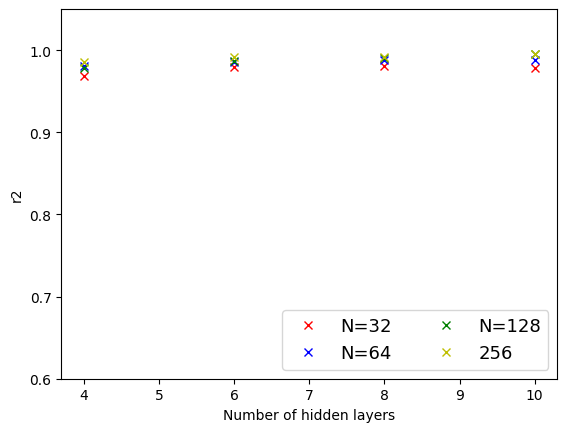

In [18]:
xaxis = [2*i for i in layers]

plt.plot(xaxis, cod_32, 'rx')
plt.plot(xaxis, cod_64, 'bx')
plt.plot(xaxis, cod_128, 'gx')
plt.plot(xaxis, cod_256, 'yx')
plt.ylim([0.6, 1.05])
plt.rcParams.update({'font.size':13})
plt.xlabel('Number of hidden layers')
plt.ylabel(r'r2')
plt.legend(['N=32', 'N=64', 'N=128', '256'], ncol=2, loc='lower right')
plt.savefig('CNN_GUp_hyperparam.png')